In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re
import seaborn as sns


## alle parts en items over de gehele tijd en alle linacs


In [30]:
linac2_headers = pd.read_csv("data/calblocks_update_table_cal_headers.csv", names=["date", "file_name", "empty", "thiing", "thing"])
linac2_items = pd.read_csv("data/calblocks_update_table_cal_items.csv",  names=["item", "category", "thing", "thiing"])
linac2_values = pd.read_csv("data/calblocks_update_table_cal_values.csv", names=["id", "calheaders_id", "item", "part", "value"])

linac2_headers.reset_index(inplace=True)
linac2_headers.set_index("level_0", inplace=True)
linac2_headers['datum'] = linac2_headers['date'].str.replace('/', '-', regex=False)

linac2_headers['date'] = pd.to_datetime(linac2_headers['date'], format='%d/%m/%Y')
linac2_headers["date"] = linac2_headers["date"].astype("str")

linac2_headers.columns = ["linac","date", "file_name", "empty", "thiing", "thing", "datum"]

In [31]:
tempdf = linac2_headers[["linac", "date", "file_name"]].merge(linac2_values[["calheaders_id", "item", "part", "value"]] ,left_on="level_0", right_on="calheaders_id", how="inner").drop(columns="calheaders_id")
merged_df = tempdf.merge(linac2_items[["item", "category"]], on = "item", how="inner")

merged_df["Part&item"] = "I:"+ merged_df["item"].astype(str) + " P:"+ merged_df["part"].astype(str)
merged_df = merged_df.sort_values(["linac", "date"])

fig = px.line(merged_df[merged_df["Part&item"] == "I:327 P:1"], x="date", y ="value", color="linac", hover_data="Part&item", symbol="file_name",markers=True)
fig

MLC files

In [32]:
tempdf = linac2_headers[["linac", "date", "file_name"]].merge(linac2_values[["calheaders_id", "item", "part", "value"]] ,left_on="level_0", right_on="calheaders_id", how="inner").drop(columns="calheaders_id")
merged_df = tempdf.merge(linac2_items[["item", "category"]], on = "item", how="inner")


merged_df = merged_df[merged_df["linac"] != 7460]

mlc_df = merged_df[merged_df["file_name"].str.contains("Mlc")]
mlc_df["Part&item"] = "I:"+ mlc_df["item"].astype(str) + " P:"+ mlc_df["part"].astype(str)

C:\Users\Laris\AppData\Local\Temp\ipykernel_9116\38404240.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Een overzicht van alle bestanden en welke part en items hier aanwezig zijn.

In [33]:
mlc_files = mlc_df["file_name"].unique().tolist()

show = pd.DataFrame(index=mlc_files)
show["parts"] = [mlc_df[mlc_df["file_name"] == file]["part"].unique().tolist() for file in mlc_files]
show["items"] = [mlc_df[mlc_df["file_name"] == file]["item"].unique().tolist() for file in mlc_files]
show["amount of dates"] = [len(mlc_df[mlc_df["file_name"] == file]["date"].unique().tolist()) for file in mlc_files]


In [34]:
total_changes = []
for file in show.index:
    mlc = merged_df[merged_df["file_name"] == file].copy()
    mlc["Part&item"] = "I:" + mlc["item"].astype(str) + " P:" + mlc["part"].astype(str)


    nop45 = mlc[mlc["part"] != 45]

    for linac in list(set(nop45["linac"])):
        result = pd.DataFrame()

        linec_df = nop45[nop45["linac"] == linac]
        dates = list(set(linec_df["date"]))

        for item in range(len(dates)-1):
            old = linec_df[linec_df["date"] == dates[item]]
            new = linec_df[linec_df["date"] == dates[item+1]]

            diff = new["value"].values - old["value"].values
            temp = pd.DataFrame({
                "date": new["date"].tolist(),
                "difference": diff,
                "PI": new["Part&item"],
                "linac": new["linac"]
            })

            result = pd.concat([temp, result])
            

    changed = result[result["difference"] != 0]

    changes = changed["PI"].unique().tolist()

    total_changes.append(changes)

    #only the changed combination of part and item
    changes_df = mlc[mlc["Part&item"].isin(changes)]


show["veranderingen"] = [len(change) for change in total_changes]
show


,parts,items,amount of dates,veranderingen
Mlc_Leaf_Sensor_Gain,[157.0],"[2380, 2460]",39,0
Mlc_Iso_Centre,"[139.0, 148.0, 136.0, 137.0, 404.0, 140.0, 141...","[2004, 2299, 2237, 2009, 2060, 2061, 2064, 206...",39,8
Mlc_gain_adj,"[150.0, 133.0]","[2380, 2460, 2300]",39,3
Mlc_Sensor_Gains,"[161.0, 160.0, 363.0, 364.0, 158.0, 159.0, 157...","[2237, 2060, 2061, 2299, 2064, 2065, 2009, 200...",39,12
Mlc_Leaf_Sensor_Orig,[154.0],"[2380, 2460]",39,2
Mlc_leaf_travel,"[185.0, 186.0]","[2380, 2460]",95,4
Mlc_Leaf_Sensor_Off,[158.0],"[2380, 2460]",39,0
Mlc_Leaf_Sensor_Dir,[159.0],"[2380, 2460]",39,0
Mlc_Minr_Off,[152.0],"[2380, 2460]",39,2
Mlc_cal_data,"[110.0, 120.0, 128.0, 171.0, 402.0, 403.0, 181...","[2300, 2009, 2230, 2237, 2299, 2014, 2015, 229...",39,2


## Mlc_cal_data

100: Required closed loop setpoint in AUTO mode, required open loop output in MAUNAL mode.  
110: The video line along which the Leaf video overlays are drawn.

C:\Users\Laris\AppData\Local\Temp\ipykernel_9116\4111700073.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2983
2325
2638
2191


item,2300,2540
part,110.0,100.0
category,Leaf Pair 1,UV LED control
count,13.00,13.00
mean,29.00,53.46
std,0.00,2.73
min,29.00,49.00
25%,29.00,51.00
50%,29.00,53.00
75%,29.00,55.00
max,29.00,58.00


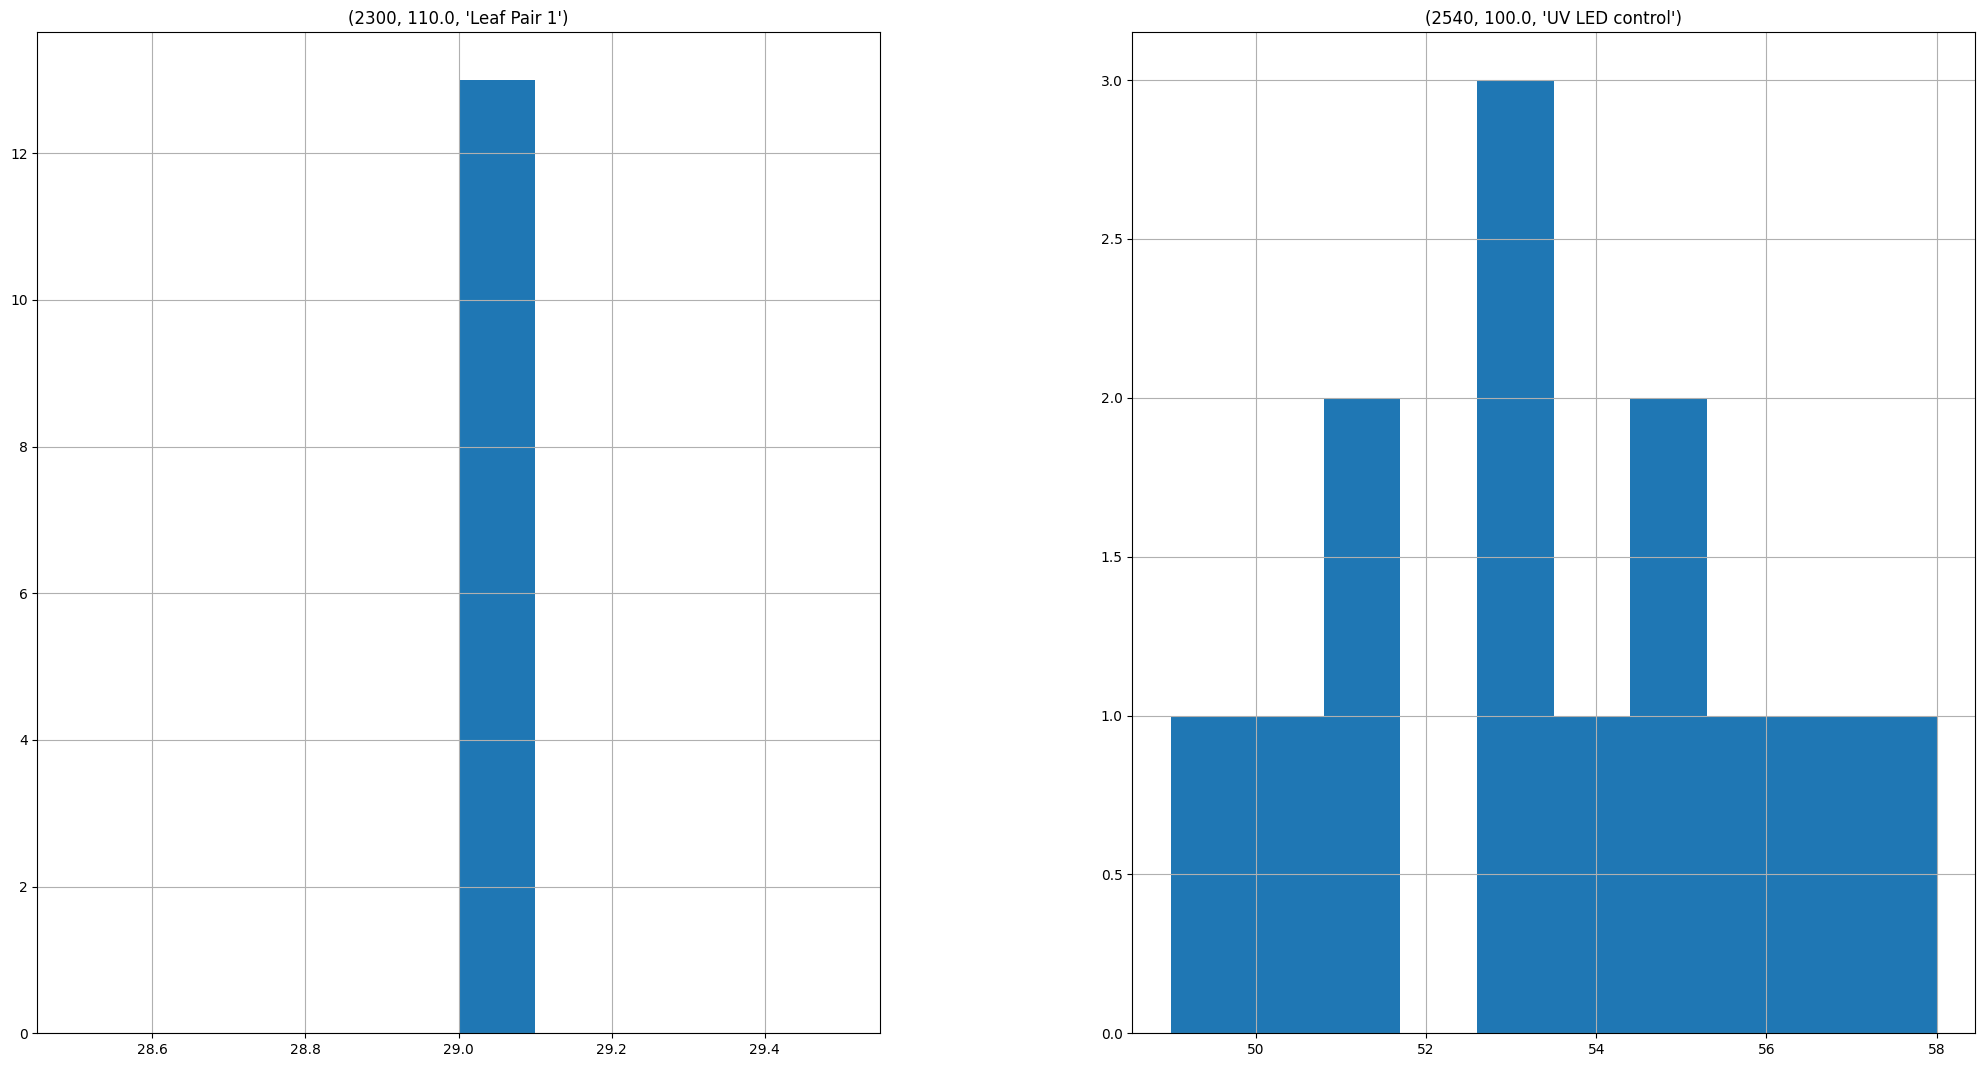

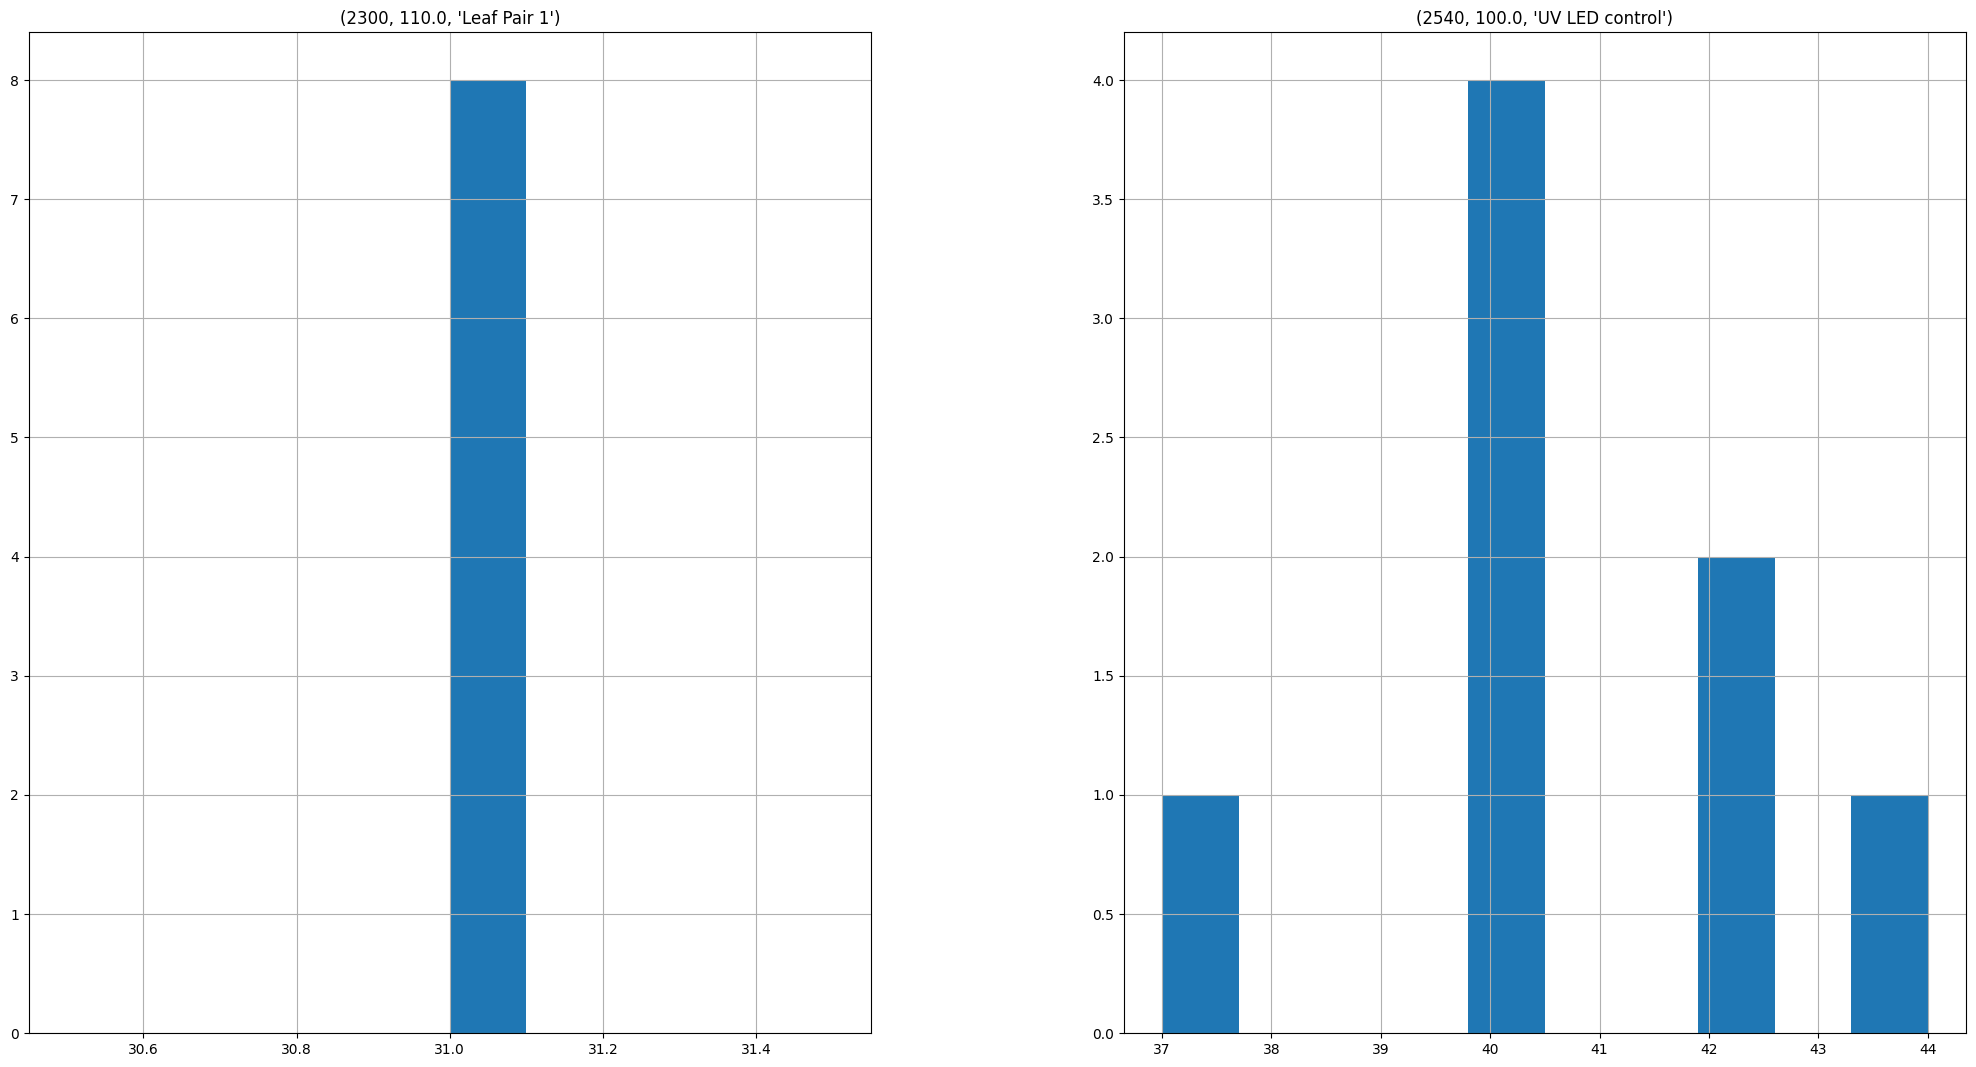

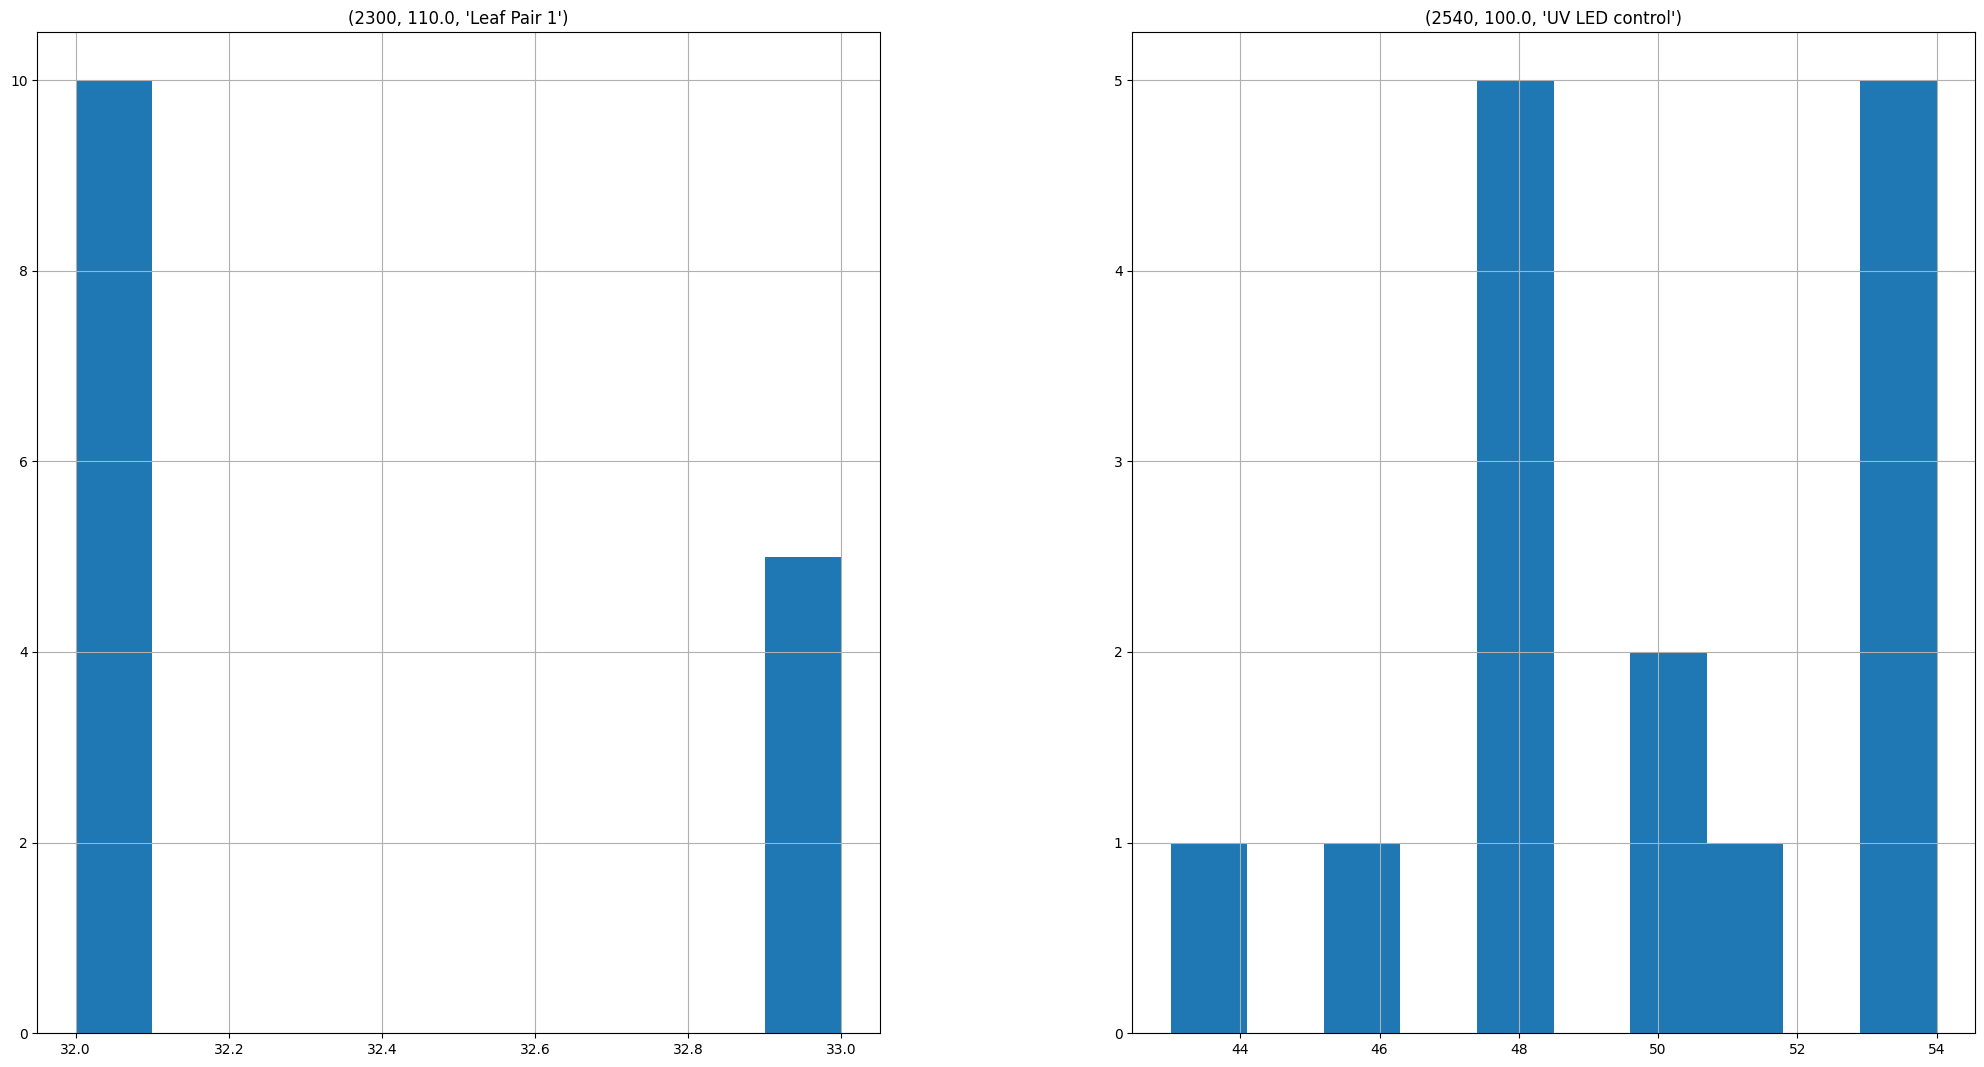

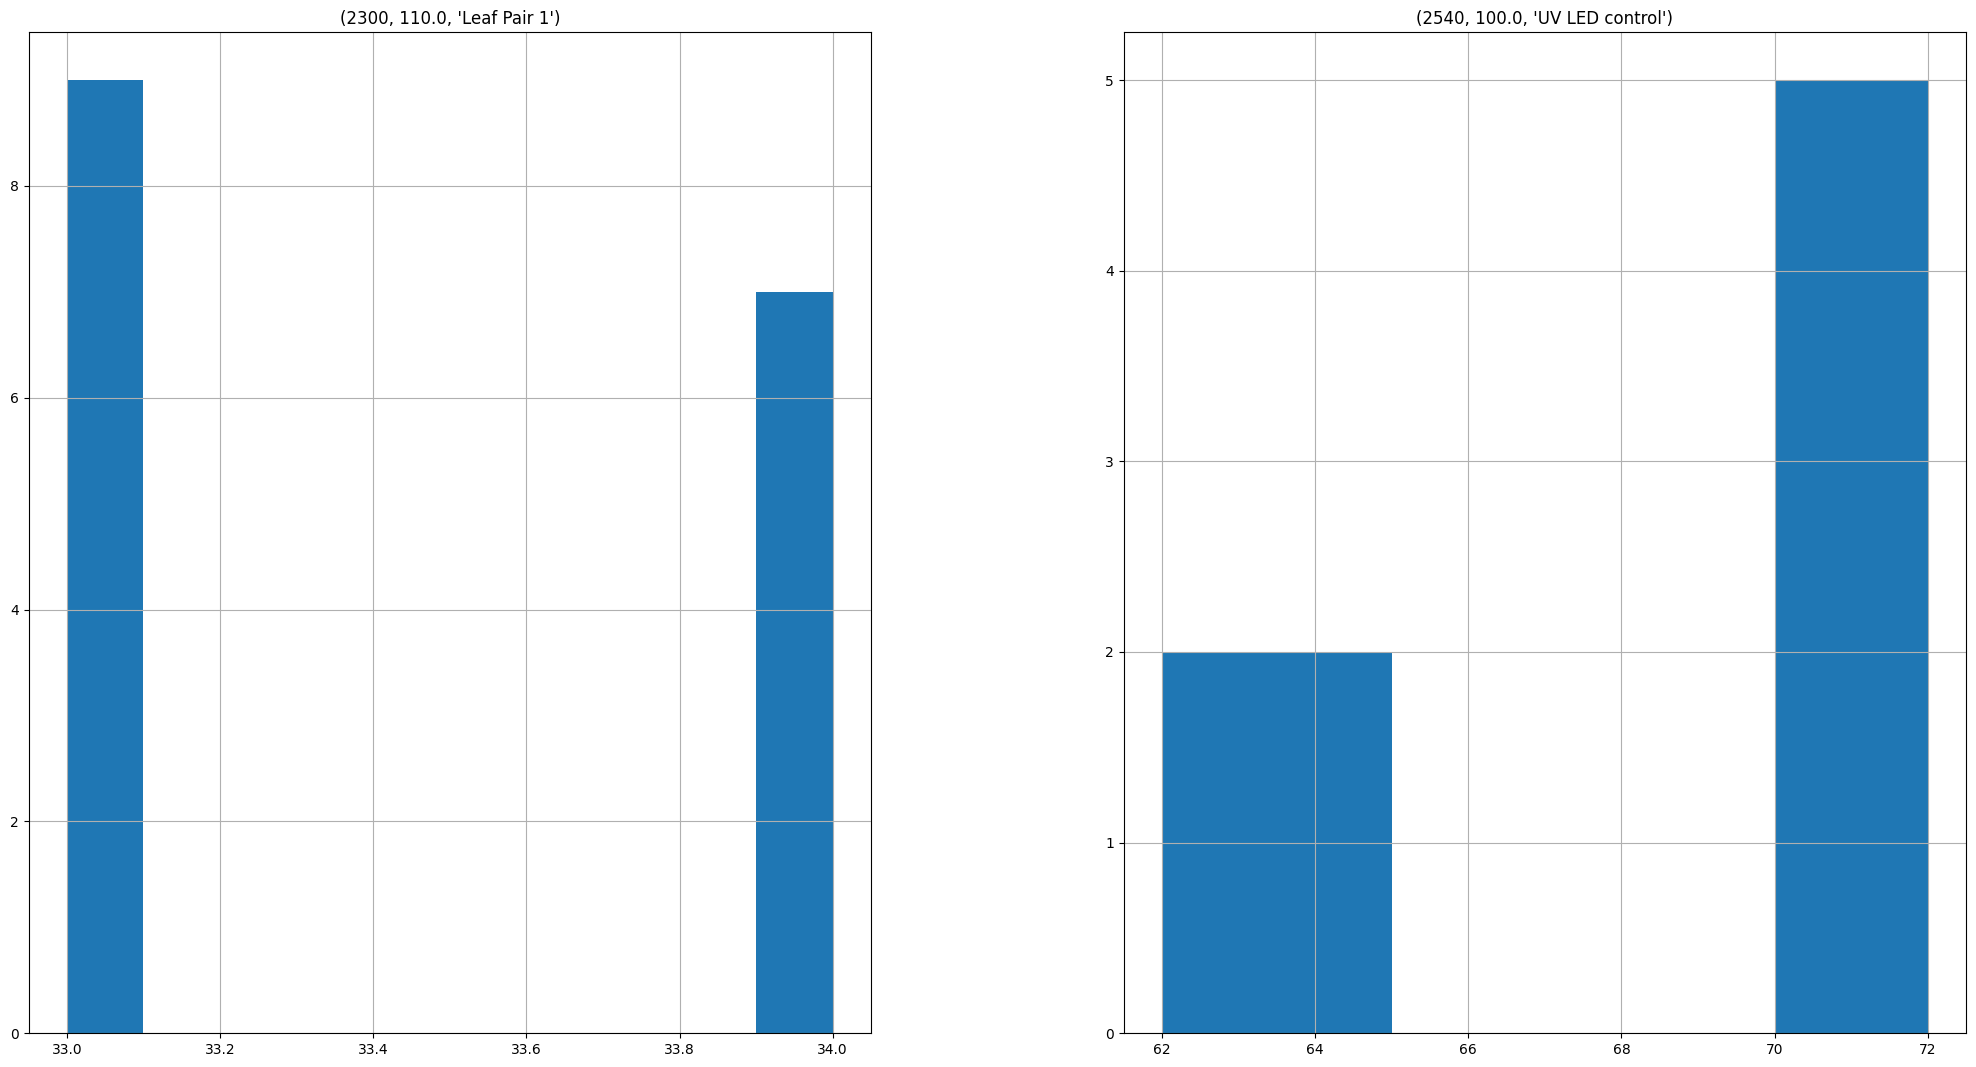

In [35]:
mlc_cal_data = merged_df[merged_df["file_name"] == "Mlc_cal_data"]
mlc_cal_data["Part&item"] = "I:"+ mlc_cal_data["item"].astype(str) + " P:"+ mlc_cal_data["part"].astype(str)

nop45 = mlc_cal_data[mlc_cal_data["part"] != 45]

for linac in list(set(nop45["linac"])):
    result = pd.DataFrame()

    linec_df = nop45[nop45["linac"] == linac]
    dates = list(set(linec_df["date"]))

    for item in range(len(dates)-1):
        old = linec_df[linec_df["date"] == dates[item]]
        new = linec_df[linec_df["date"] == dates[item+1]]

        diff = new["value"].values - old["value"].values
        temp = pd.DataFrame({
            "date": new["date"].tolist(),
            "difference": diff,
            "PI": new["Part&item"],
            "linac": new["linac"]
        })

        result = pd.concat([temp, result])
        

changed = result[result["difference"] != 0]

changes = changed["PI"].unique().tolist()


#only the changed combination of part and item
changes_df_mlc_cal = mlc_cal_data[mlc_cal_data["Part&item"].isin(changes)]

show = pd.DataFrame()


# for every linac the describe of the same data
for linac in list(set(changes_df_mlc_cal["linac"])):
    print(linac)
    pivoted_cal = changes_df_mlc_cal[changes_df_mlc_cal["linac"] == linac].pivot(index="date", columns=["item", "part", "category"], values="value")
    describing = pivoted_cal.describe()
    show = pd.concat([show, describing])
    pivoted_cal.hist(figsize=(25,13));

show.round(2)
   

In [36]:
for x in range(len(show.columns)):  
    p_I = show.columns[x][:2]


    fig = px.line(mlc_cal_data[mlc_cal_data["Part&item"] == f"I:{p_I[0]} P:{p_I[1]}"], x="date", y ="value", color="linac", hover_data=["Part&item", "category"],markers=True)
    fig.show()

## Mlc_gain_adj

150: Workflow set gain to adjust the radiation mapping.  
133: Gain to convert pixels to microns.

C:\Users\Laris\AppData\Local\Temp\ipykernel_9116\892570853.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2983
2325
2638
2191


item,2380,2460,2300
part,150.0,150.0,133.0
category,Leaf Y2 1,Leaf Y1 1,Leaf Pair 1
count,13.00,13.00,13.00
mean,8388715.38,6449636.54,239206.85
std,615189.96,700054.48,121.59
min,7589001.00,5549305.00,239046.00
25%,7864453.00,5875364.00,239120.00
50%,8395801.00,6356592.00,239229.00
75%,8708416.00,6810081.00,239261.00
max,9857686.00,7578995.00,239474.00


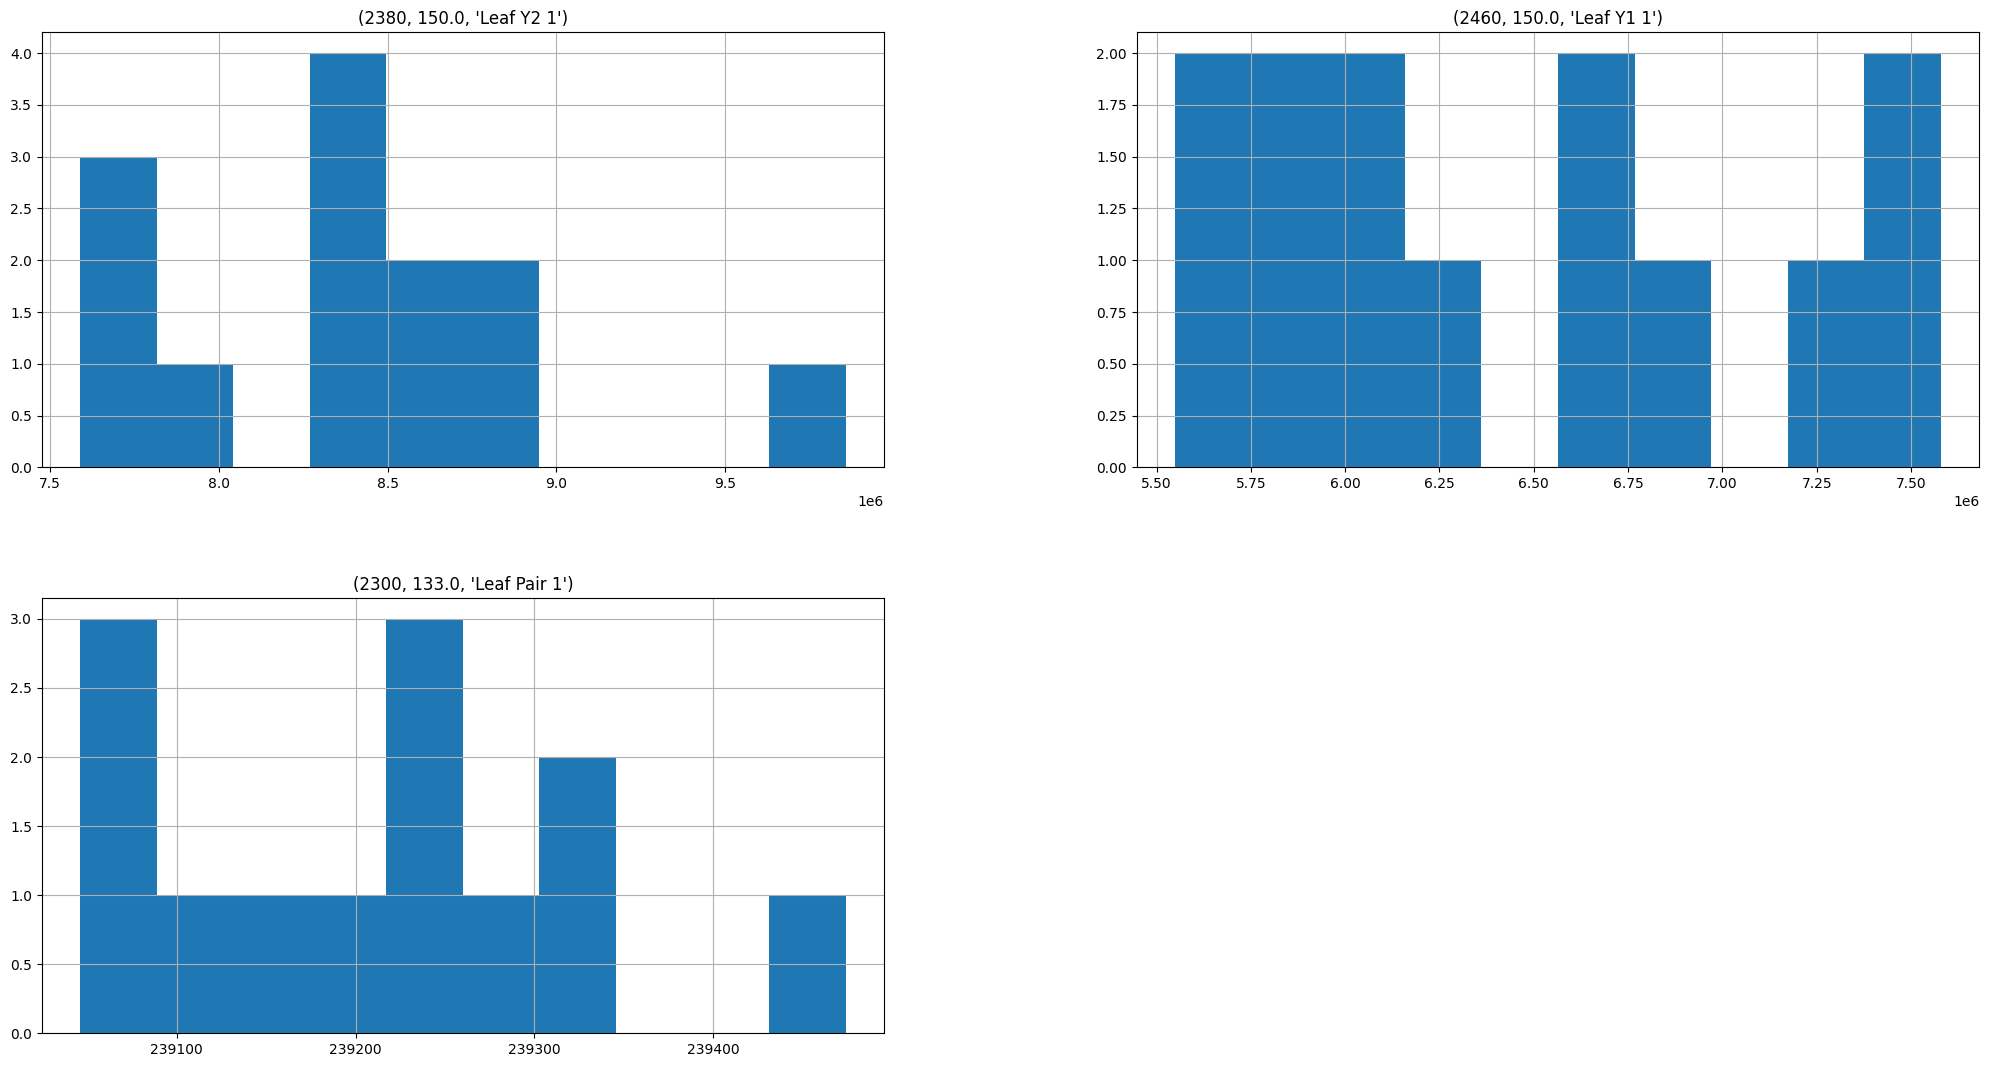

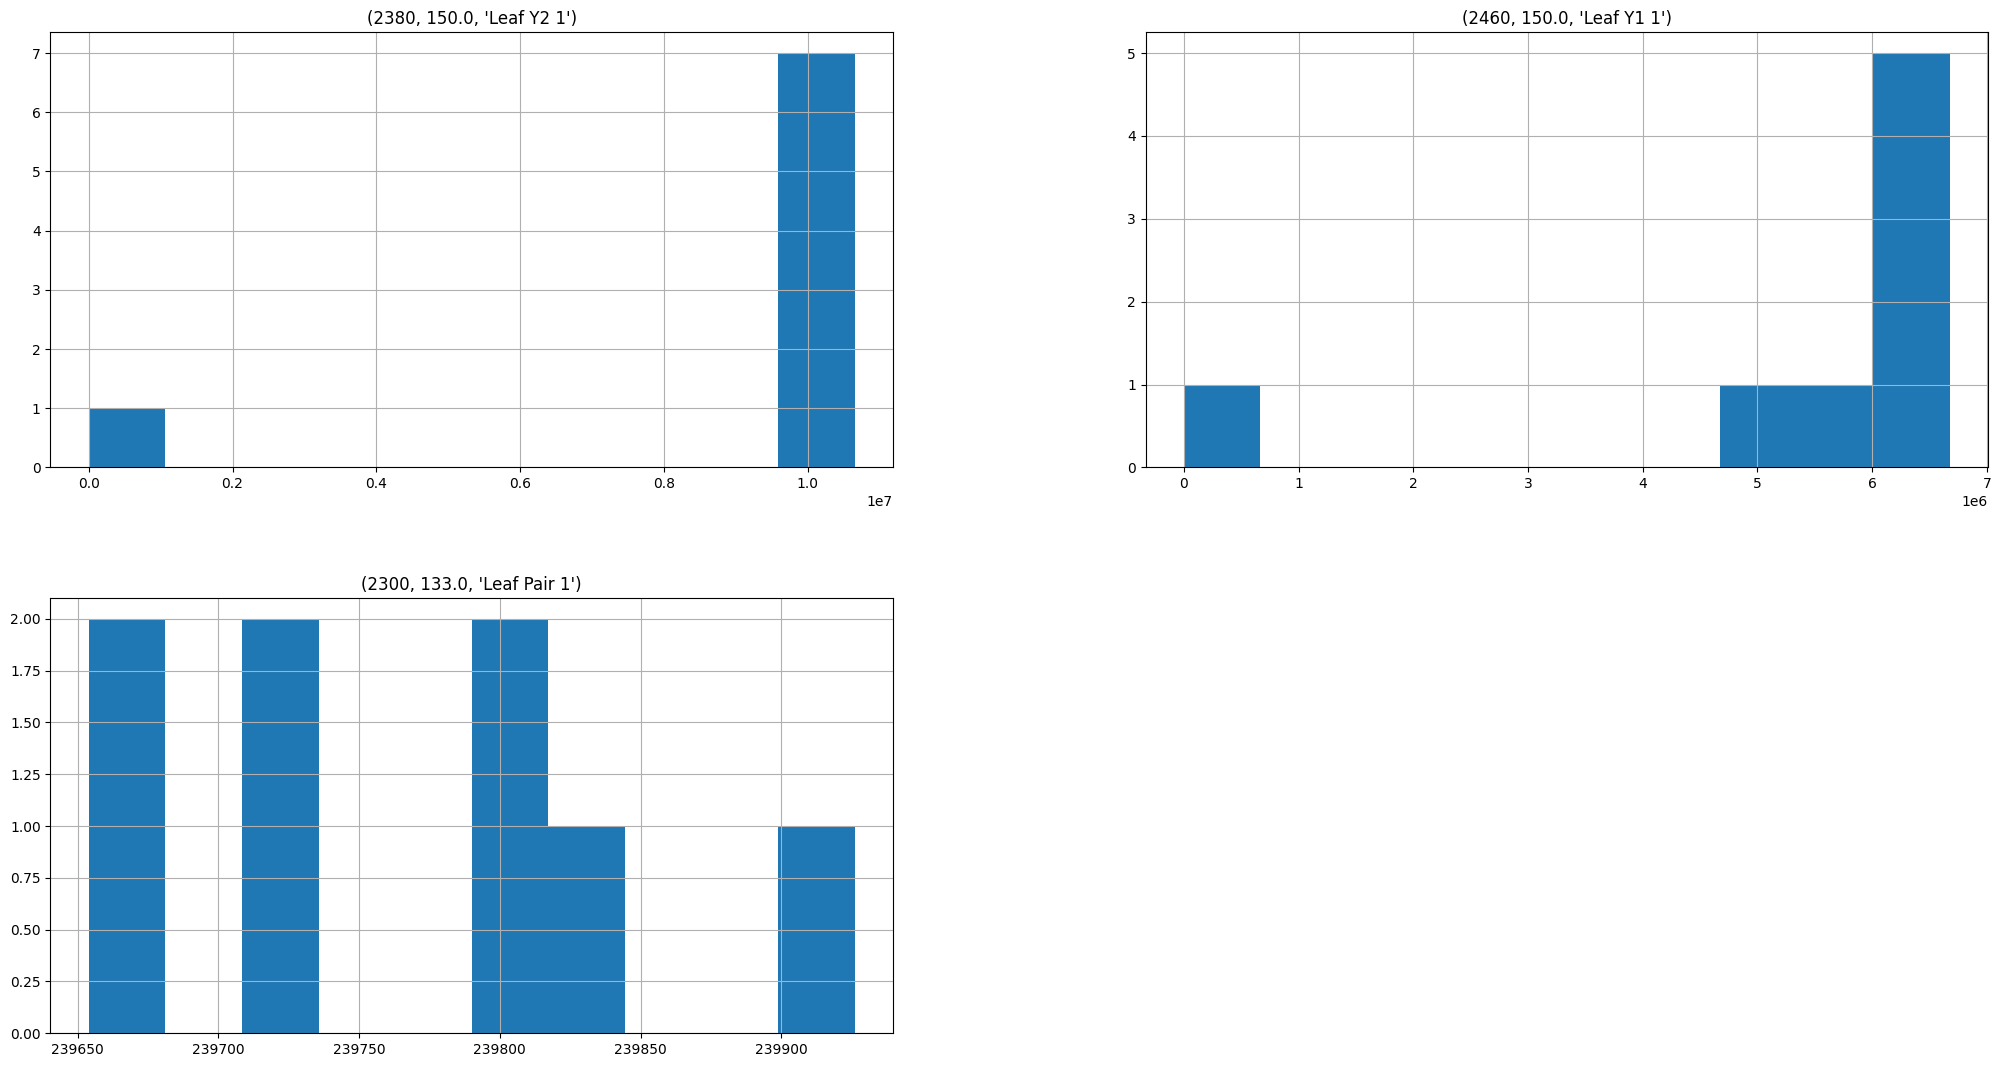

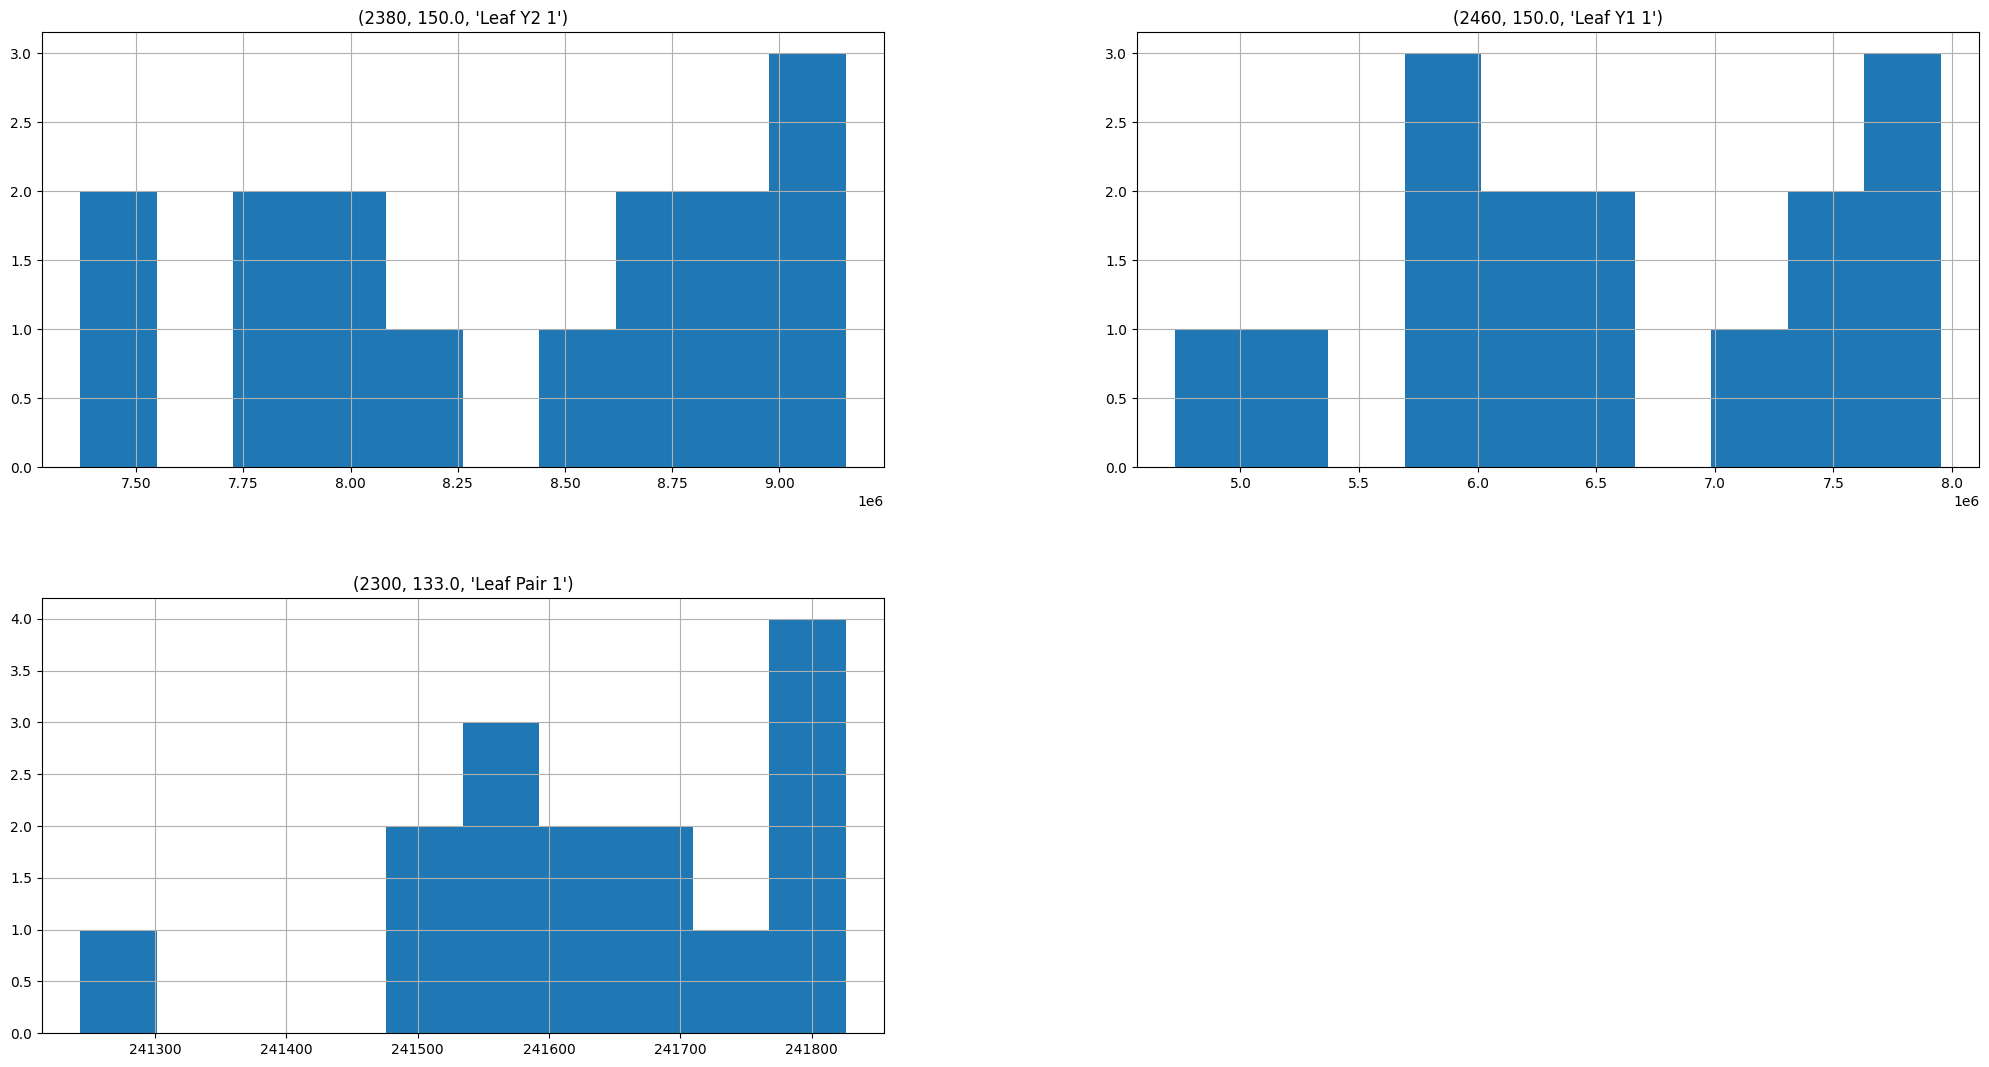

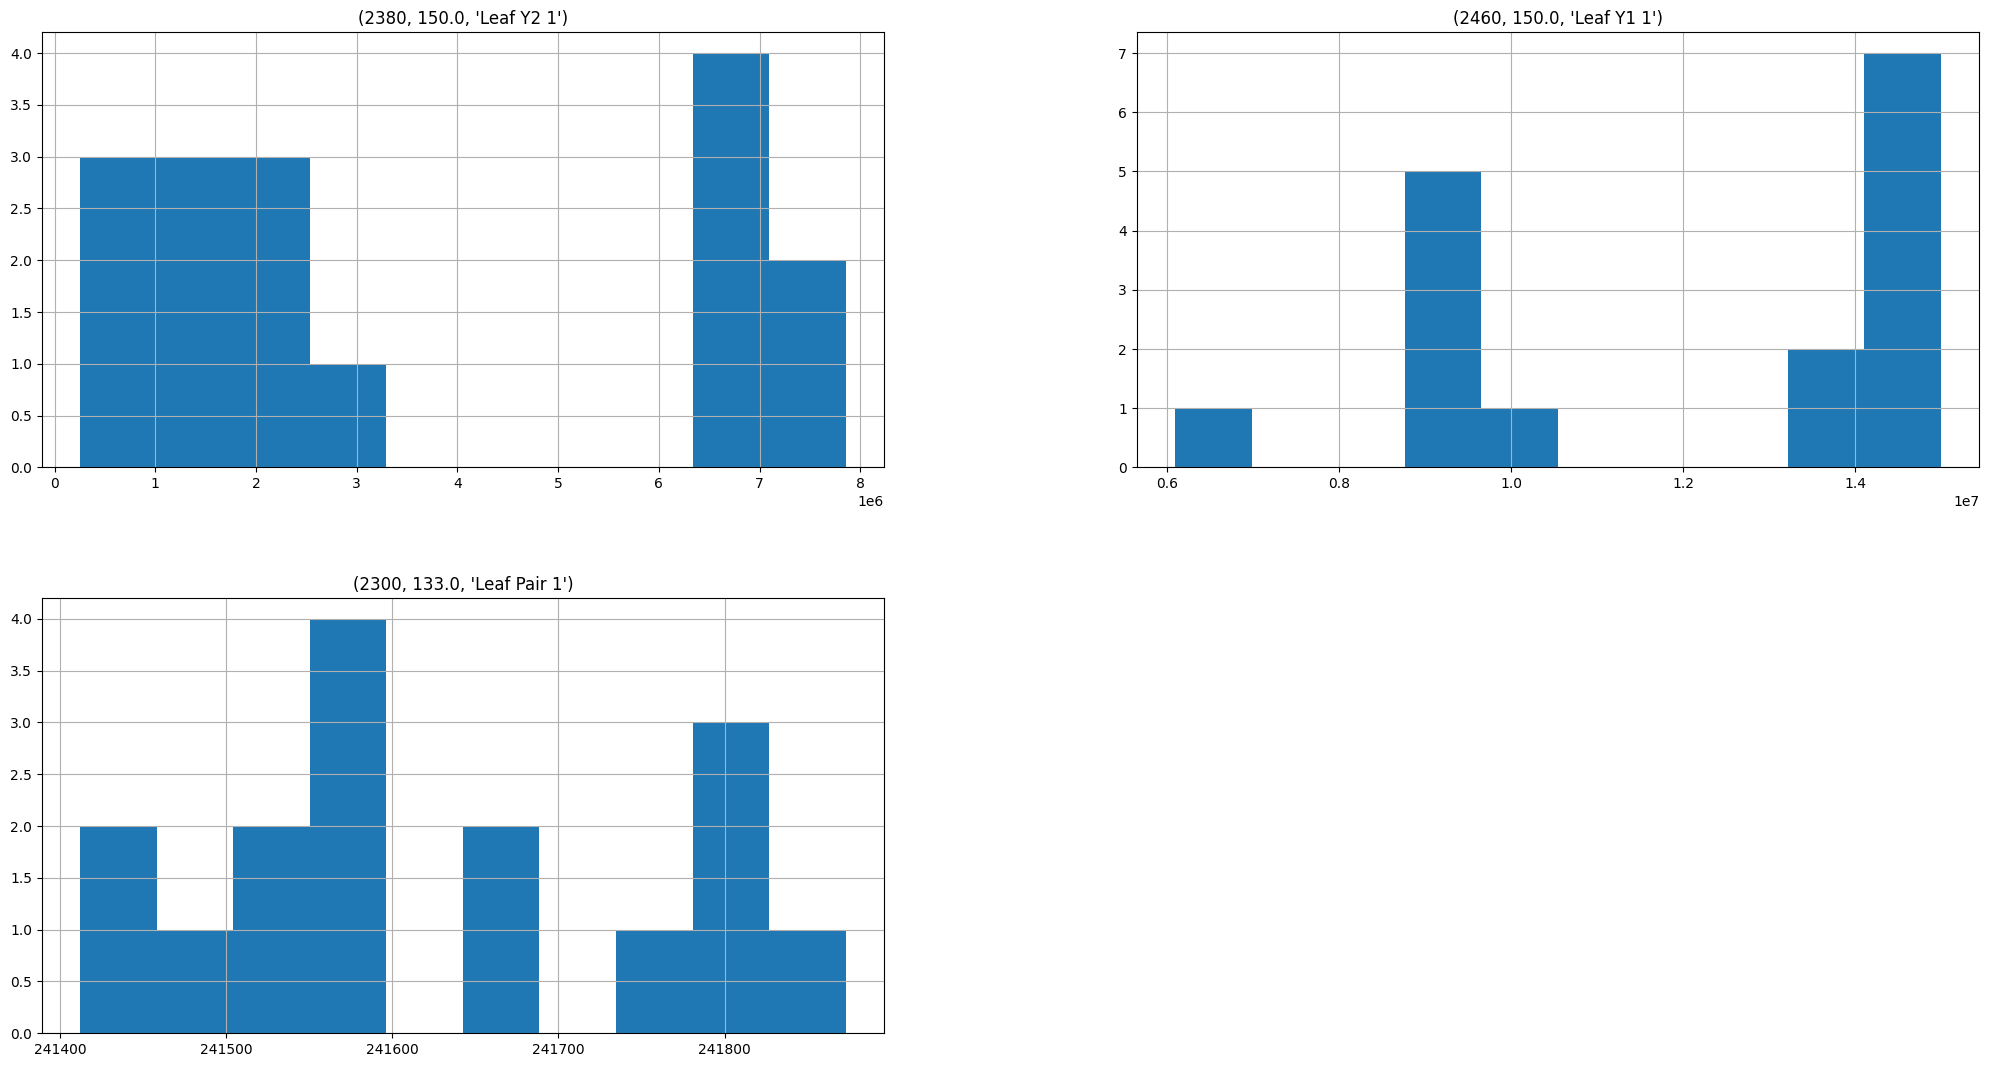

In [37]:
mlc_cal_data = merged_df[merged_df["file_name"] == "Mlc_gain_adj"]
mlc_cal_data["Part&item"] = "I:"+ mlc_cal_data["item"].astype(str) + " P:"+ mlc_cal_data["part"].astype(str)

nop45 = mlc_cal_data[mlc_cal_data["part"] != 45]

for linac in list(set(nop45["linac"])):
    result = pd.DataFrame()

    linec_df = nop45[nop45["linac"] == linac]
    dates = list(set(linec_df["date"]))

    for item in range(len(dates)-1):
        old = linec_df[linec_df["date"] == dates[item]]
        new = linec_df[linec_df["date"] == dates[item+1]]

        diff = new["value"].values - old["value"].values
        temp = pd.DataFrame({
            "date": new["date"].tolist(),
            "difference": diff,
            "PI": new["Part&item"],
            "linac": new["linac"]
        })

        result = pd.concat([temp, result])
        

changed = result[result["difference"] != 0]

changes = changed["PI"].unique().tolist()


#only the changed combination of part and item
changes_df_mlc_gain = mlc_cal_data[mlc_cal_data["Part&item"].isin(changes)]

show = pd.DataFrame()


# for every linac the describe of the same data
for linac in list(set(changes_df_mlc_gain["linac"])):
    print(linac)
    pivoted_cal = changes_df_mlc_gain[changes_df_mlc_gain["linac"] == linac].pivot(index="date", columns=["item", "part", "category"], values="value")
    describing = pivoted_cal.describe()
    show = pd.concat([show, describing])
    pivoted_cal.hist(figsize=(25,13));

show.round(2)
   

In [38]:
for x in range(len(show.columns)):  
    p_I = show.columns[x][:2]


    fig = px.line(mlc_cal_data[mlc_cal_data["Part&item"] == f"I:{p_I[0]} P:{p_I[1]}"], x="date", y ="value", color="linac", hover_data=["Part&item", "category"],markers=True)
    fig.show()

## Mlc_Iso_Centre

150: Workflow set gain to adjust the radiation mapping.  
152: Workflow set offset to adjust the radiation mapping.

C:\Users\Laris\AppData\Local\Temp\ipykernel_9116\365244148.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2983
2325
2638
2191


item             2060                      2061                      2064  \
part            150.0        152.0        150.0        152.0        150.0   
category X1 Diaphragm X1 Diaphragm X2 Diaphragm X2 Diaphragm       DLG Y2   
count           13.00        13.00        13.00        13.00        13.00   
mean      -2386065.46     -1074.77    131927.69      1179.77   8861012.31   
std         539465.51        58.68    847118.57        62.85    522711.04   
min       -3220578.00     -1169.00   -885338.00      1082.00   8211643.00   
25%       -2730058.00     -1129.00   -457194.00      1131.00   8403801.00   
50%       -2432740.00     -1058.00     -4500.00      1175.00   8929362.00   
75%       -2136807.00     -1024.00    417246.00      1233.00   9147735.00   
max       -1298890.00     -1008.00   2218966.00      1298.00   9857686.00   
count            8.00         8.00         8.00         8.00         8.00   
mean       -552434.25      1505.00  -1201616.12     -1660.00   8930068.50   
std        1593323.65       611.43   1565213.37       675.07   3620963.88   
min       -3500328.00         0.00  -3674455.00     -2072.00         0.00   
25%        -867729.50      1673.50  -1746026.00     -1894.50   9933761.25   
50%         122649.00      1694.00   -625994.50     -1858.00  10040854.00   
75%         478019.75      1723.50      6318.25     -1844.00  10426897.50   
max         690935.00      1864.00     34838.00         0.00  10653191.00   
count           15.00        15.00        15.00        15.00        15.00   
mean        592759.73     -1441.33  -1335671.67      1417.40   9094870.07   
std        1299203.66       118.66   1073323.10       137.44   1056062.56   
min       -2530904.00     -1675.00  -3054925.00      1197.00   7948767.00   
25%        -213917.00     -1552.00  -2108038.00      1313.00   8164800.00   
50%         714168.00     -1407.00  -1464493.00      1425.00   8902353.00   
75%        1479600.00     -1363.00   -579218.50      1530.00   9468583.00   
max        2514655.00     -1270.00    851899.00      1649.00  11864151.00   
count           16.00        16.00        16.00        16.00        16.00   
mean       -874686.88      -348.81  -1241314.69        78.06   6619057.06   
std        1218986.16        56.83    592811.76        53.09    626290.91   
min       -3090788.00      -433.00  -2475858.00         1.00   5133375.00   
25%       -1862089.75      -398.25  -1617687.50        36.75   6388086.50   
50%        -593326.00      -343.50  -1252006.50        80.50   6599132.00   
75%        -101184.75      -317.00   -950587.50       102.25   6938986.00   
max        1217654.00      -234.00   -183594.00       178.00   7856137.00   

item                     2065           
part       152.0        150.0    152.0  
category  DLG Y2       DLG Y1   DLG Y1  
count      13.00        13.00    13.00  
mean     -922.00   7183089.92   296.38  
std        58.29    675743.70    99.89  
min      -974.00   6146736.00   175.00  
25%      -962.00   6852388.00   227.00  
50%      -944.00   7214420.00   279.00  
75%      -917.00   7563958.00   332.00  
max      -771.00   8813418.00   517.00  
count       8.00         8.00     8.00  
mean     -577.25   8054580.88   881.38  
std       246.75   3266246.57   362.17  
min      -791.00         0.00     0.00  
25%      -703.00   8853618.75   939.25  
50%      -623.00   9121973.50   968.00  
75%      -582.75   9423333.75  1059.75  
max         0.00   9595532.00  1099.00  
count      15.00        15.00    15.00  
mean       44.67   9628180.80   349.60  
std        55.36    974870.14    72.42  
min       -43.00   8590883.00   264.00  
25%        11.00   9144924.50   278.50  
50%        27.00   9424756.00   348.00  
75%        66.50   9805461.00   411.00  
max       159.00  12658810.00   484.00  
count      16.00        16.00    16.00  
mean     -492.62  12629588.88  1161.50  
std       130.39   2239300.32   200.21  
min      -680.00   9713994.00   893.00  
25%      -605.25  10364401.00   9

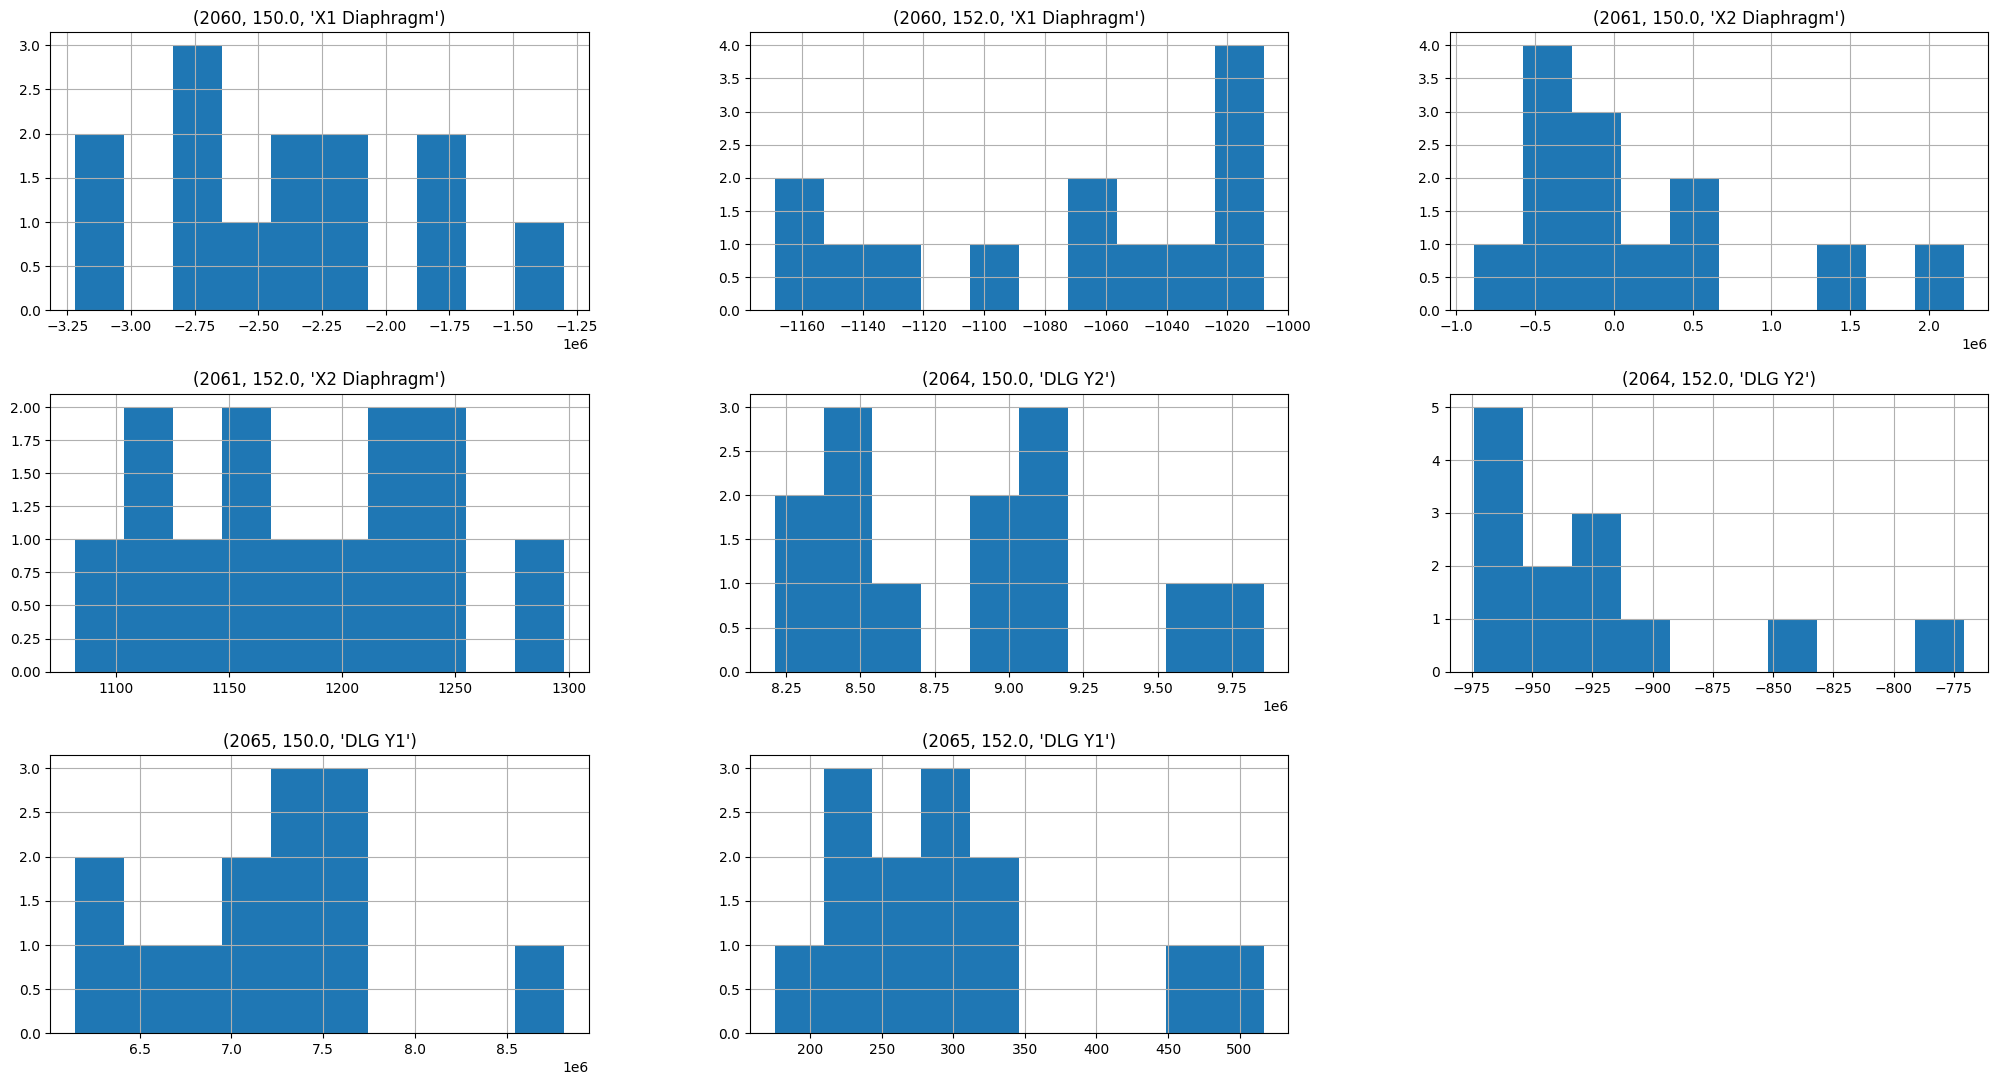

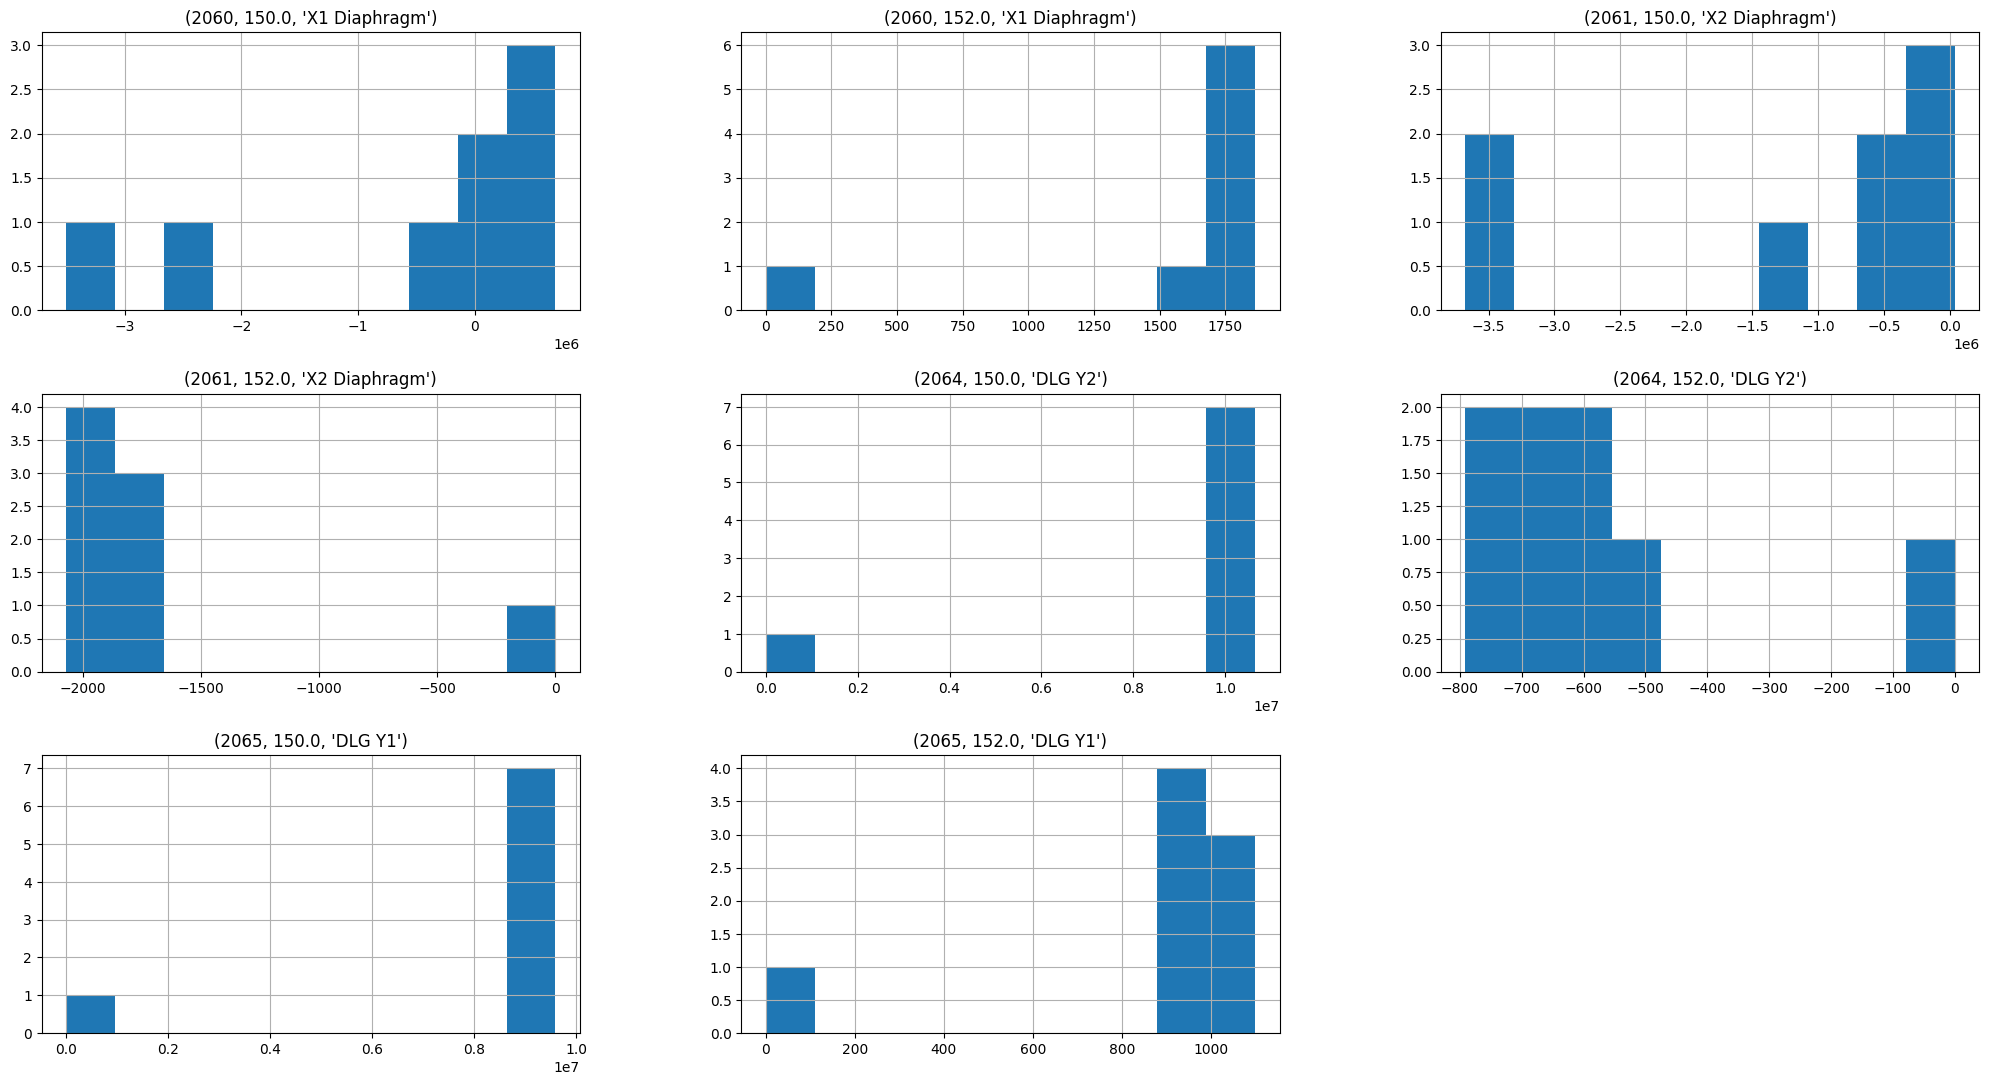

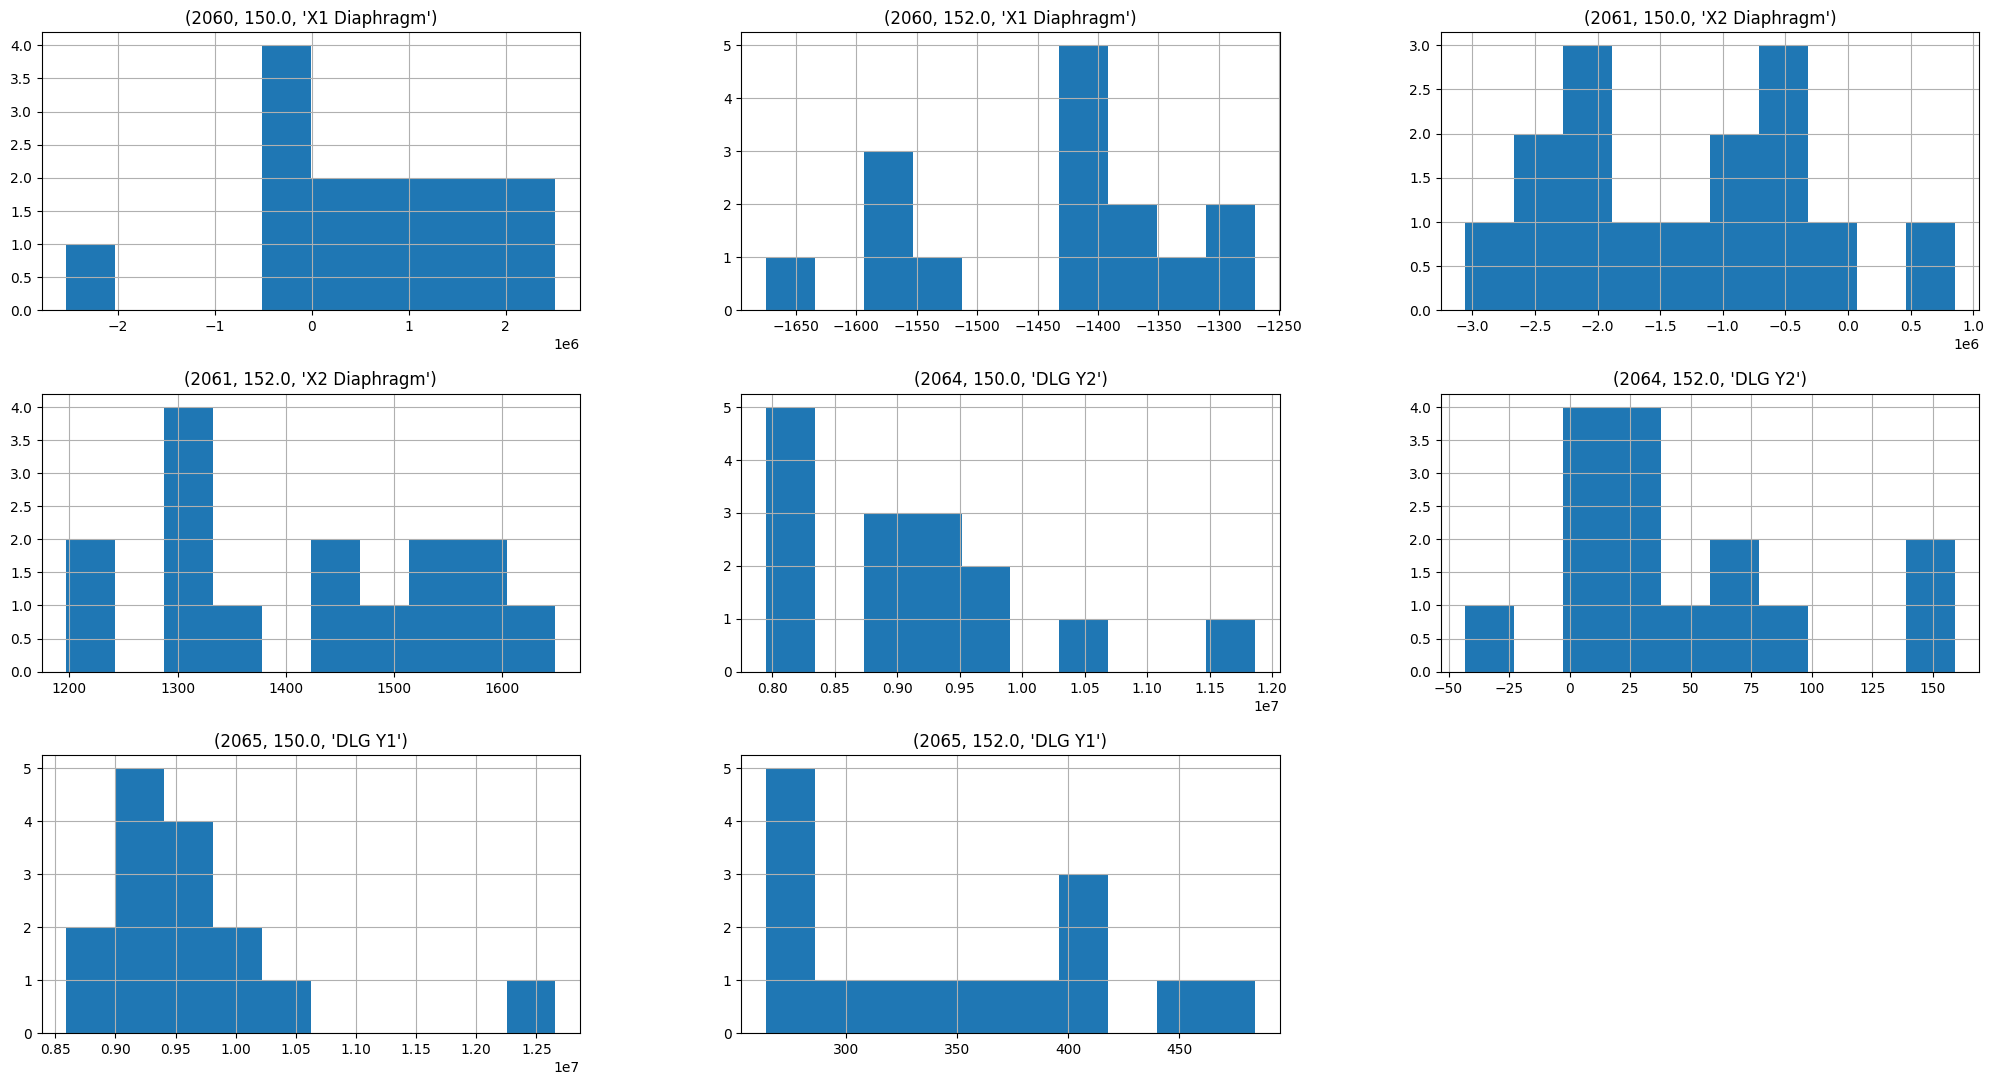

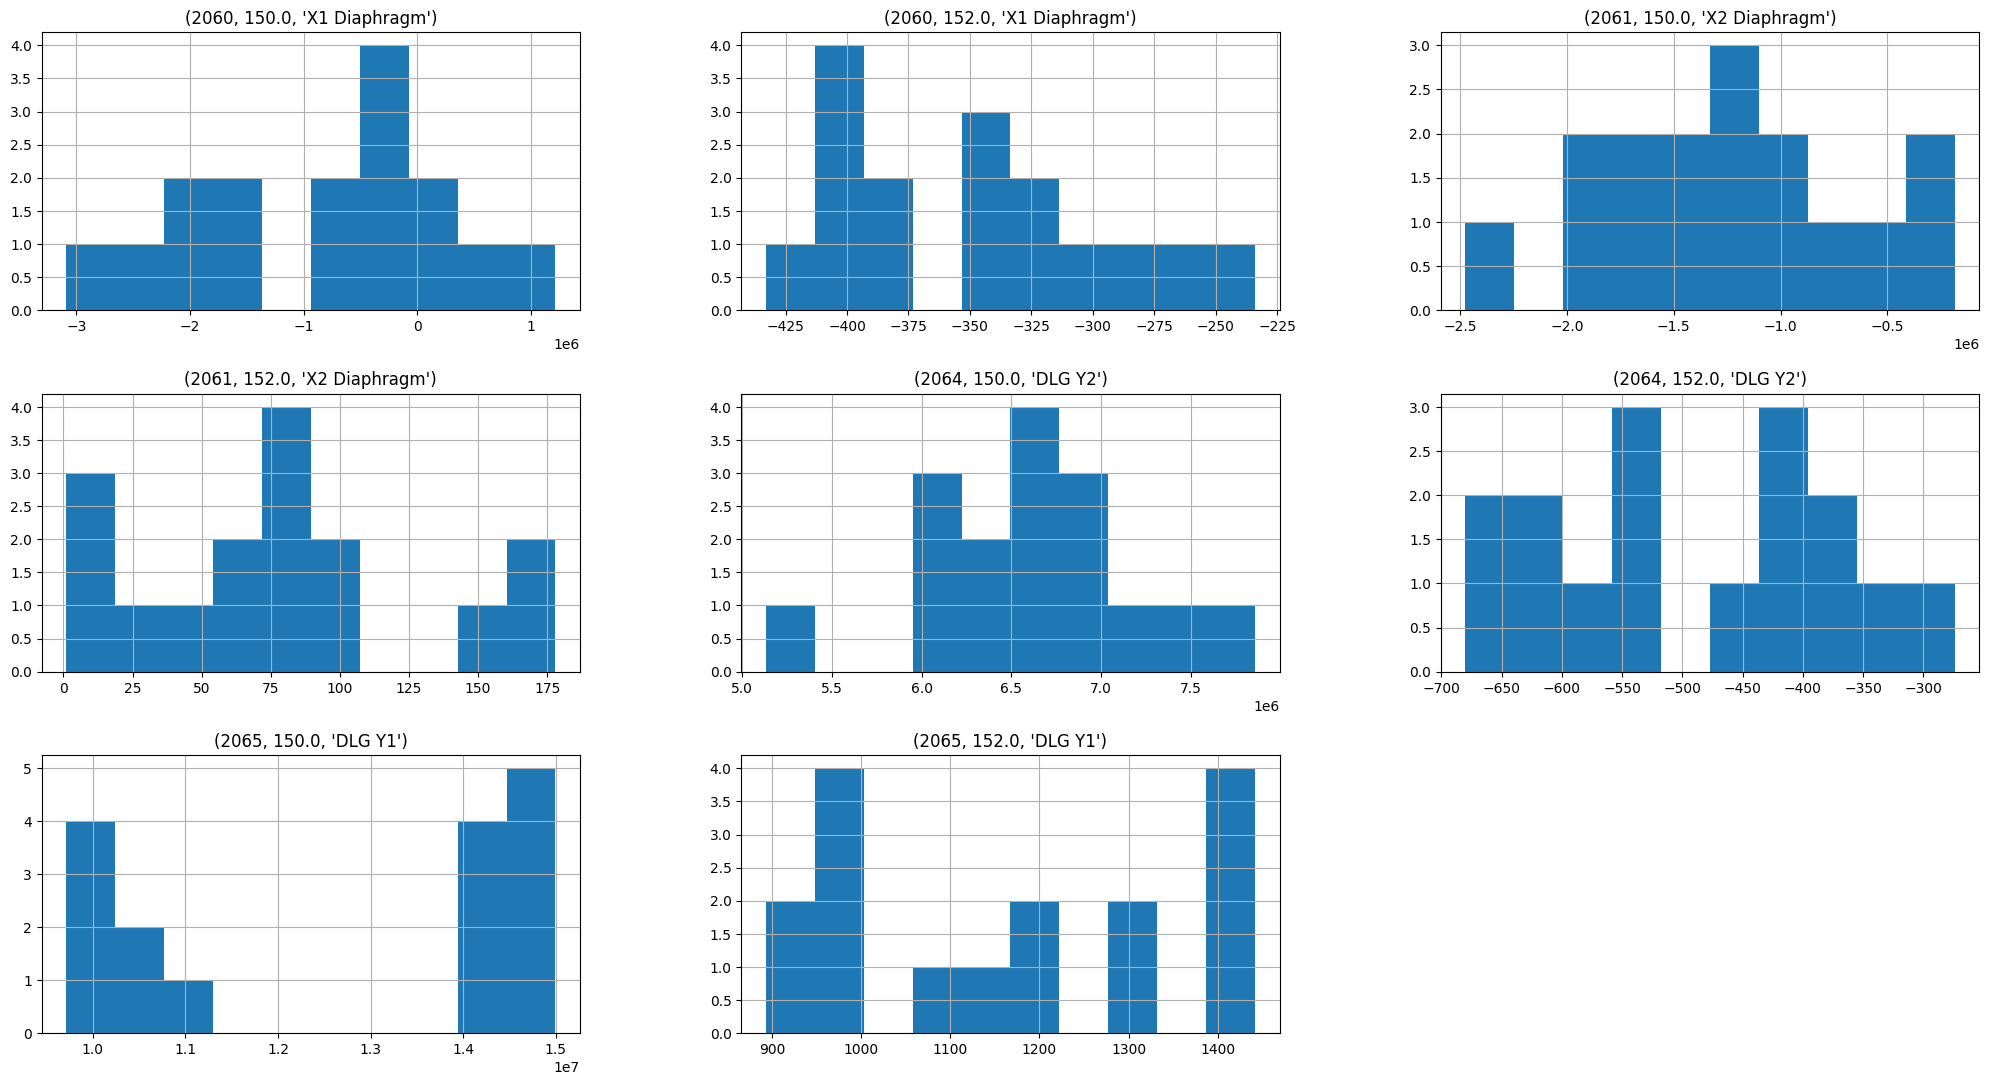

In [39]:
mlc_cal_data = merged_df[merged_df["file_name"] == "Mlc_Iso_Centre"]
mlc_cal_data["Part&item"] = "I:"+ mlc_cal_data["item"].astype(str) + " P:"+ mlc_cal_data["part"].astype(str)

nop45 = mlc_cal_data[mlc_cal_data["part"] != 45]

for linac in list(set(nop45["linac"])):
    result = pd.DataFrame()

    linec_df = nop45[nop45["linac"] == linac]
    dates = list(set(linec_df["date"]))

    for item in range(len(dates)-1):
        old = linec_df[linec_df["date"] == dates[item]]
        new = linec_df[linec_df["date"] == dates[item+1]]

        diff = new["value"].values - old["value"].values
        temp = pd.DataFrame({
            "date": new["date"].tolist(),
            "difference": diff,
            "PI": new["Part&item"],
            "linac": new["linac"]
        })

        result = pd.concat([temp, result])
        

changed = result[result["difference"] != 0]

changes = changed["PI"].unique().tolist()


#only the changed combination of part and item
changes_df_mlc_iso = mlc_cal_data[mlc_cal_data["Part&item"].isin(changes)]

show = pd.DataFrame()


# for every linac the describe of the same data
for linac in list(set(changes_df_mlc_iso["linac"])):
    print(linac)
    pivoted_cal = changes_df_mlc_iso[changes_df_mlc_iso["linac"] == linac].pivot(index="date", columns=["item", "part", "category"], values="value")
    describing = pivoted_cal.describe()
    show = pd.concat([show, describing])
    pivoted_cal.hist(figsize=(25,13));

show.round(2)
   

In [40]:
for x in range(len(show.columns)):  
    p_I = show.columns[x][:2]


    fig = px.line(mlc_cal_data[mlc_cal_data["Part&item"] == f"I:{p_I[0]} P:{p_I[1]}"], x="date", y ="value", color="linac", hover_data=["Part&item", "category"],markers=True)
    fig.show()

## Mlc_Leaf_Sensor_Orig

154: Offset between the centre of the marker object and the leaf tip.

C:\Users\Laris\AppData\Local\Temp\ipykernel_9116\626968925.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2983
2325
2638
2191


item,2380,2460
part,154.0,154.0
category,Leaf Y2 1,Leaf Y1 1
count,13.00,13.00
mean,6679.15,6206.77
std,20.35,21.26
min,6652.00,6148.00
25%,6660.00,6205.00
50%,6677.00,6206.00
75%,6698.00,6214.00
max,6705.00,6235.00


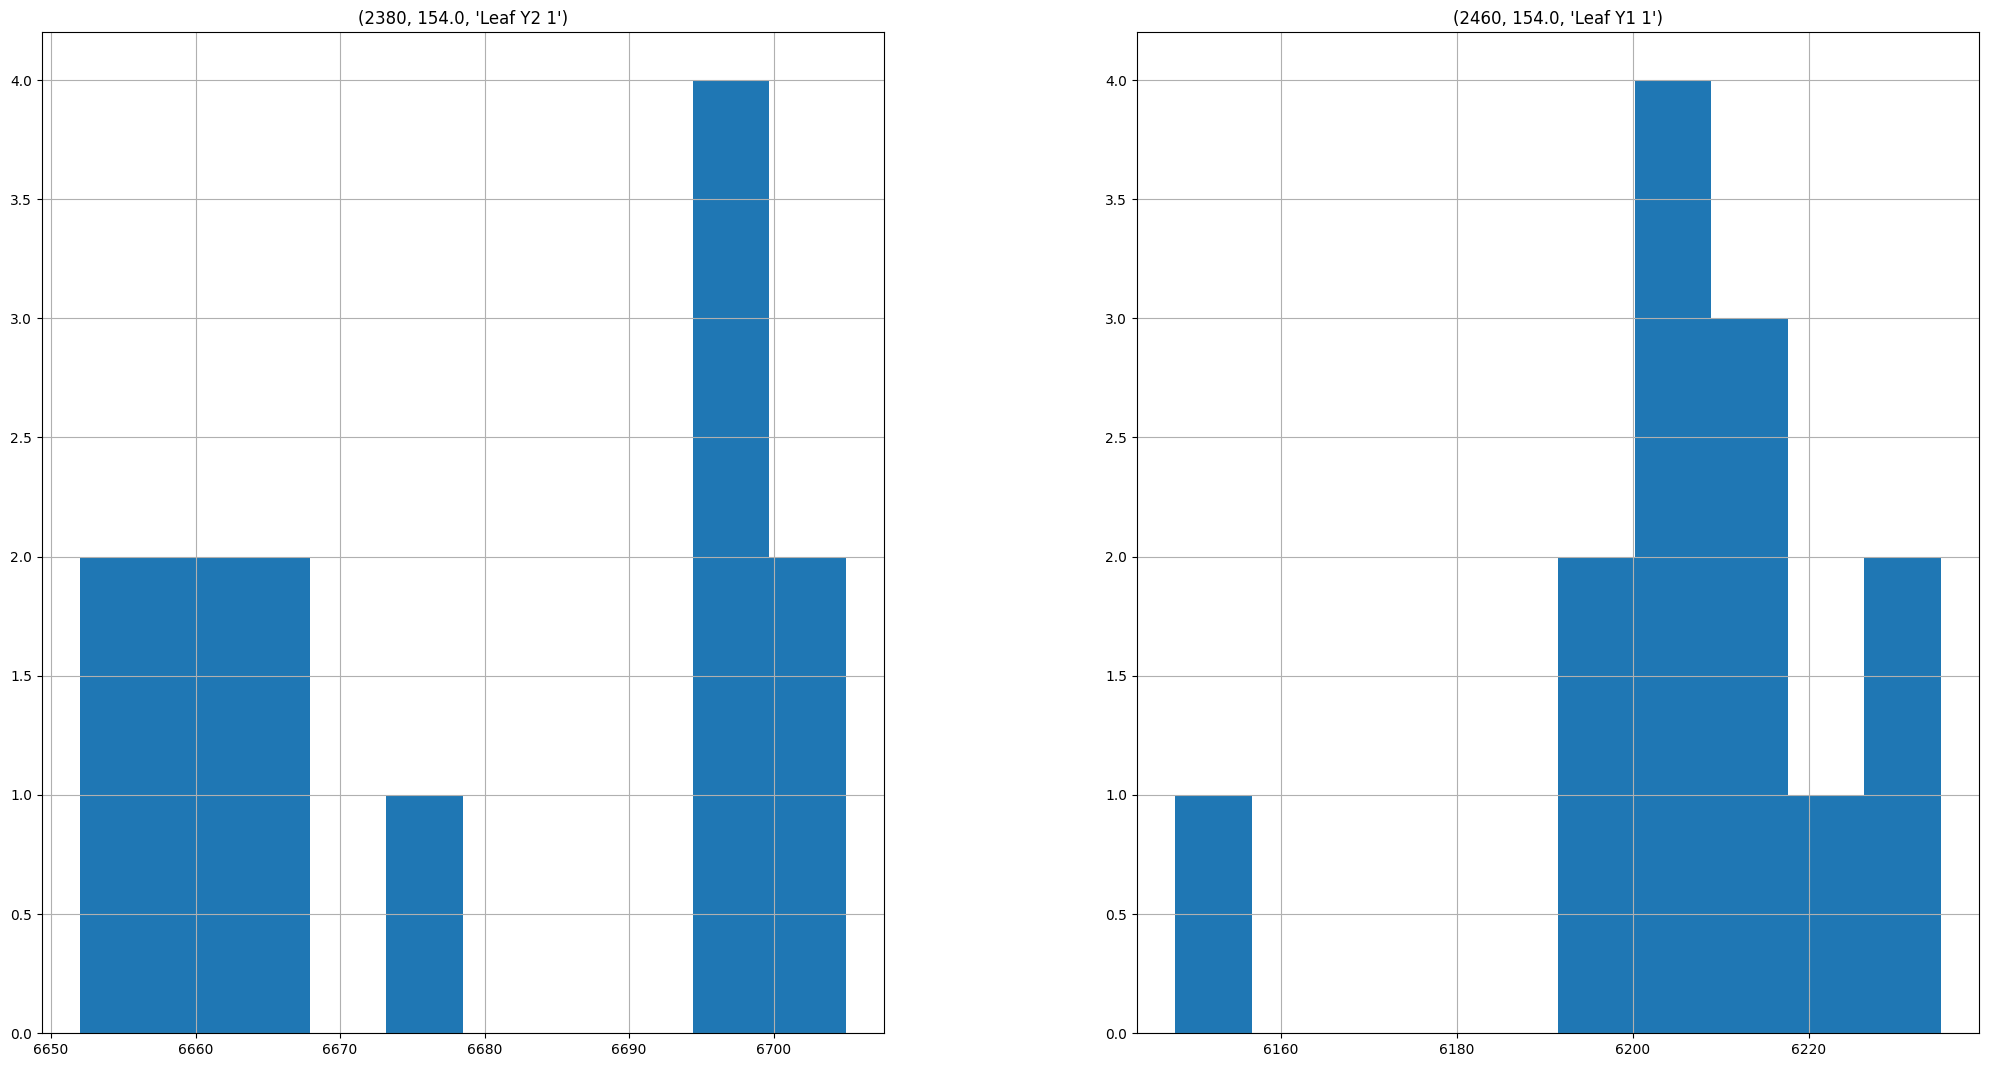

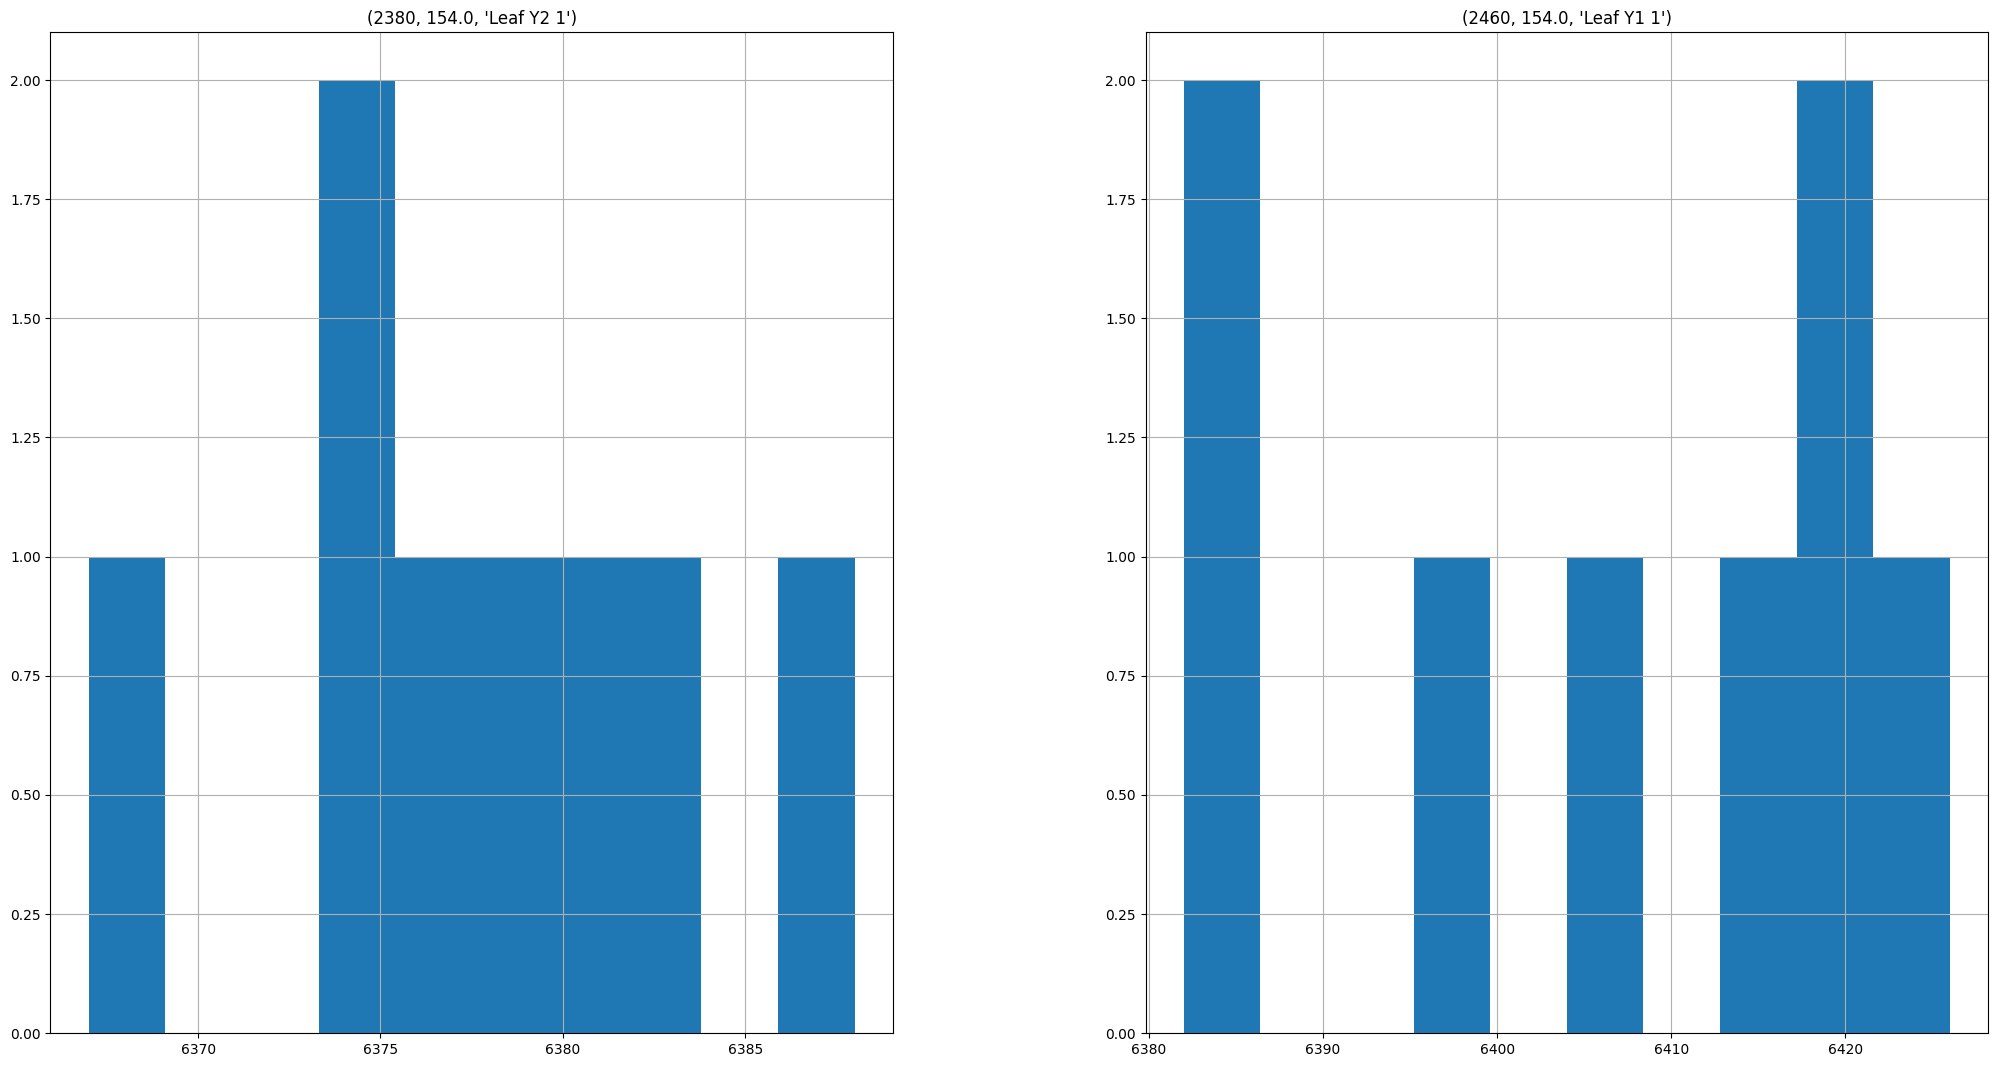

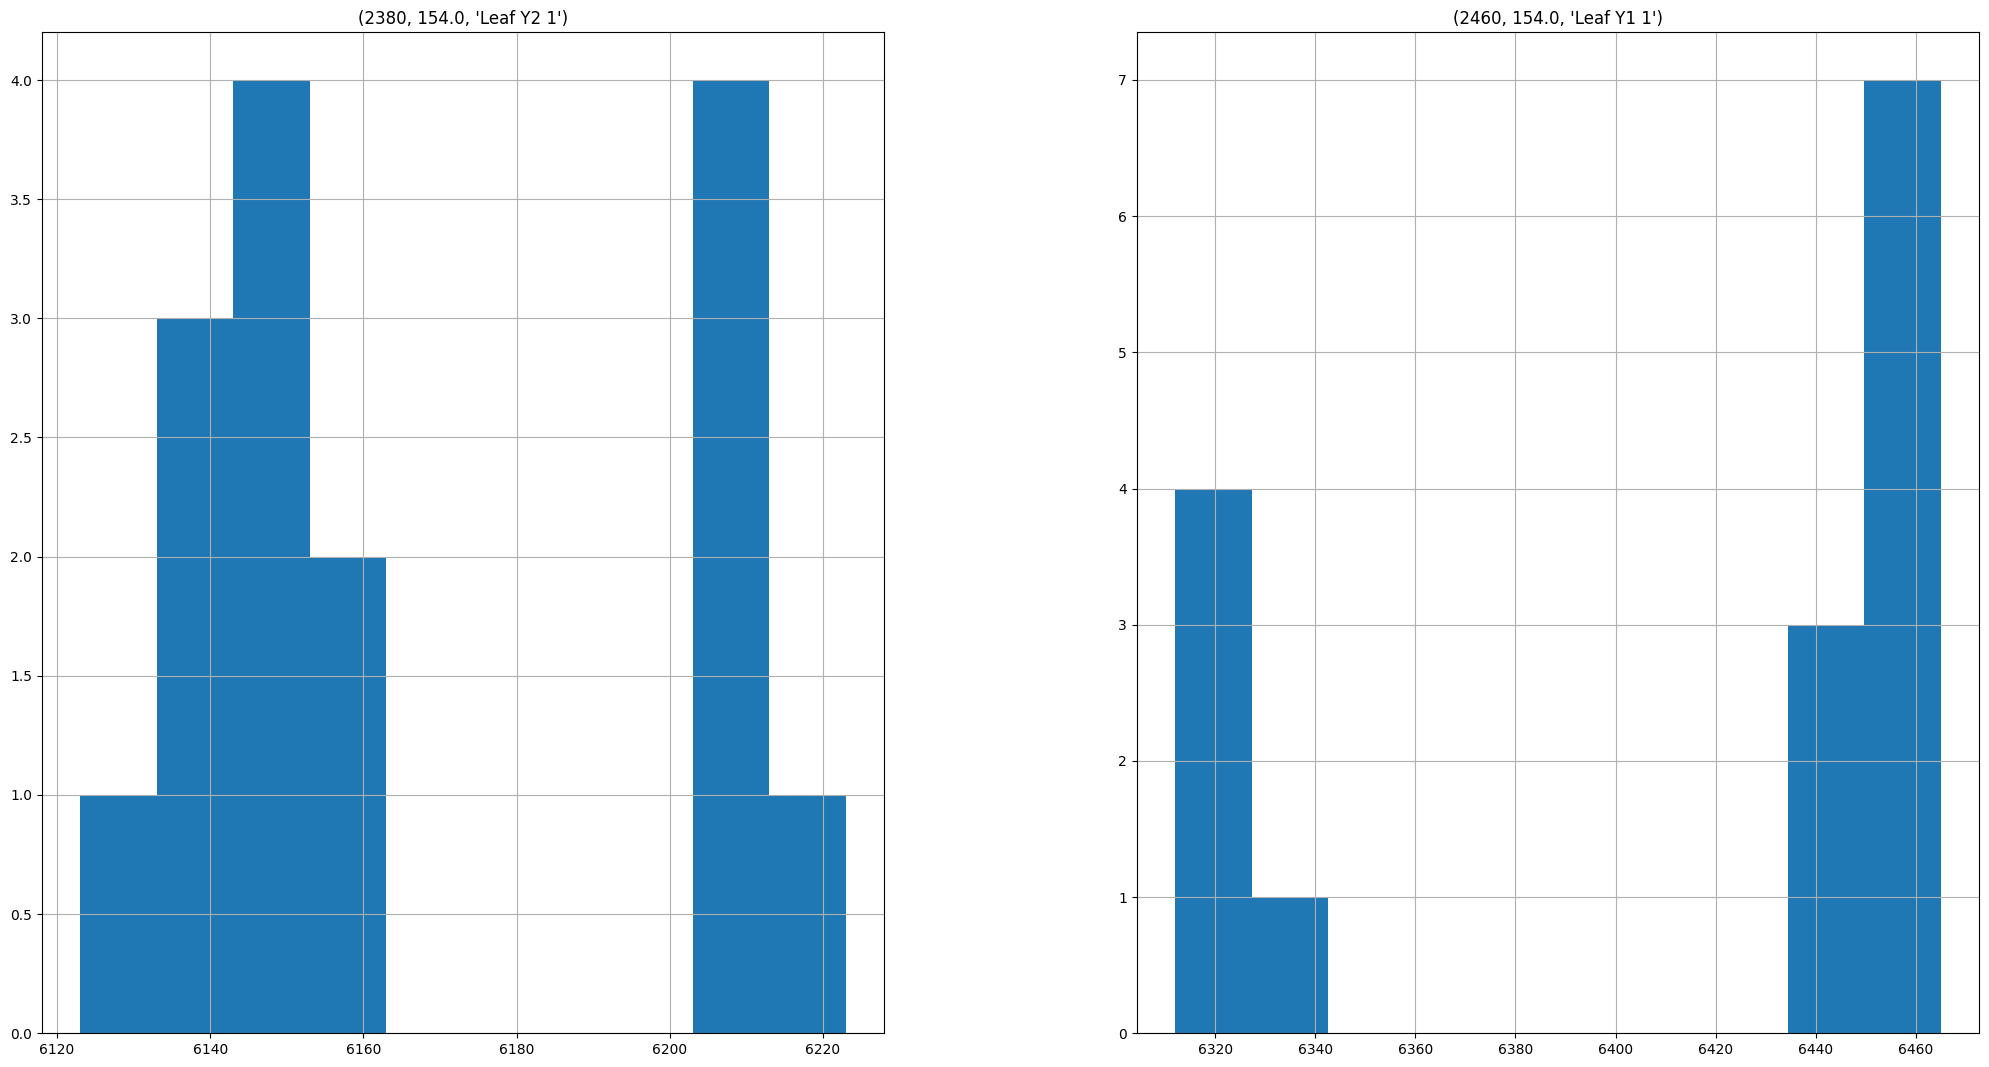

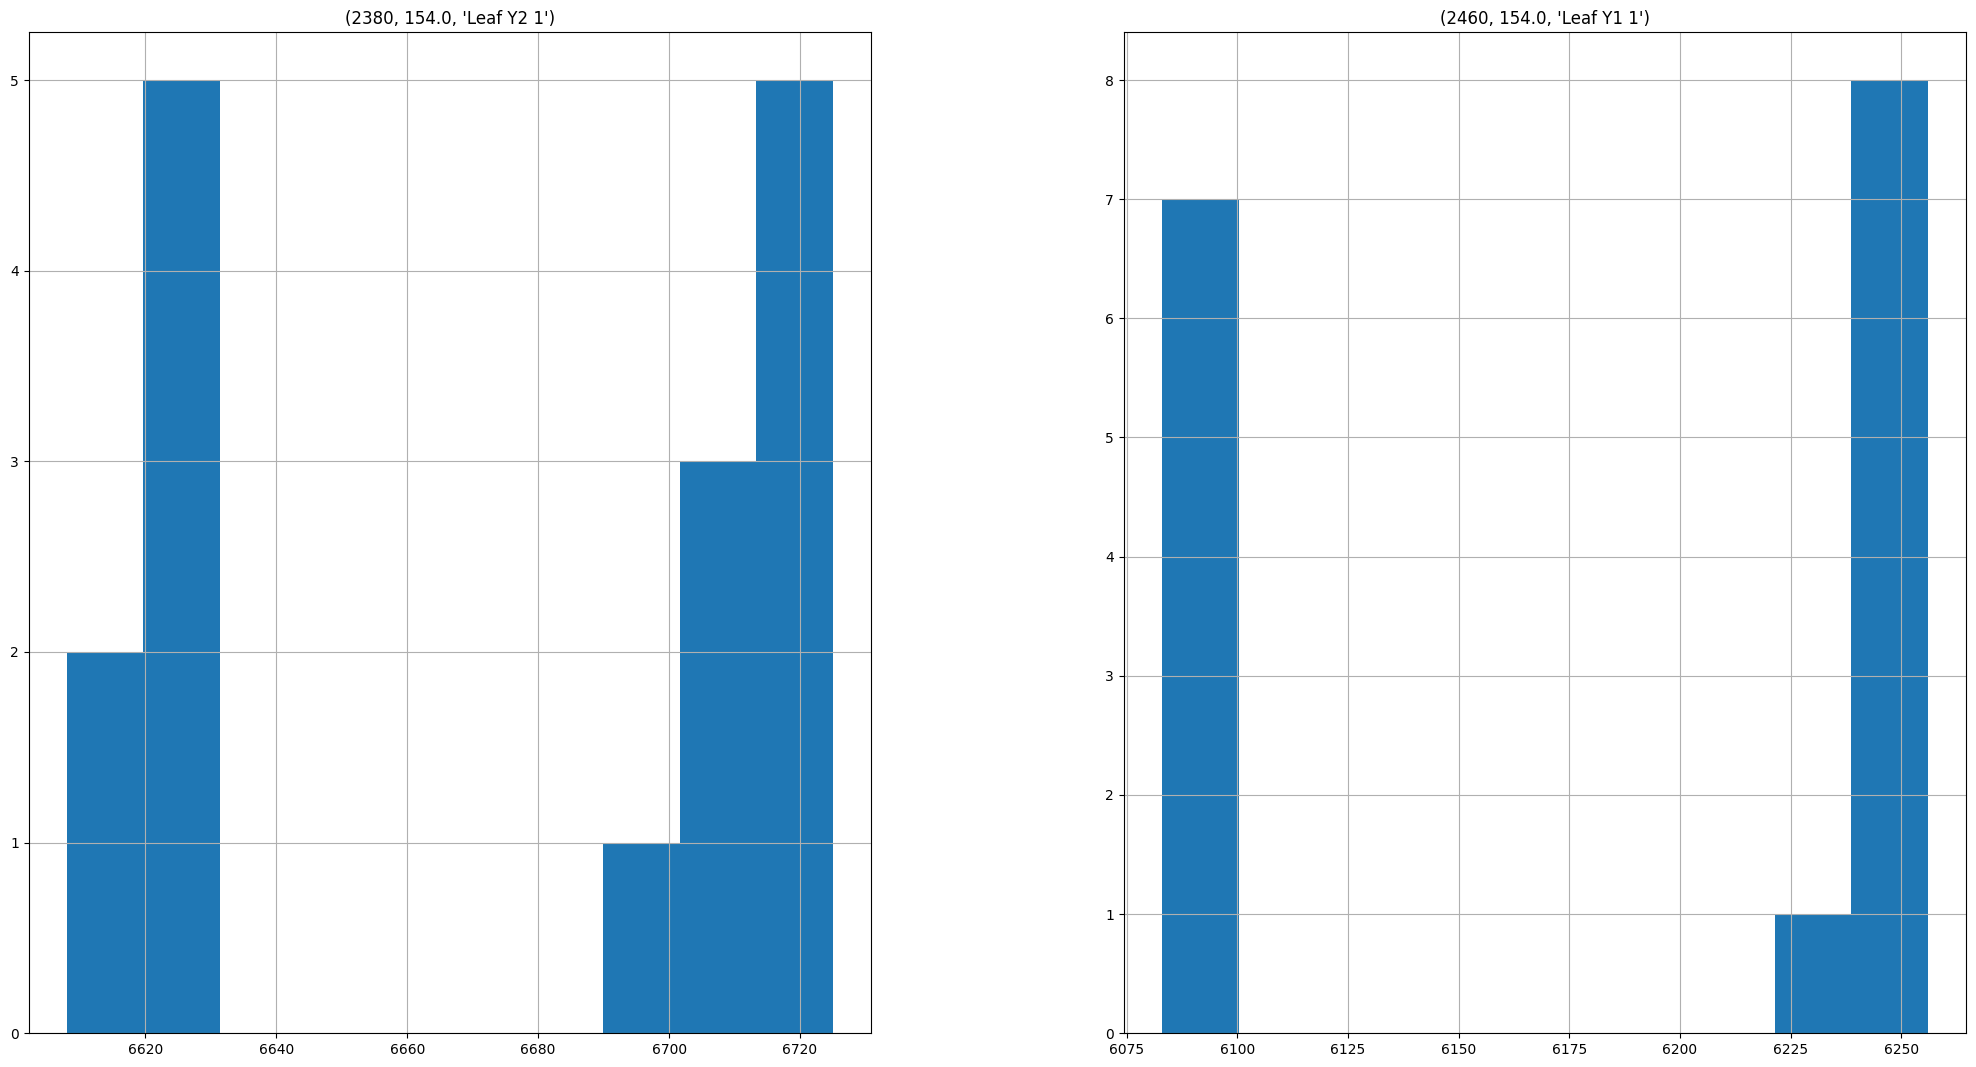

In [41]:
mlc_cal_data = merged_df[merged_df["file_name"] == "Mlc_Leaf_Sensor_Orig"]
mlc_cal_data["Part&item"] = "I:"+ mlc_cal_data["item"].astype(str) + " P:"+ mlc_cal_data["part"].astype(str)

nop45 = mlc_cal_data[mlc_cal_data["part"] != 45]

for linac in list(set(nop45["linac"])):
    result = pd.DataFrame()

    linec_df = nop45[nop45["linac"] == linac]
    dates = list(set(linec_df["date"]))

    for item in range(len(dates)-1):
        old = linec_df[linec_df["date"] == dates[item]]
        new = linec_df[linec_df["date"] == dates[item+1]]

        diff = new["value"].values - old["value"].values
        temp = pd.DataFrame({
            "date": new["date"].tolist(),
            "difference": diff,
            "PI": new["Part&item"],
            "linac": new["linac"]
        })

        result = pd.concat([temp, result])
        

changed = result[result["difference"] != 0]

changes = changed["PI"].unique().tolist()


#only the changed combination of part and item
changes_df_mlc_leaf = mlc_cal_data[mlc_cal_data["Part&item"].isin(changes)]

show = pd.DataFrame()


# for every linac the describe of the same data
for linac in list(set(changes_df_mlc_leaf["linac"])):
    print(linac)
    pivoted_cal = changes_df_mlc_leaf[changes_df_mlc_leaf["linac"] == linac].pivot(index="date", columns=["item", "part", "category"], values="value")
    describing = pivoted_cal.describe()
    show = pd.concat([show, describing])
    pivoted_cal.hist(figsize=(25,13));

show.round(2)


In [42]:
for x in range(len(show.columns)):  
    p_I = show.columns[x][:2]


    fig = px.line(mlc_cal_data[mlc_cal_data["Part&item"] == f"I:{p_I[0]} P:{p_I[1]}"], x="date", y ="value", color="linac", hover_data=["Part&item", "category"],markers=True)
    fig.show()

## Mlc_leaf_travel

185: Least-significant WORD of leaf travel coarse.   
186: Most-significant WORD of leaf travel coarse.

C:\Users\Laris\AppData\Local\Temp\ipykernel_9116\936055601.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2983
2325
2638
2191


item          2380                2460          
part         185.0     186.0     185.0     186.0
category Leaf Y2 1 Leaf Y2 1 Leaf Y1 1 Leaf Y1 1
count        56.00     56.00     56.00     56.00
mean      34113.43      6.12  35137.32      6.09
std       18812.25      0.79  18619.76      0.79
min         901.00      5.00   1459.00      5.00
25%       17076.00      5.75  18513.75      5.00
50%       35729.50      6.00  37369.00      6.00
75%       50885.75      7.00  51660.00      7.00
max       64219.00      7.00  65312.00      7.00
count        36.00     36.00     36.00     36.00
mean      31390.06     11.83  33663.75     12.11
std       18790.42      0.74  19273.30      0.71
min         570.00     11.00    582.00     11.00
25%       14305.75     11.00  18624.00     12.00
50%       32978.50     12.00  32894.00     12.00
75%       45767.25     12.00  52224.75     13.00
max       64599.00     13.00  65101.00     13.00
count        60.00     60.00     60.00     60.00
mean      31984.10     12.03  31995.20     12.17
std       20446.82      1.25  19957.05      1.24
min         197.00     10.00    244.00     10.00
25%       13908.00     11.00  16194.75     11.00
50%       27551.00     12.00  28491.00     12.00
75%       51165.50     13.00  51692.75     13.00
max       64771.00     14.00  65479.00     14.00
count        74.00     74.00     74.00     74.00
mean      32249.82      8.85  33335.03      8.93
std       19023.58      0.84  19273.15      0.83
min         560.00      7.00    244.00      7.00
25%       16318.50      8.00  16251.50      8.00
50%       32298.00      9.00  33343.50      9.00
75%       47881.00      9.75  50506.50     10.00
max       64416.00     10.00  65251.00     10.00

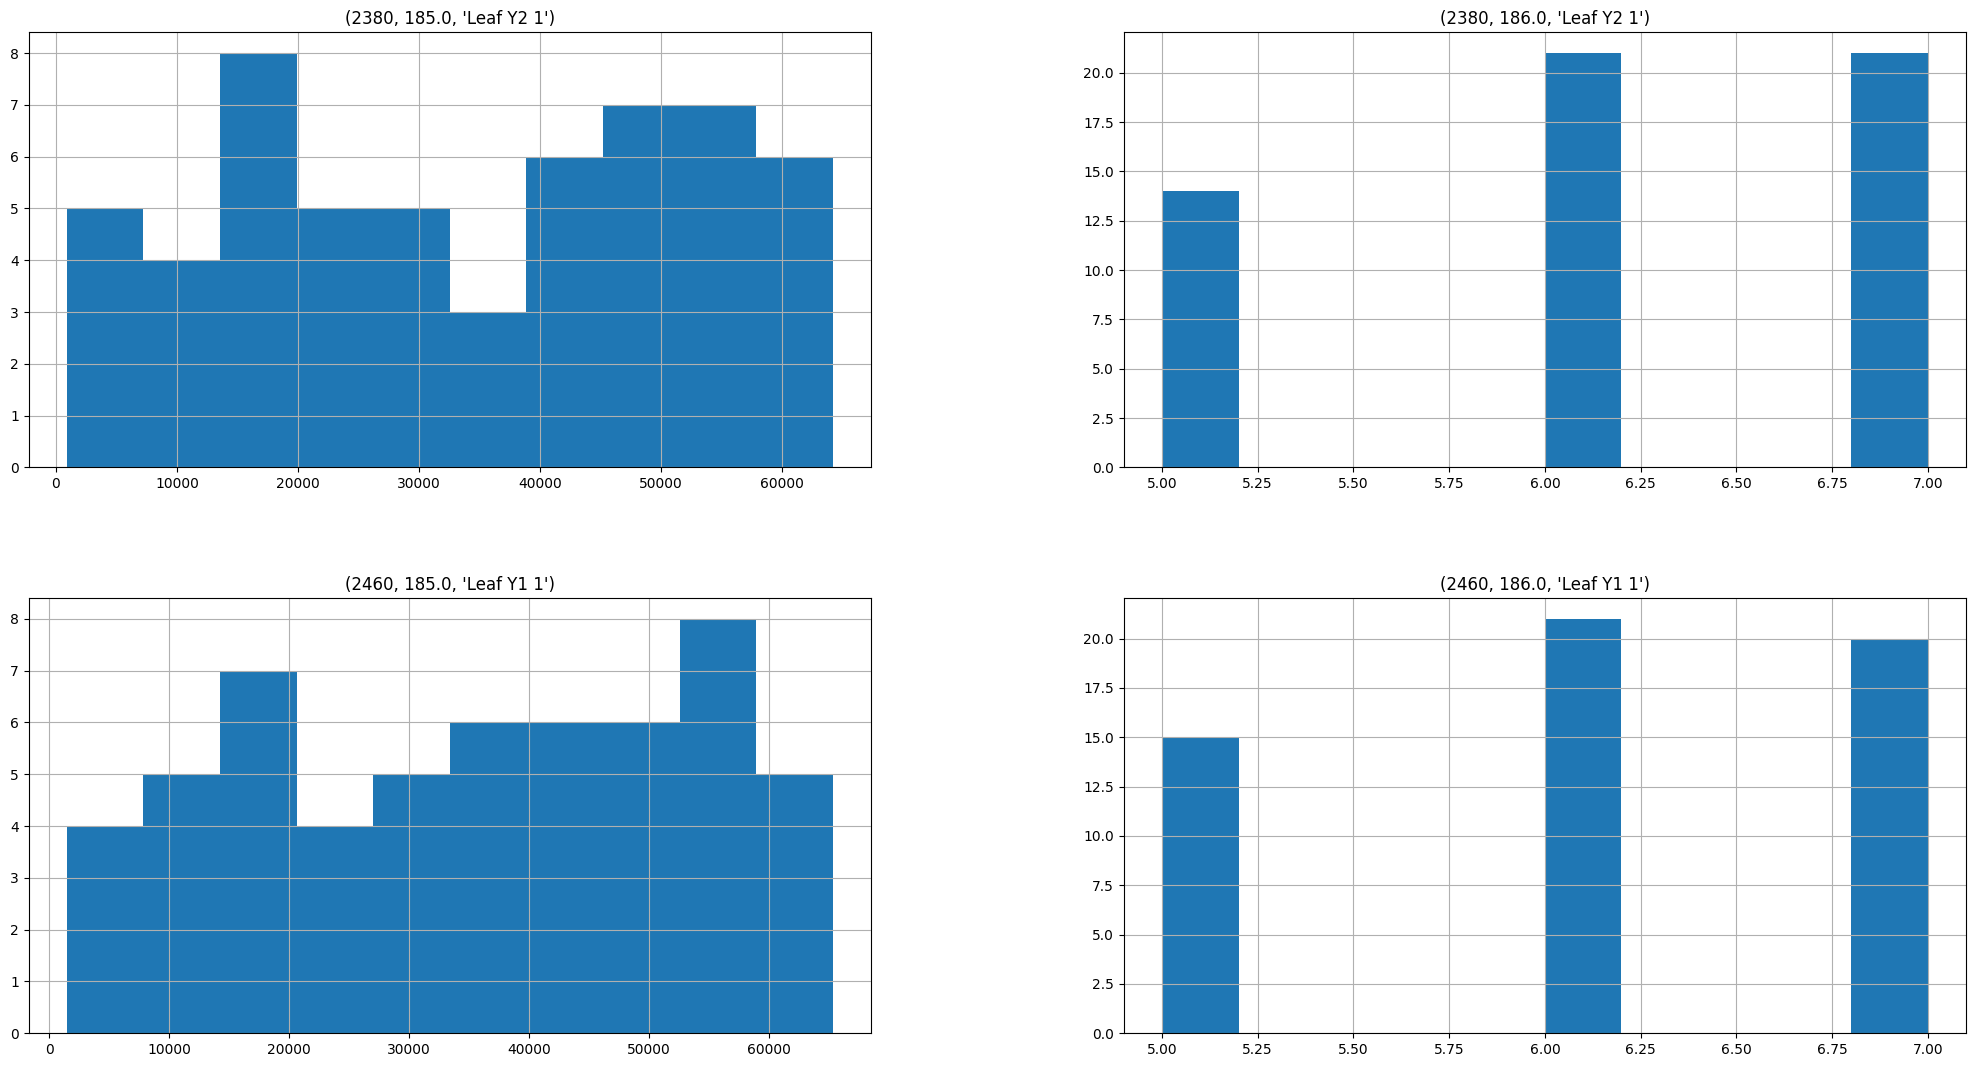

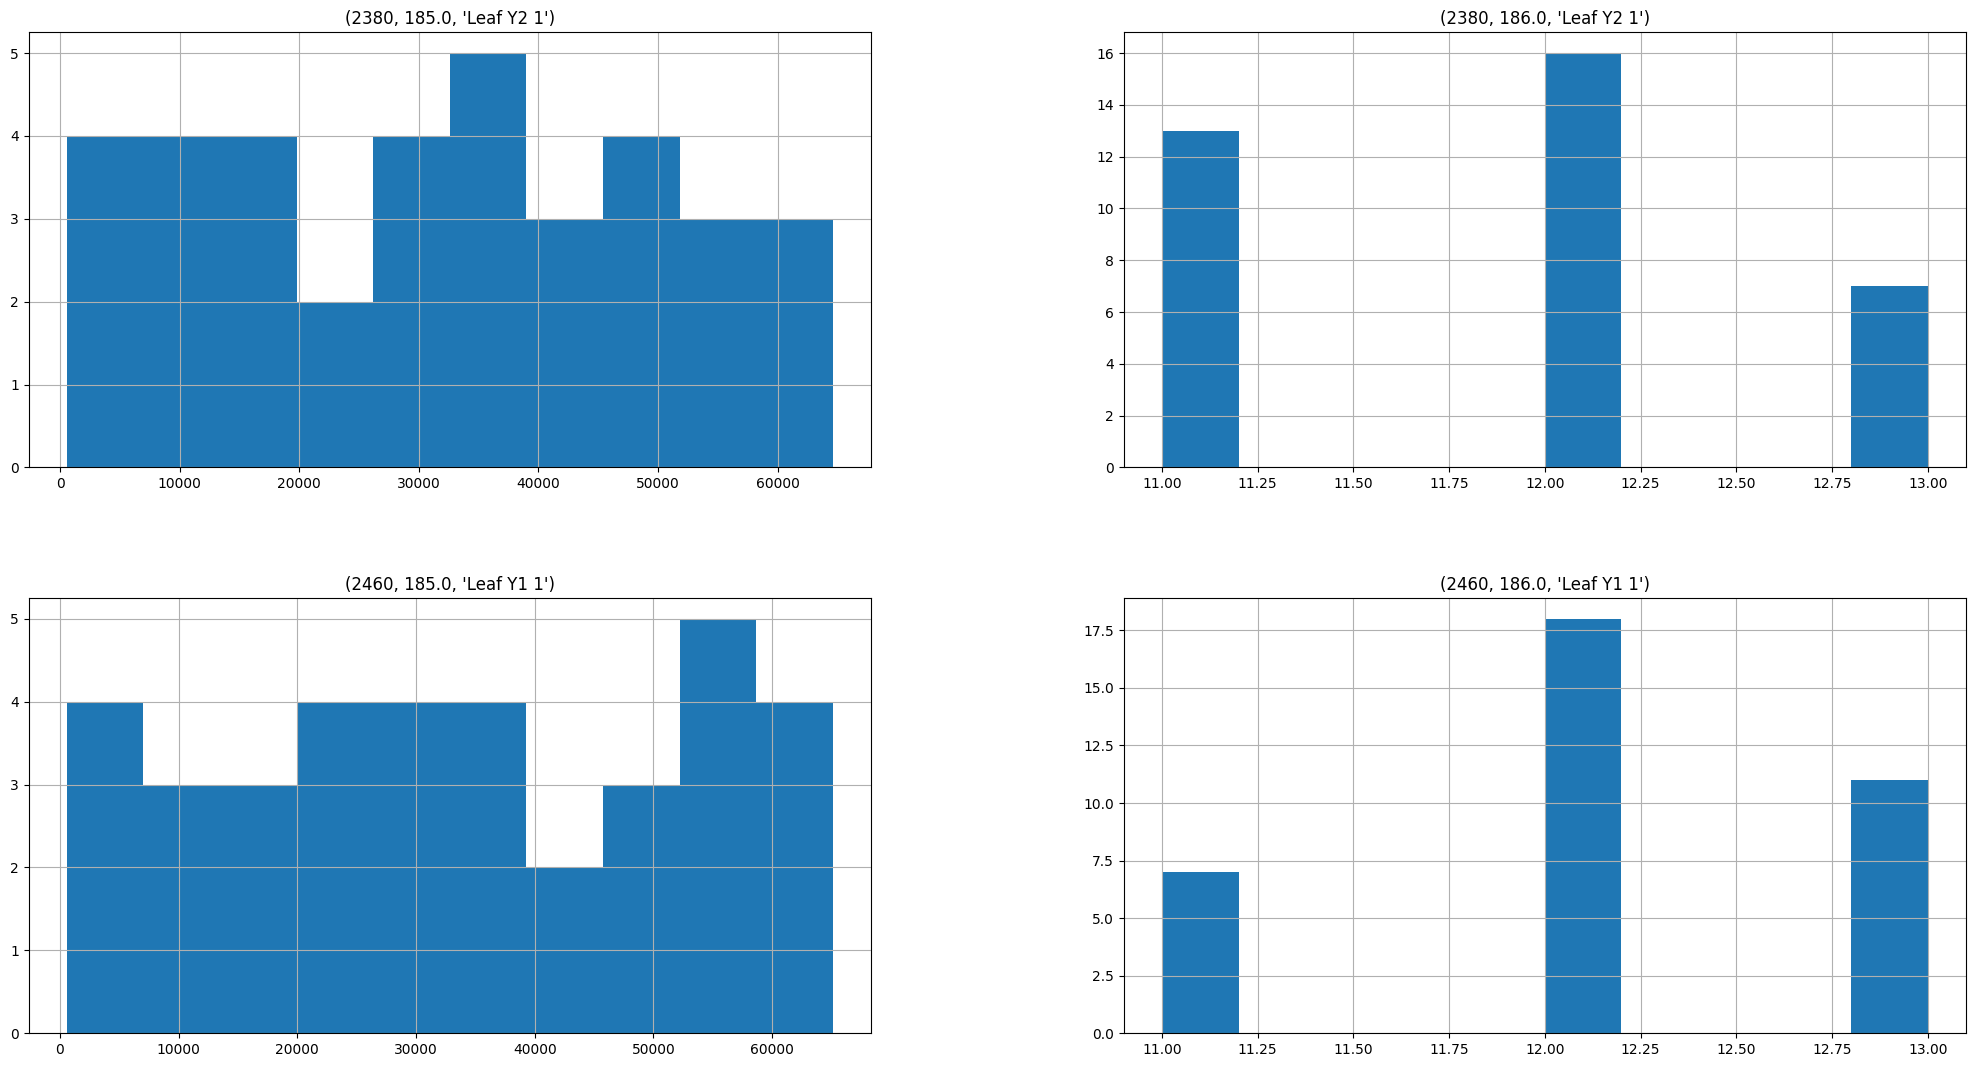

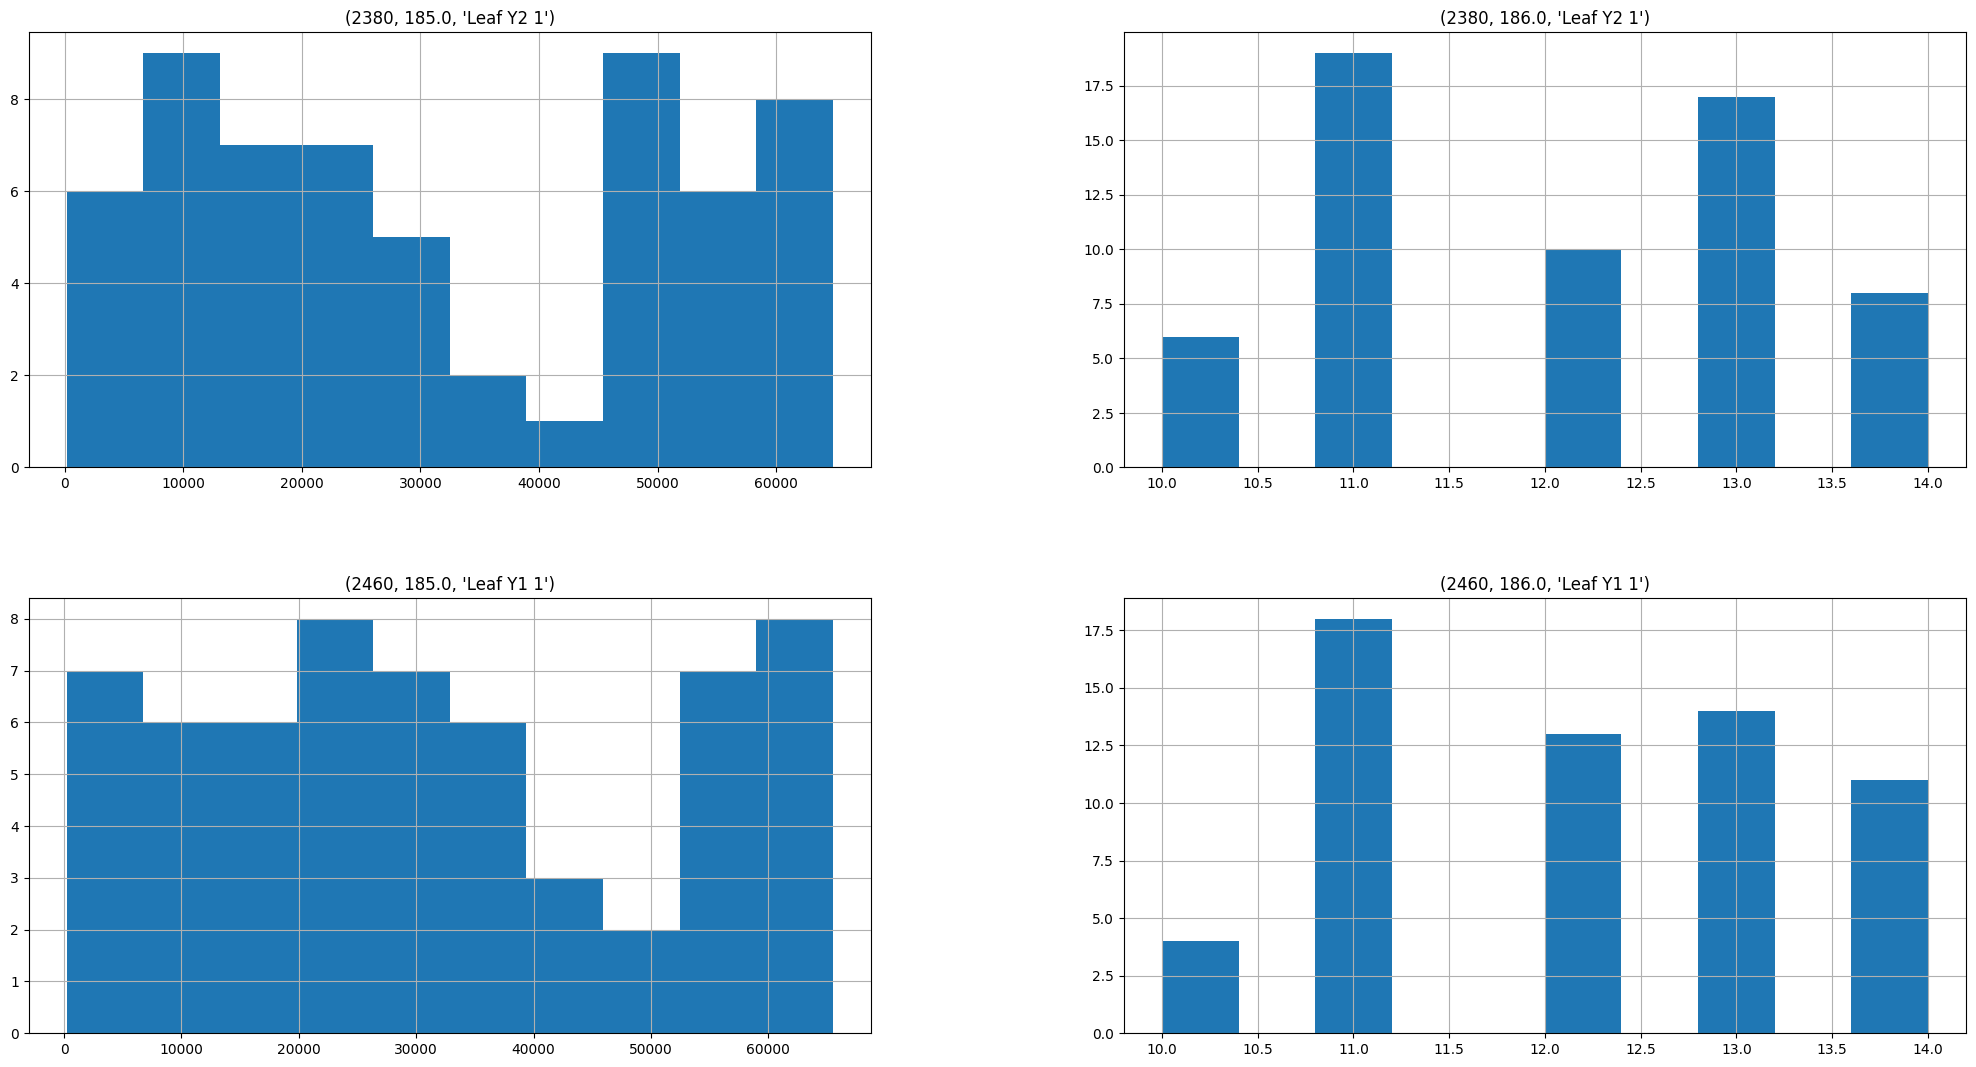

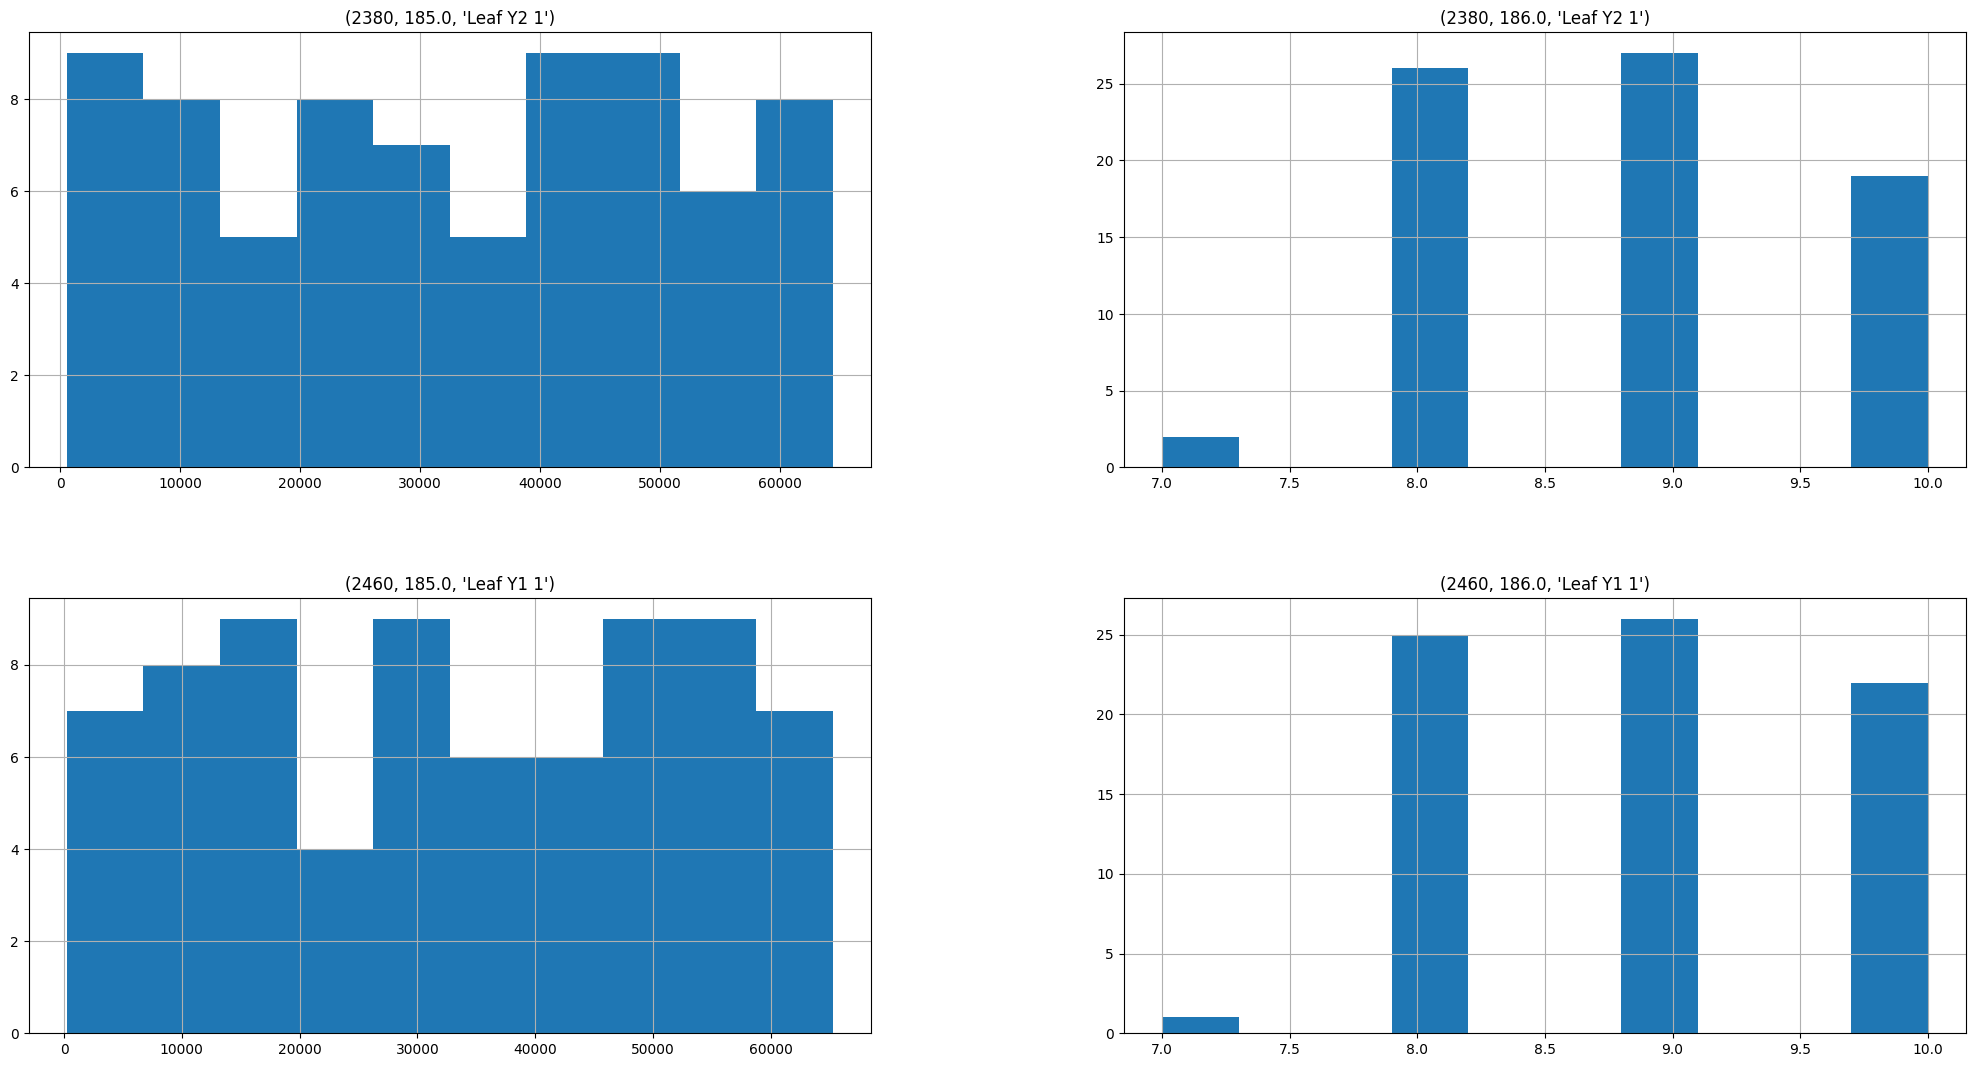

In [43]:
mlc_cal_data = merged_df[merged_df["file_name"] == "Mlc_leaf_travel"]
mlc_cal_data["Part&item"] = "I:"+ mlc_cal_data["item"].astype(str) + " P:"+ mlc_cal_data["part"].astype(str)

nop45 = mlc_cal_data[mlc_cal_data["part"] != 45]

for linac in list(set(nop45["linac"])):
    result = pd.DataFrame()

    linec_df = nop45[nop45["linac"] == linac]
    dates = list(set(linec_df["date"]))

    for item in range(len(dates)-1):
        old = linec_df[linec_df["date"] == dates[item]]
        new = linec_df[linec_df["date"] == dates[item+1]]

        diff = new["value"].values - old["value"].values
        temp = pd.DataFrame({
            "date": new["date"].tolist(),
            "difference": diff,
            "PI": new["Part&item"],
            "linac": new["linac"]
        })

        result = pd.concat([temp, result])
        

changed = result[result["difference"] != 0]

changes = changed["PI"].unique().tolist()


#only the changed combination of part and item
changes_df_leaf_travel = mlc_cal_data[mlc_cal_data["Part&item"].isin(changes)]

show = pd.DataFrame()


# for every linac the describe of the same data
for linac in list(set(changes_df_leaf_travel["linac"])):
    print(linac)
    pivoted_cal = changes_df_leaf_travel[changes_df_leaf_travel["linac"] == linac].pivot(index="date", columns=["item", "part", "category"], values="value")
    describing = pivoted_cal.describe()
    show = pd.concat([show, describing])
    pivoted_cal.hist(figsize=(25,13));

show.round(2)


In [44]:
for x in range(len(show.columns)):  
    p_I = show.columns[x][:2]


    fig = px.line(mlc_cal_data[mlc_cal_data["Part&item"] == f"I:{p_I[0]} P:{p_I[1]}"], x="date", y ="value", color="linac", hover_data=["Part&item", "category"],markers=True)
    fig.show()

## Mlc_Minr_Off

152: Workflow set offset to adjust the radiation mapping.

C:\Users\Laris\AppData\Local\Temp\ipykernel_9116\47259742.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2983
2325
2638
2191


item,2380,2460
part,152.0,152.0
category,Leaf Y2 1,Leaf Y1 1
count,13.00,13.00
mean,-1068.85,150.38
std,59.06,93.79
min,-1172.00,31.00
25%,-1101.00,92.00
50%,-1067.00,127.00
75%,-1034.00,210.00
max,-972.00,339.00


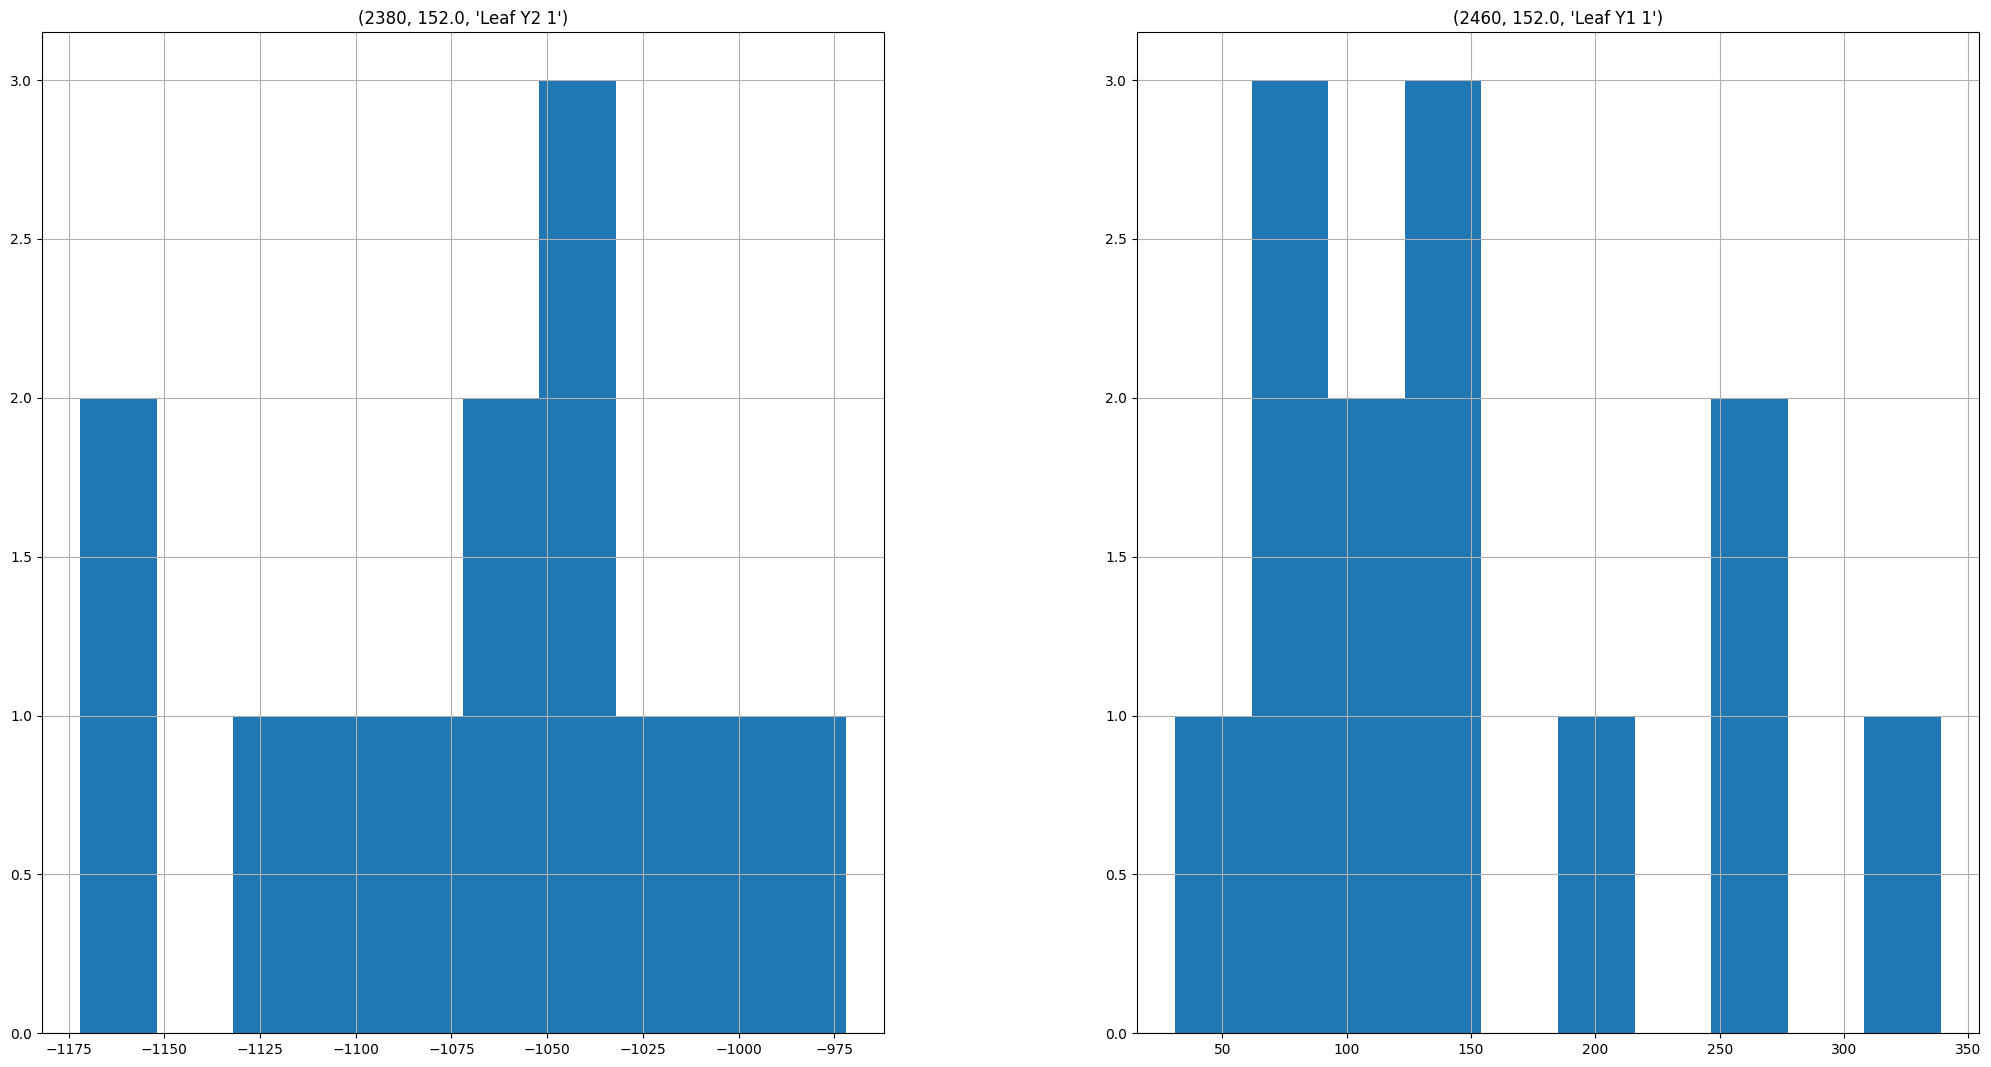

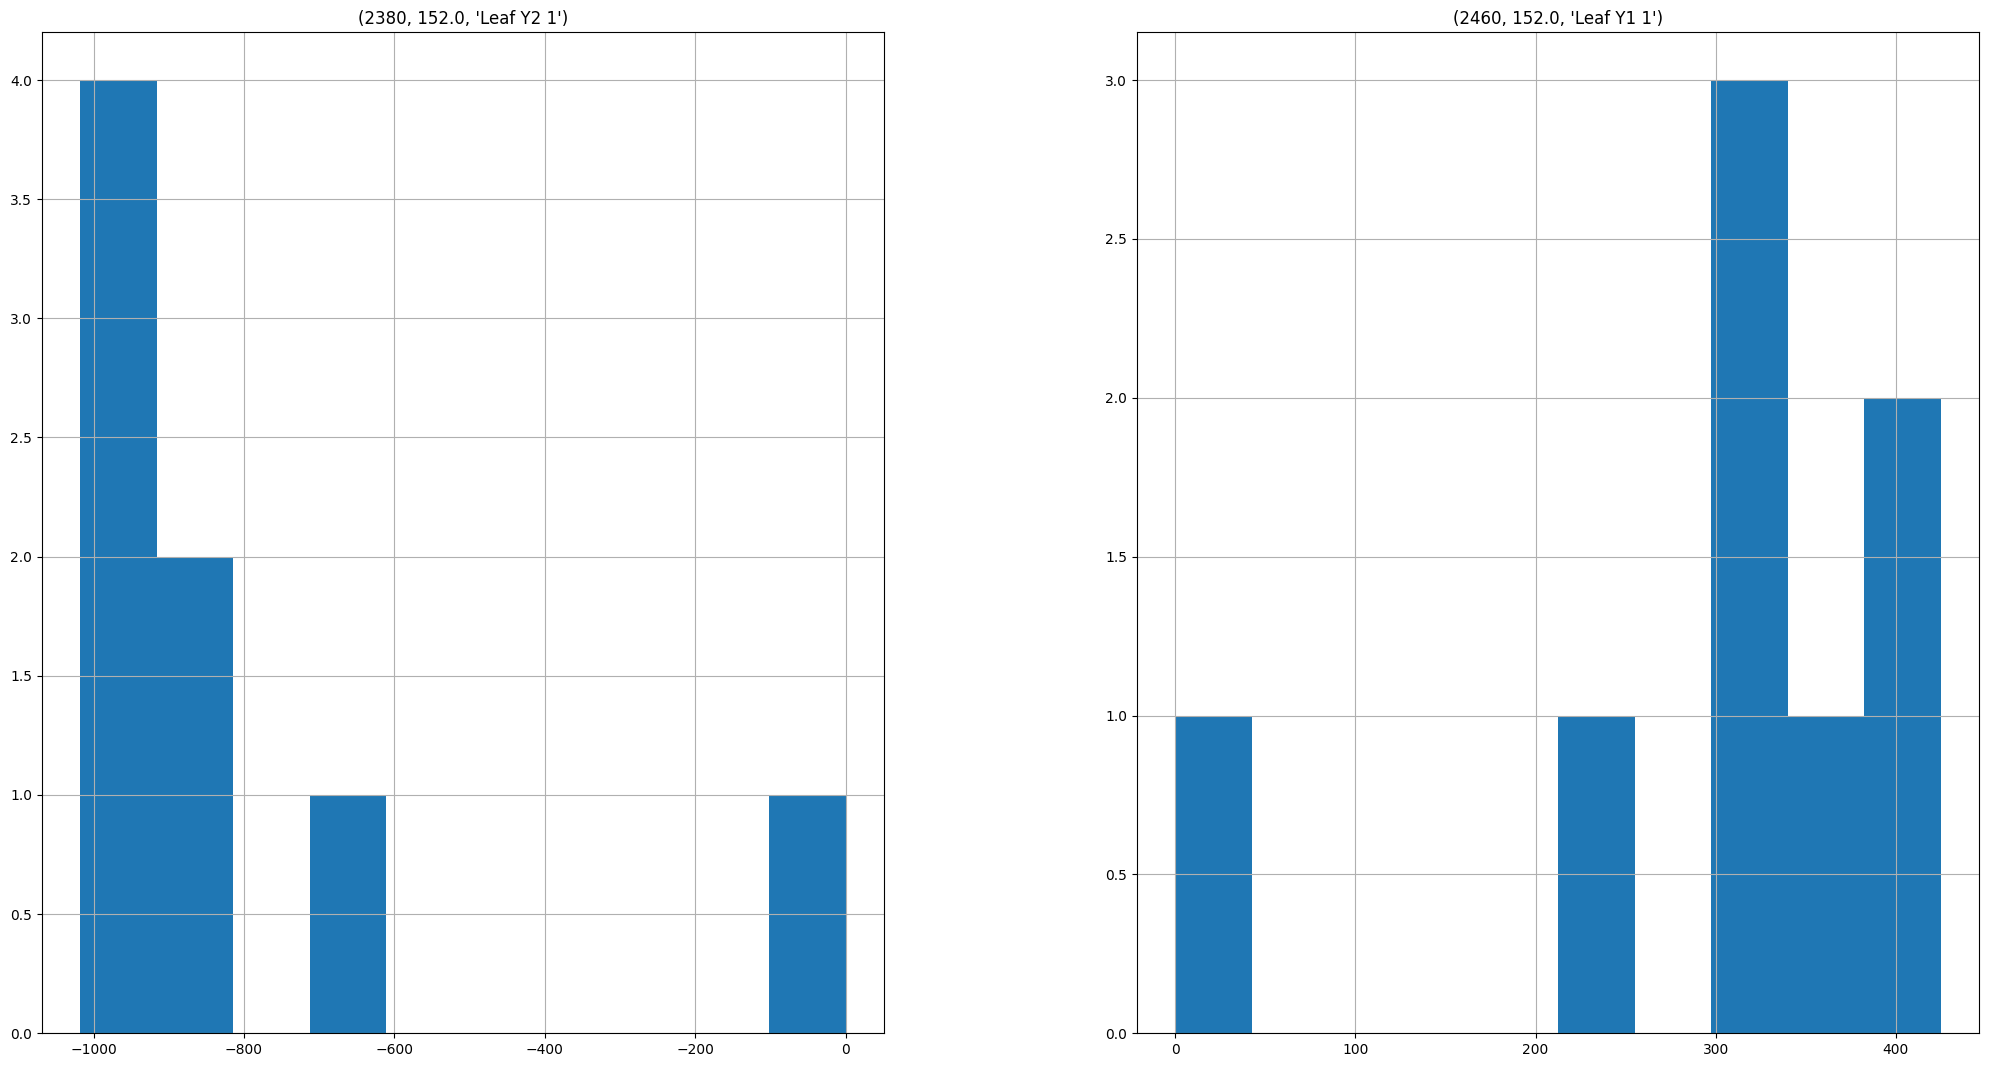

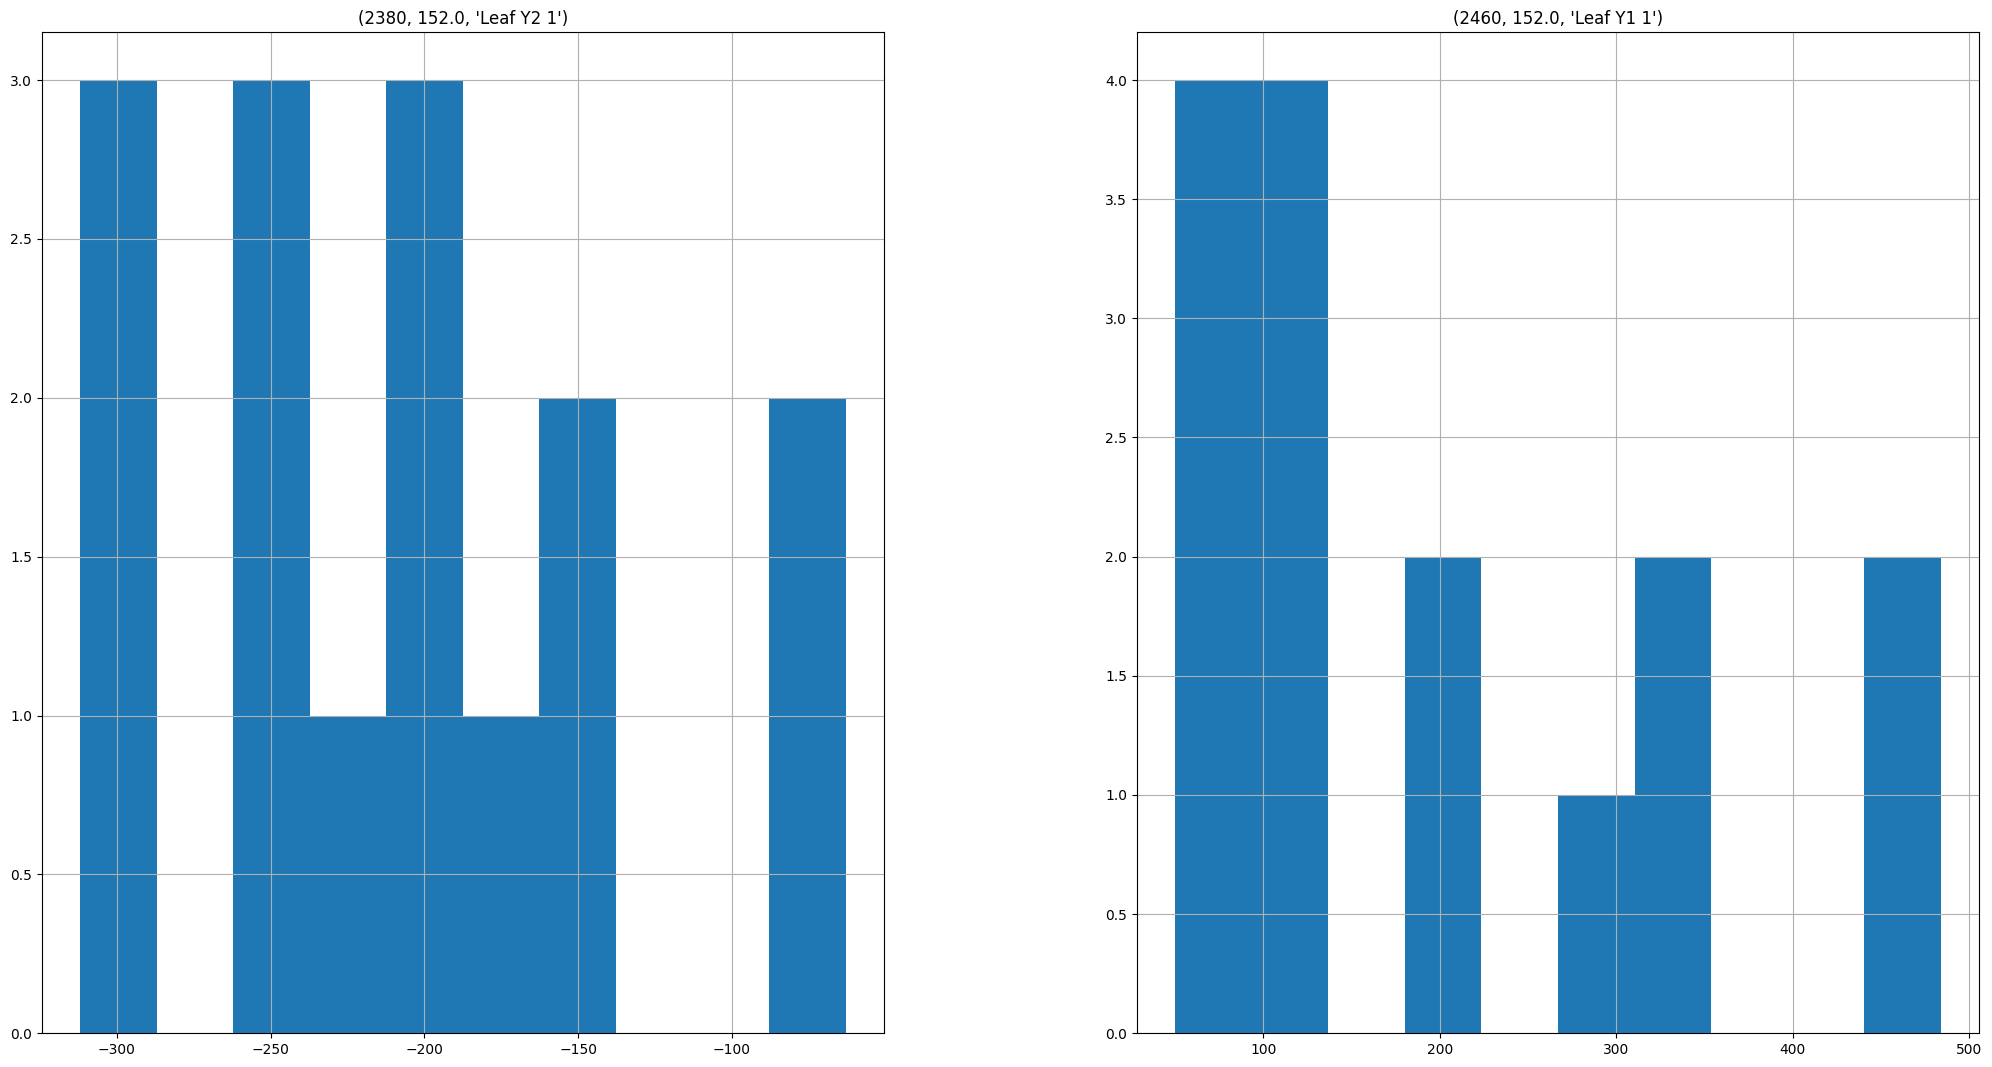

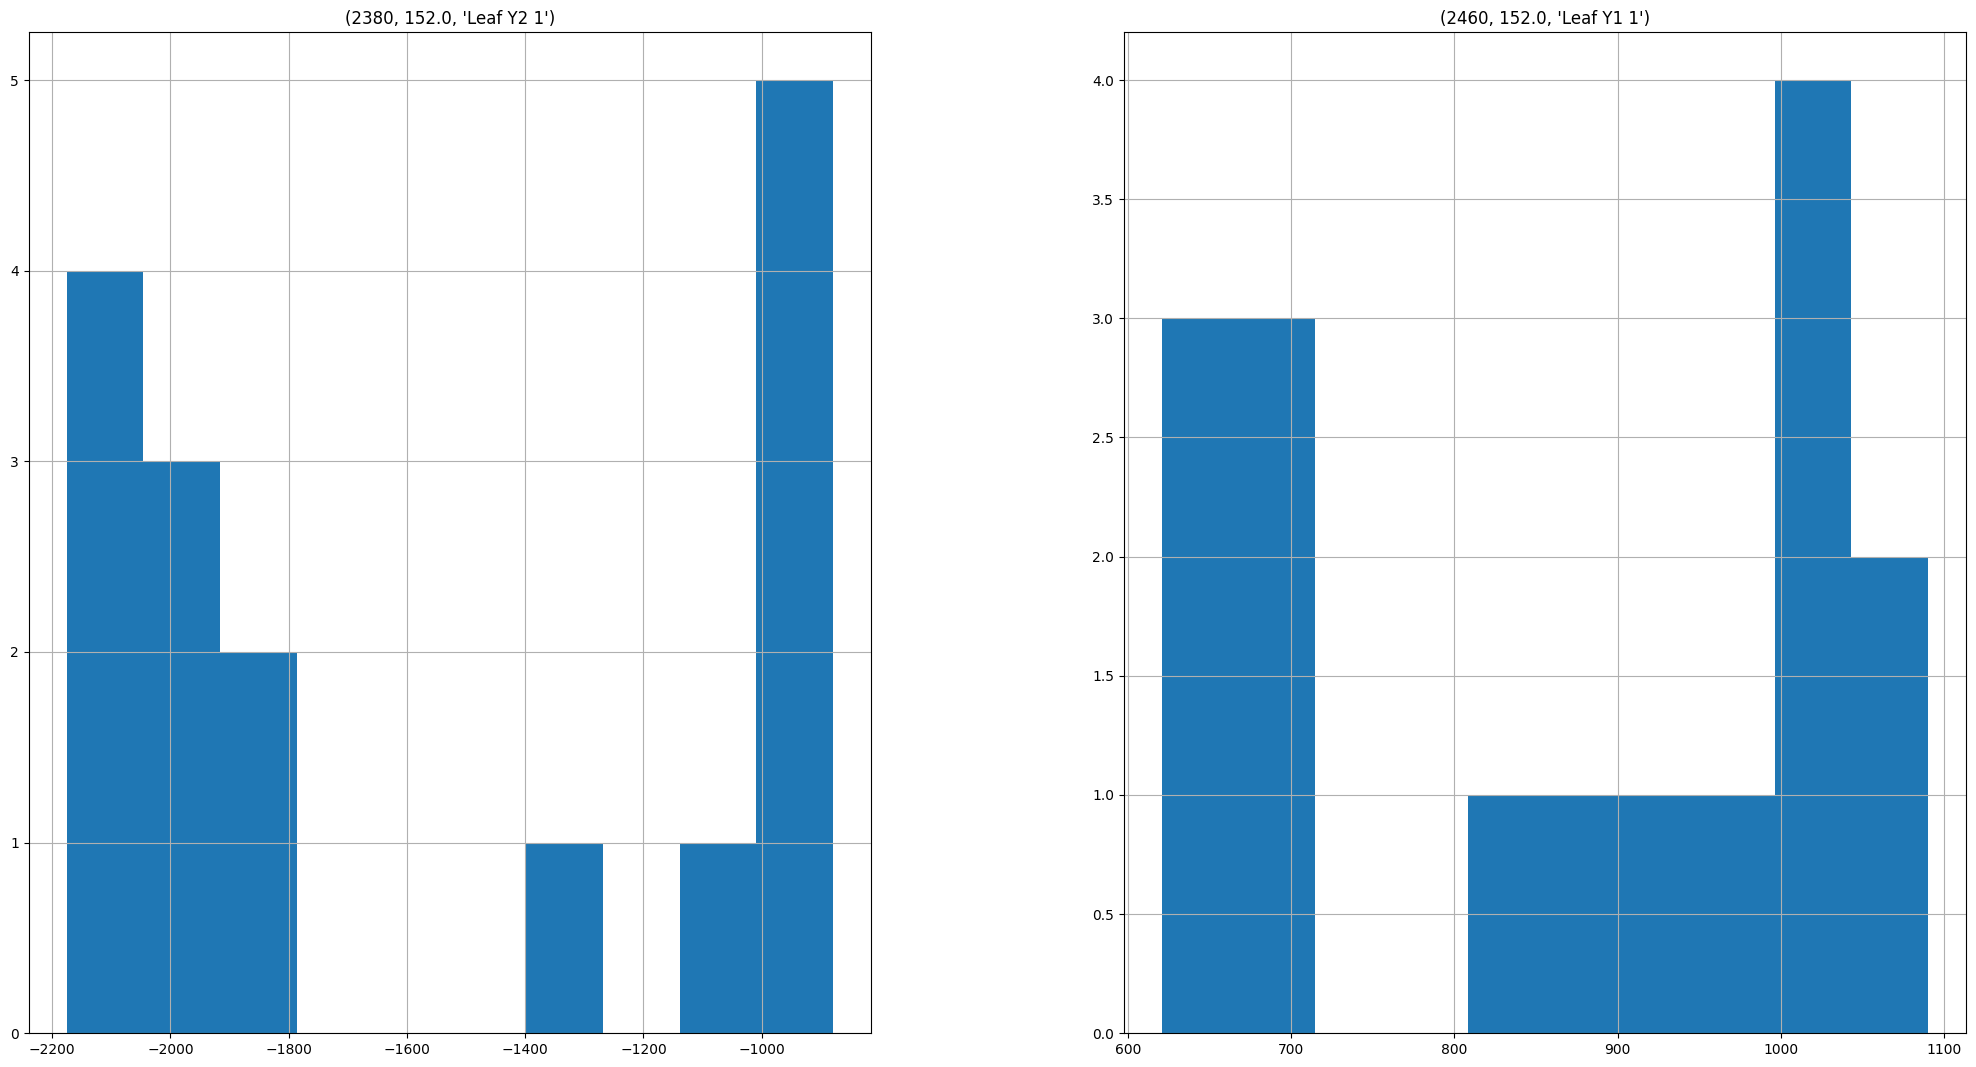

In [45]:
mlc_cal_data = merged_df[merged_df["file_name"] == "Mlc_Minr_Off"]
mlc_cal_data["Part&item"] = "I:"+ mlc_cal_data["item"].astype(str) + " P:"+ mlc_cal_data["part"].astype(str)

nop45 = mlc_cal_data[mlc_cal_data["part"] != 45]

for linac in list(set(nop45["linac"])):
    result = pd.DataFrame()

    linec_df = nop45[nop45["linac"] == linac]
    dates = list(set(linec_df["date"]))

    for item in range(len(dates)-1):
        old = linec_df[linec_df["date"] == dates[item]]
        new = linec_df[linec_df["date"] == dates[item+1]]

        diff = new["value"].values - old["value"].values
        temp = pd.DataFrame({
            "date": new["date"].tolist(),
            "difference": diff,
            "PI": new["Part&item"],
            "linac": new["linac"]
        })

        result = pd.concat([temp, result])
        

changed = result[result["difference"] != 0]

changes = changed["PI"].unique().tolist()


#only the changed combination of part and item
changes_df_minor = mlc_cal_data[mlc_cal_data["Part&item"].isin(changes)]

show = pd.DataFrame()


# for every linac the describe of the same data
for linac in list(set(changes_df_minor["linac"])):
    print(linac)
    pivoted_cal = changes_df_minor[changes_df_minor["linac"] == linac].pivot(index="date", columns=["item", "part", "category"], values="value")
    describing = pivoted_cal.describe()
    show = pd.concat([show, describing])
    pivoted_cal.hist(figsize=(25,13));

show.round(2)


In [46]:
for x in range(len(show.columns)):  
    p_I = show.columns[x][:2]


    fig = px.line(mlc_cal_data[mlc_cal_data["Part&item"] == f"I:{p_I[0]} P:{p_I[1]}"], x="date", y ="value", color="linac", hover_data=["Part&item", "category"],markers=True)
    fig.show()

## Mlc_refl_width


C:\Users\Laris\AppData\Local\Temp\ipykernel_9116\2071537035.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2983
2325
2638
2191


item,2380,2460
part,172.0,172.0
category,Leaf Y2 1,Leaf Y1 1
count,13.00,13.00
mean,18.85,19.15
std,0.38,0.38
min,18.00,19.00
25%,19.00,19.00
50%,19.00,19.00
75%,19.00,19.00
max,19.00,20.00


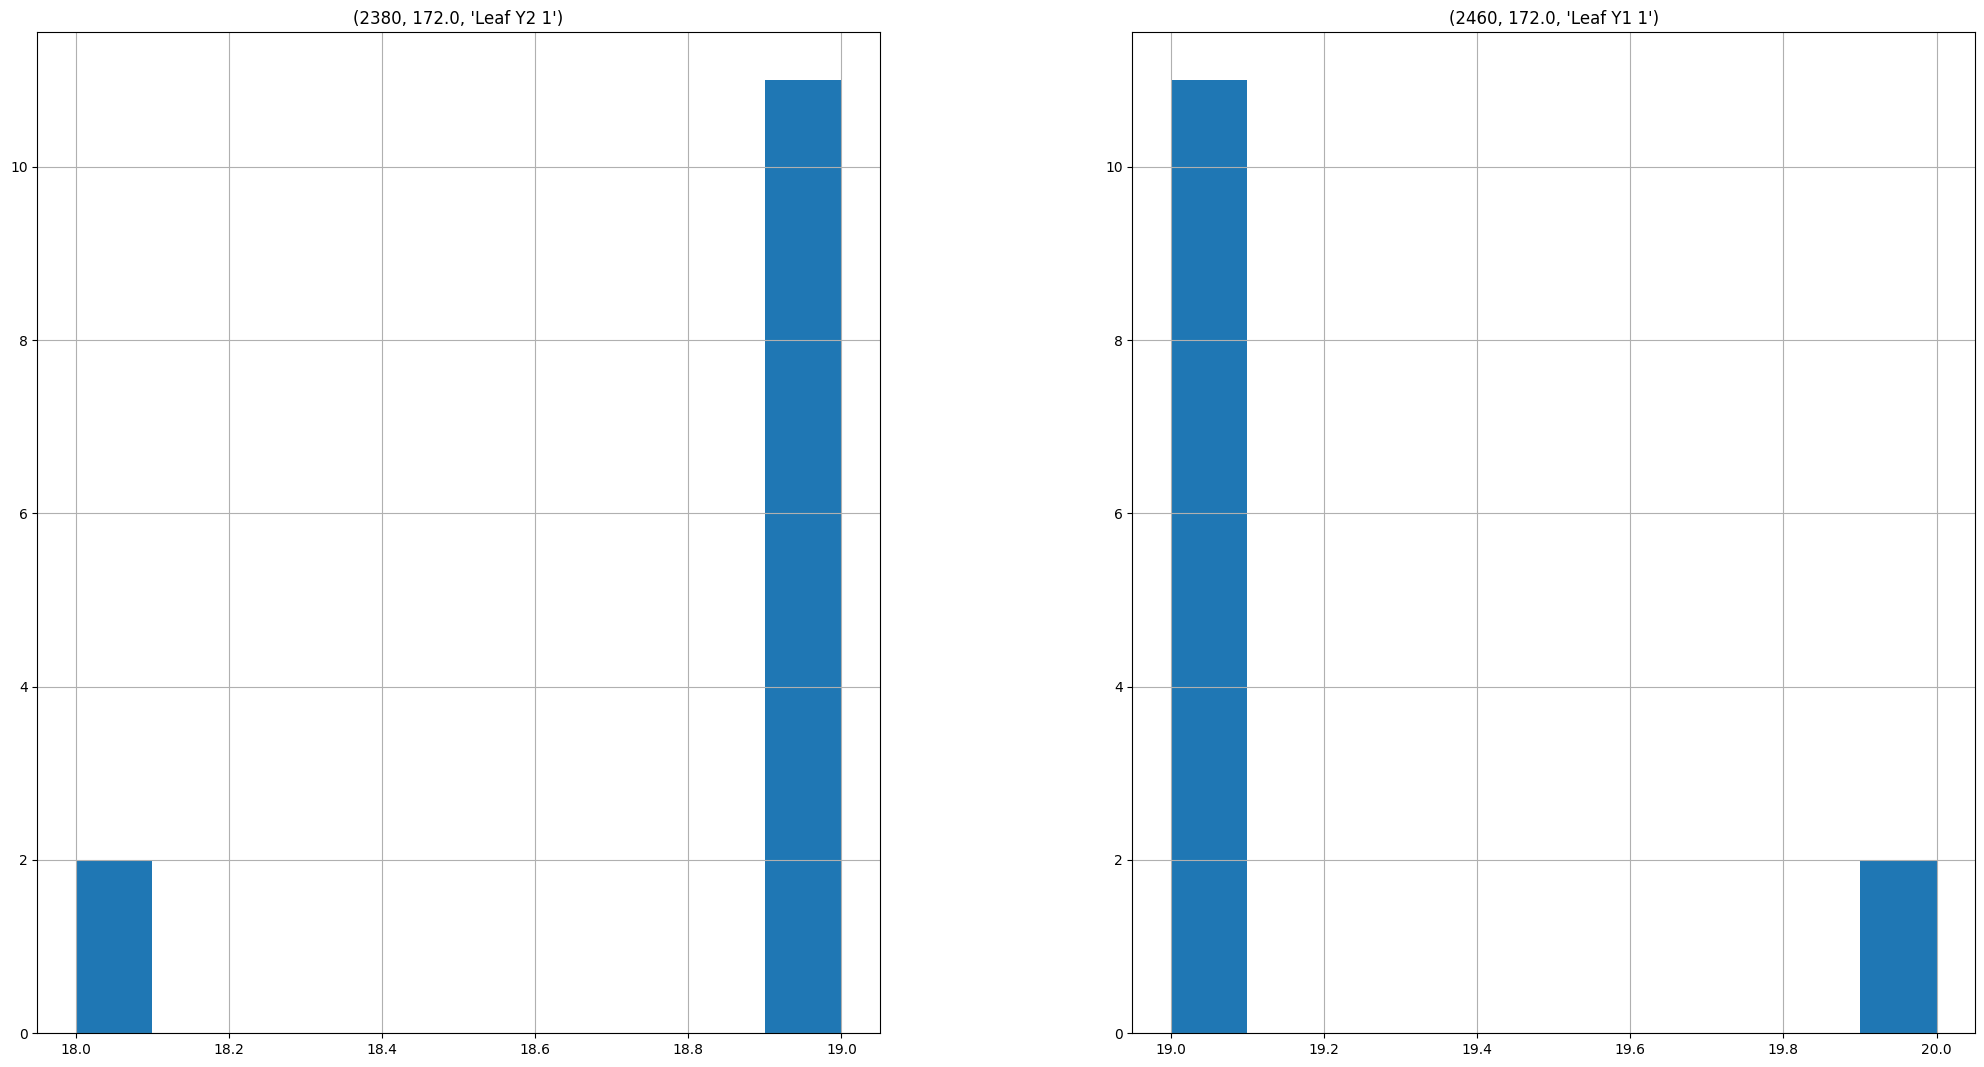

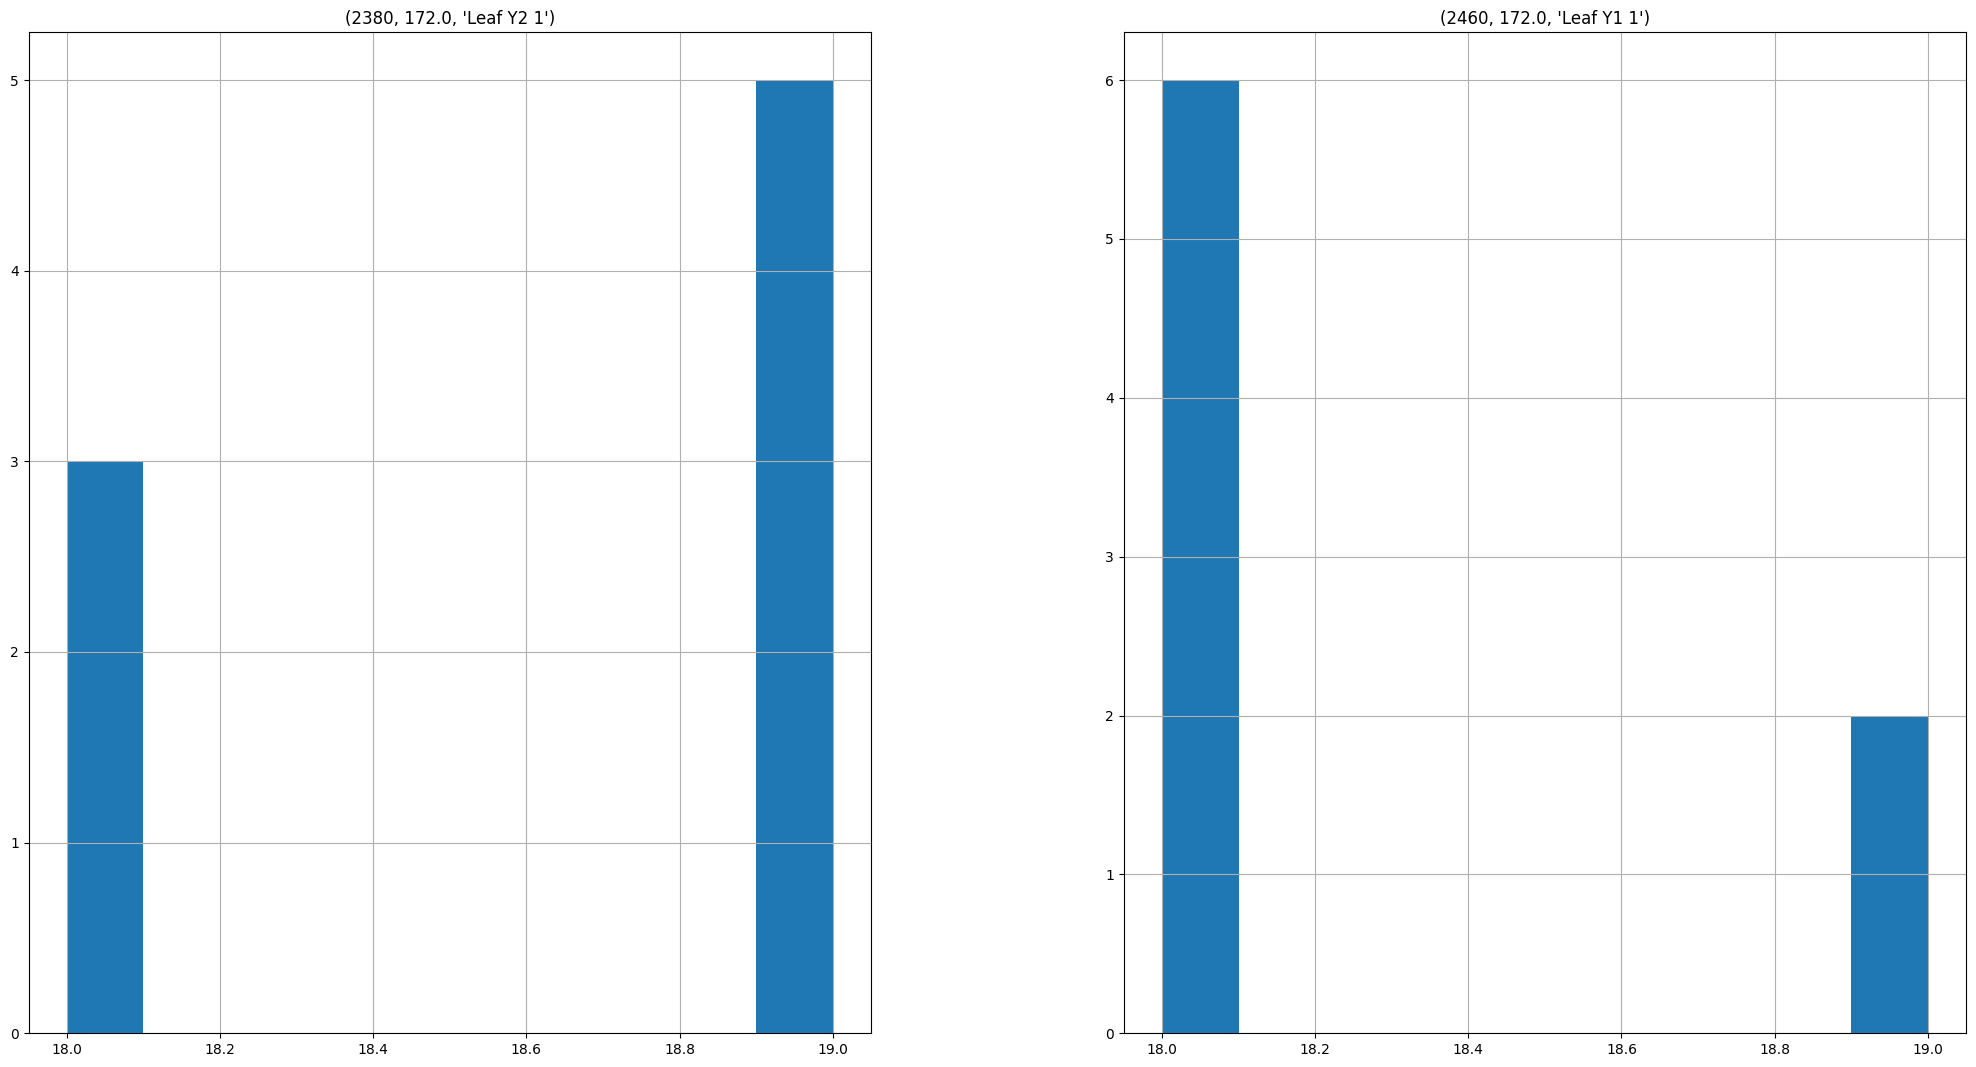

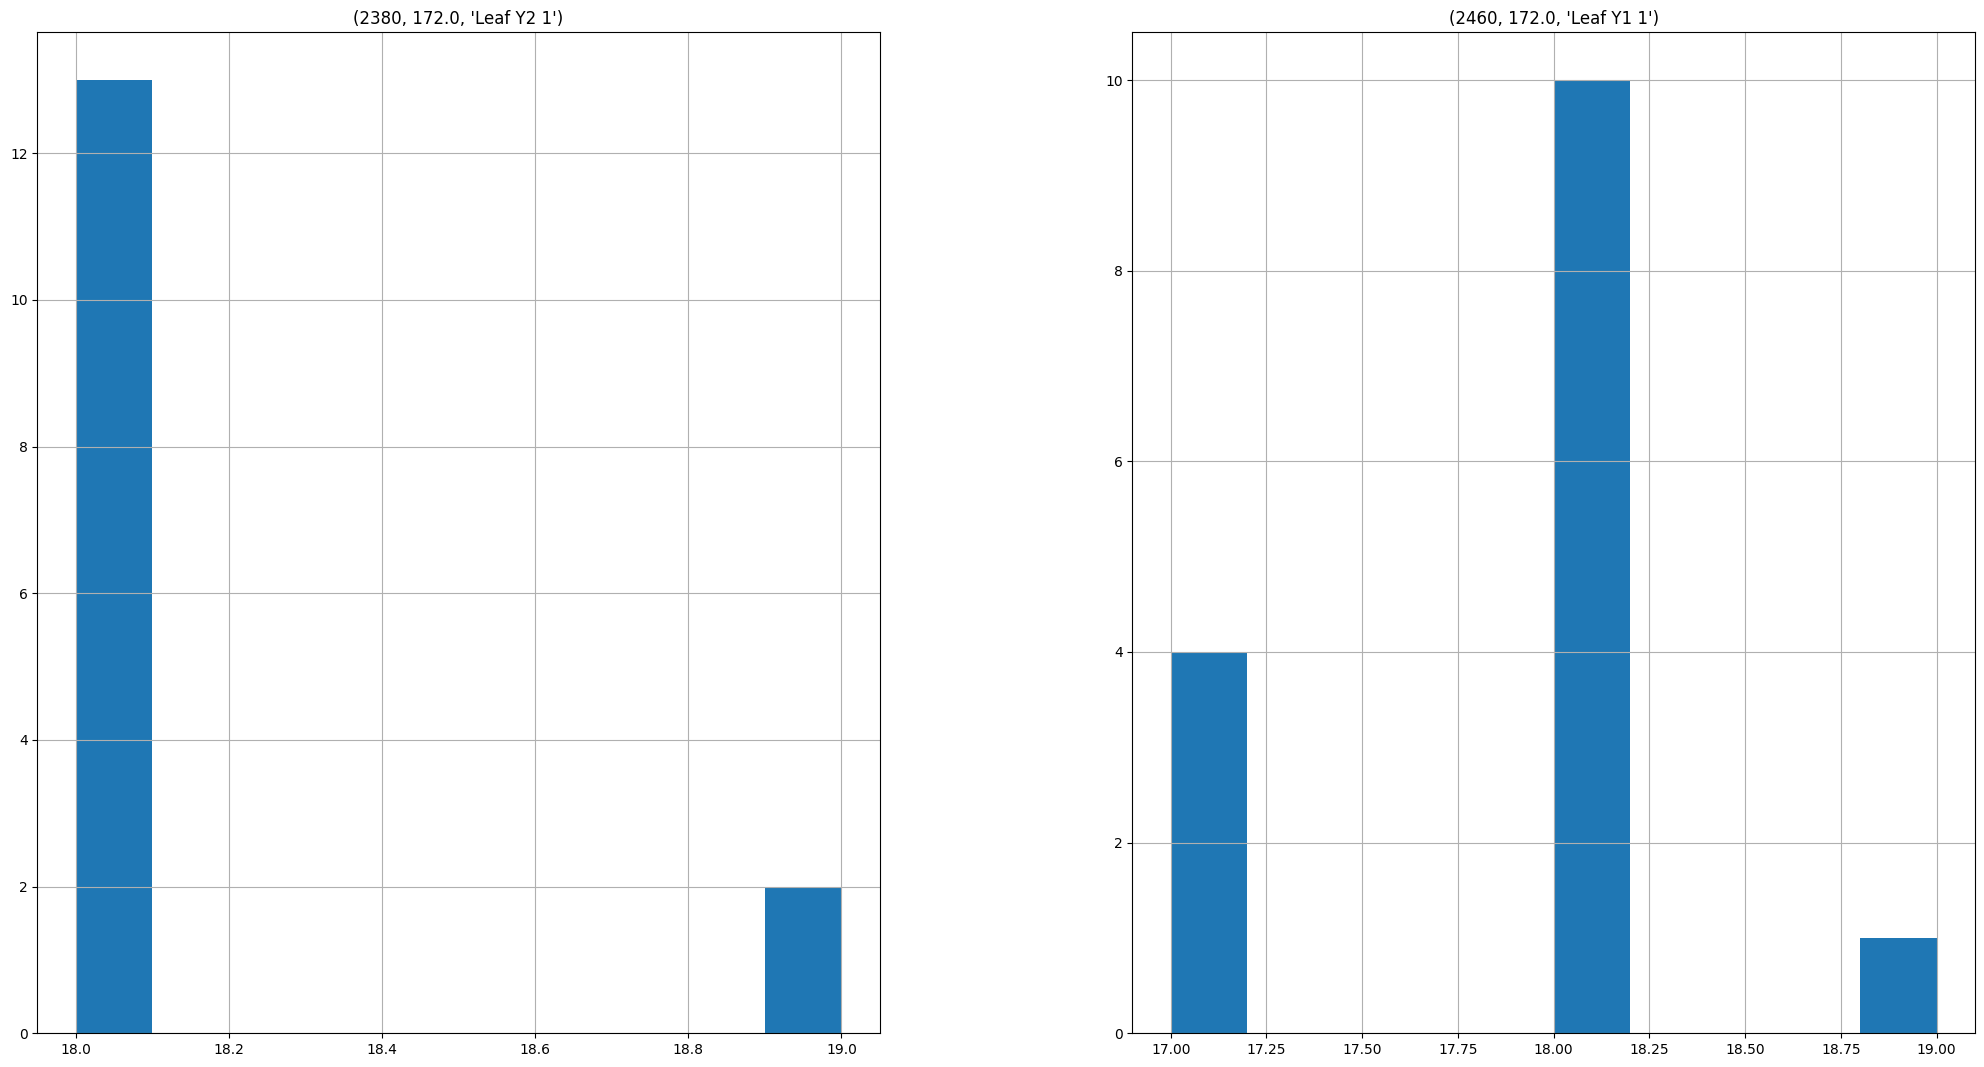

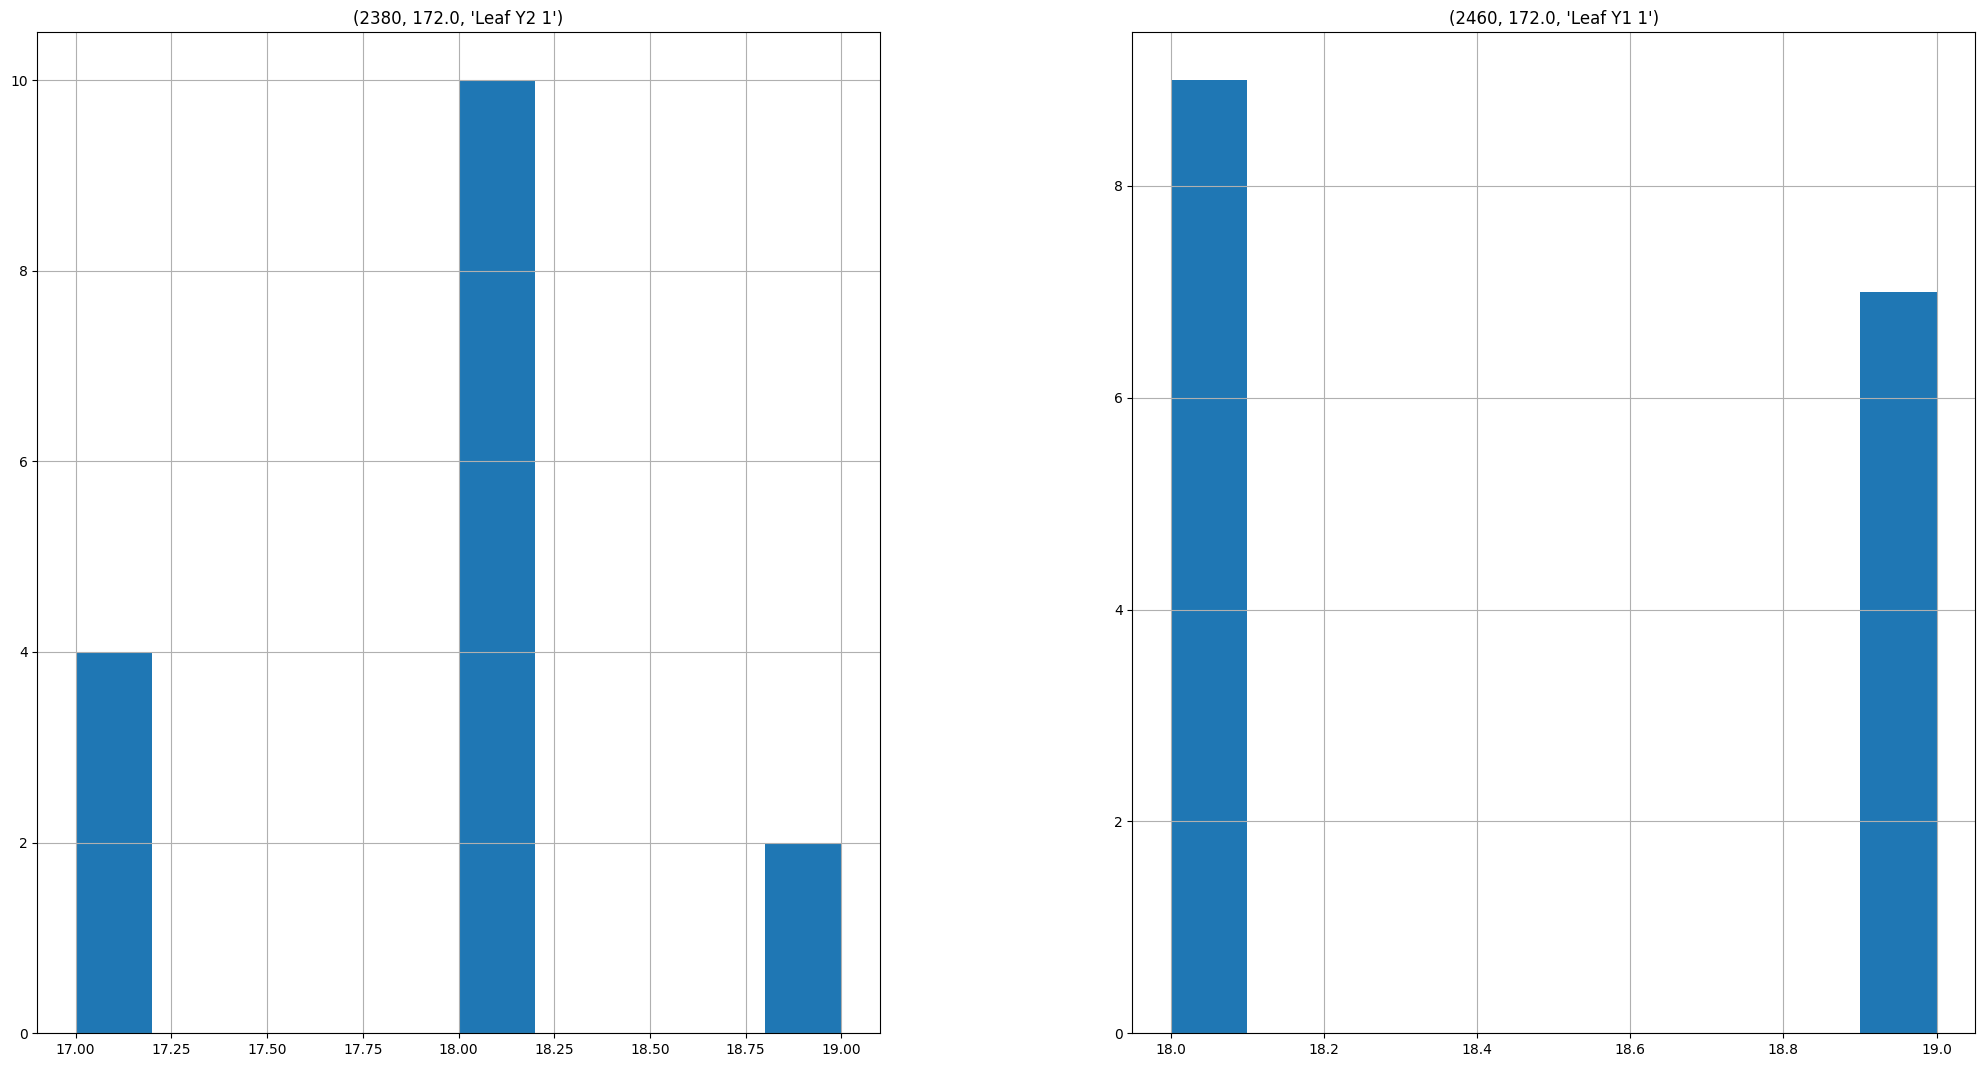

In [47]:
mlc_cal_data = merged_df[merged_df["file_name"] == "Mlc_refl_width"]
mlc_cal_data["Part&item"] = "I:"+ mlc_cal_data["item"].astype(str) + " P:"+ mlc_cal_data["part"].astype(str)

nop45 = mlc_cal_data[mlc_cal_data["part"] != 45]

for linac in list(set(nop45["linac"])):
    result = pd.DataFrame()

    linec_df = nop45[nop45["linac"] == linac]
    dates = list(set(linec_df["date"]))

    for item in range(len(dates)-1):
        old = linec_df[linec_df["date"] == dates[item]]
        new = linec_df[linec_df["date"] == dates[item+1]]

        diff = new["value"].values - old["value"].values
        temp = pd.DataFrame({
            "date": new["date"].tolist(),
            "difference": diff,
            "PI": new["Part&item"],
            "linac": new["linac"]
        })

        result = pd.concat([temp, result])
        

changed = result[result["difference"] != 0]

changes = changed["PI"].unique().tolist()


#only the changed combination of part and item
changes_df_refl = mlc_cal_data[mlc_cal_data["Part&item"].isin(changes)]

show = pd.DataFrame()


# for every linac the describe of the same data
for linac in list(set(changes_df["linac"])):
    print(linac)
    pivoted_cal = changes_df_refl[changes_df_refl["linac"] == linac].pivot(index="date", columns=["item", "part", "category"], values="value")
    describing = pivoted_cal.describe()
    show = pd.concat([show, describing])
    pivoted_cal.hist(figsize=(25,13));

show.round(2)


De reflector width past zich aan

In [48]:
for x in range(len(show.columns)):  
    p_I = show.columns[x][:2]


    fig = px.line(mlc_cal_data[mlc_cal_data["Part&item"] == f"I:{p_I[0]} P:{p_I[1]}"], x="date", y ="value", color="linac", hover_data=["Part&item", "category"],markers=True)
    fig.show()

## Mlc_Sensor_Gains
154: Offset to convert positions from the sensor to the leafbank coordinate system.
156:
157: gain to converts sensor voltage to a position.
366: Mechanical / electronic offset between both potentiometer readings.


C:\Users\Laris\AppData\Local\Temp\ipykernel_9116\201657877.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2983
2325
2638
2191


item,2060,2061,2060,2061,2060,2061,2064,2065,2064,2065,2064,2065
part,366.0,366.0,154.0,154.0,156.0,156.0,157.0,157.0,366.0,366.0,154.0,154.0
category,X1 Diaphragm,X2 Diaphragm,X1 Diaphragm,X2 Diaphragm,X1 Diaphragm,X2 Diaphragm,DLG Y2,DLG Y1,DLG Y2,DLG Y1,DLG Y2,DLG Y1
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,4073.00,4060.38,109513.62,110204.08,970.08,984.00,187612.31,187907.69,4161.15,4184.00,108031.85,108289.77
std,0.58,0.51,22.16,21.89,0.28,0.00,13.01,20.88,0.55,0.58,6.66,64.69
min,4072.00,4060.00,109474.00,110162.00,970.00,984.00,187590.00,187870.00,4160.00,4183.00,108023.00,108225.00
25%,4073.00,4060.00,109505.00,110189.00,970.00,984.00,187610.00,187890.00,4161.00,4184.00,108027.00,108250.00
50%,4073.00,4060.00,109517.00,110199.00,970.00,984.00,187610.00,187910.00,4161.00,4184.00,108030.00,108254.00
75%,4073.00,4061.00,109528.00,110223.00,970.00,984.00,187620.00,187920.00,4161.00,4184.00,108037.00,108377.00
max,4074.00,4061.00,109542.00,110234.00,971.00,984.00,187640.00,187940.00,4162.00,4185.00,108043.00,108388.00


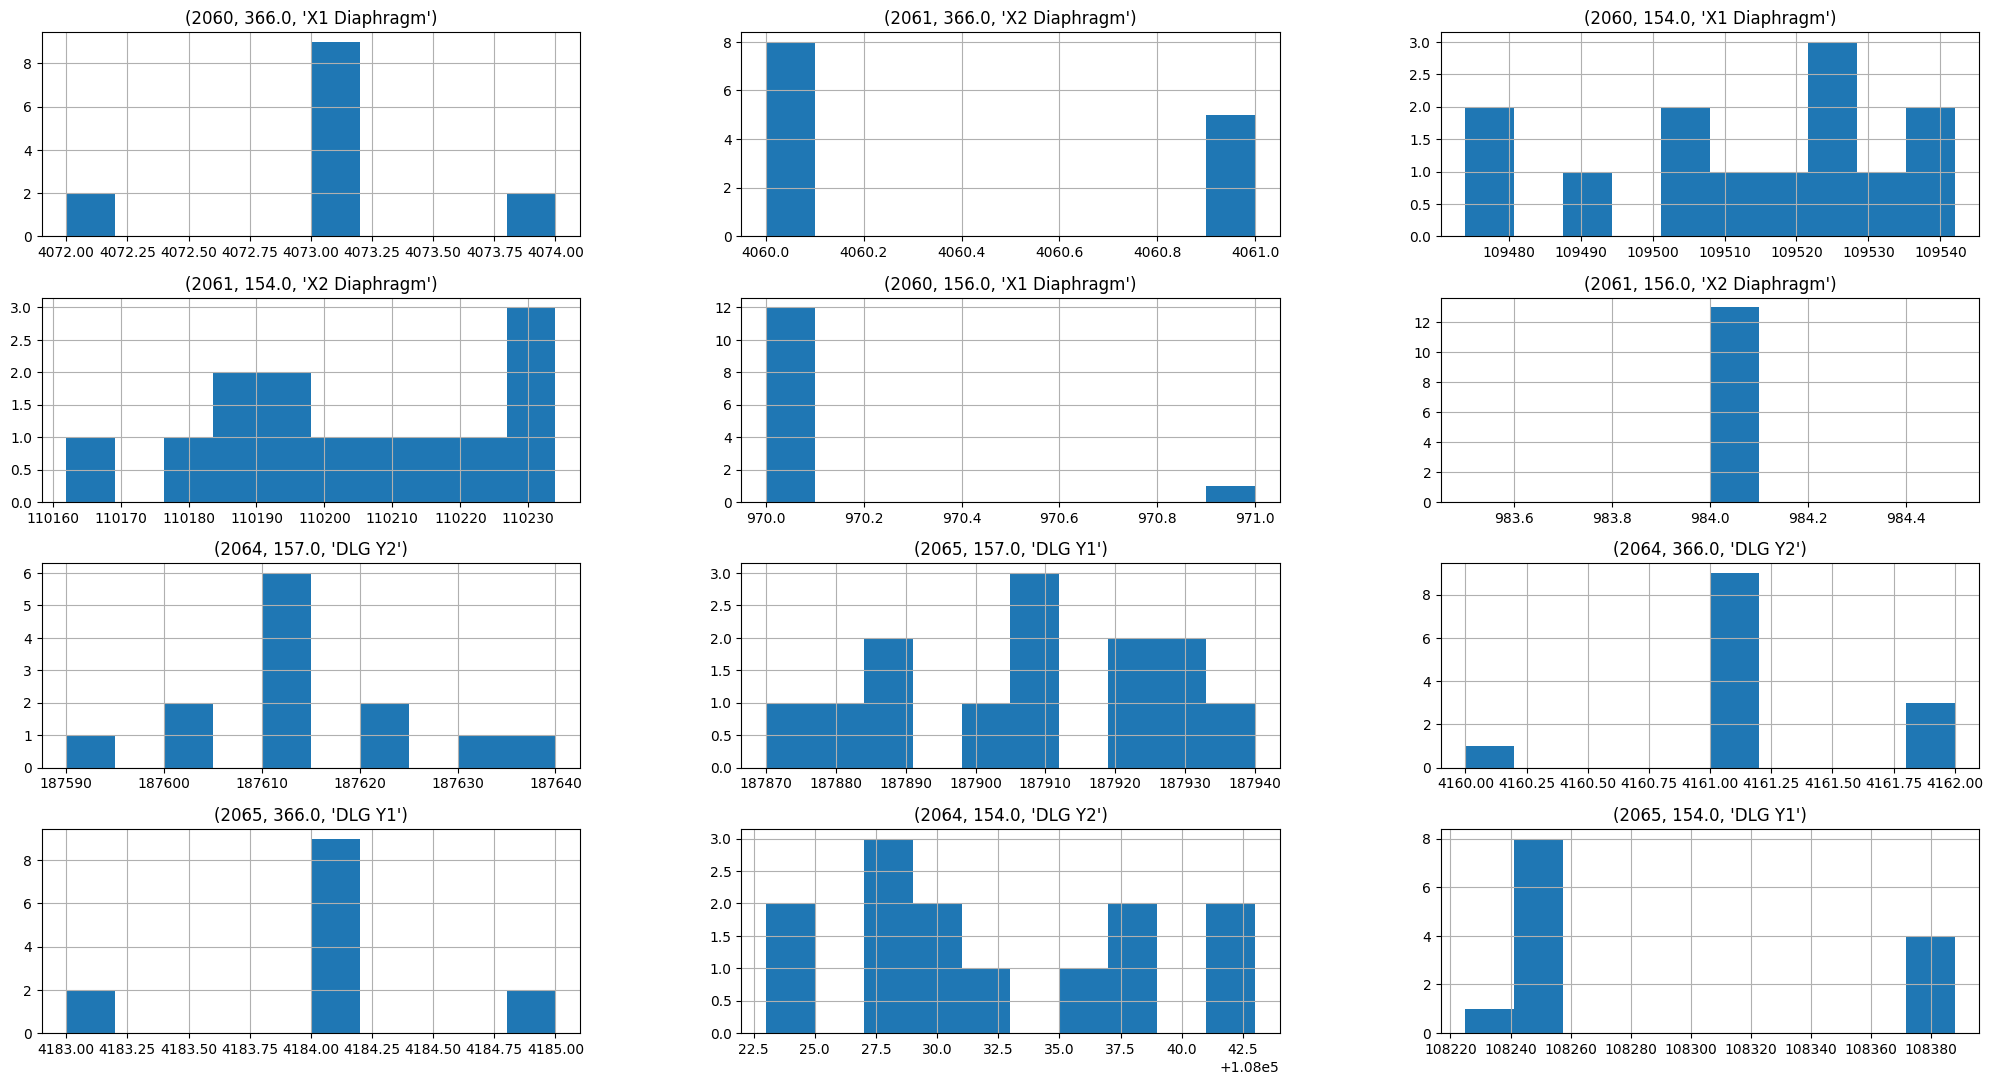

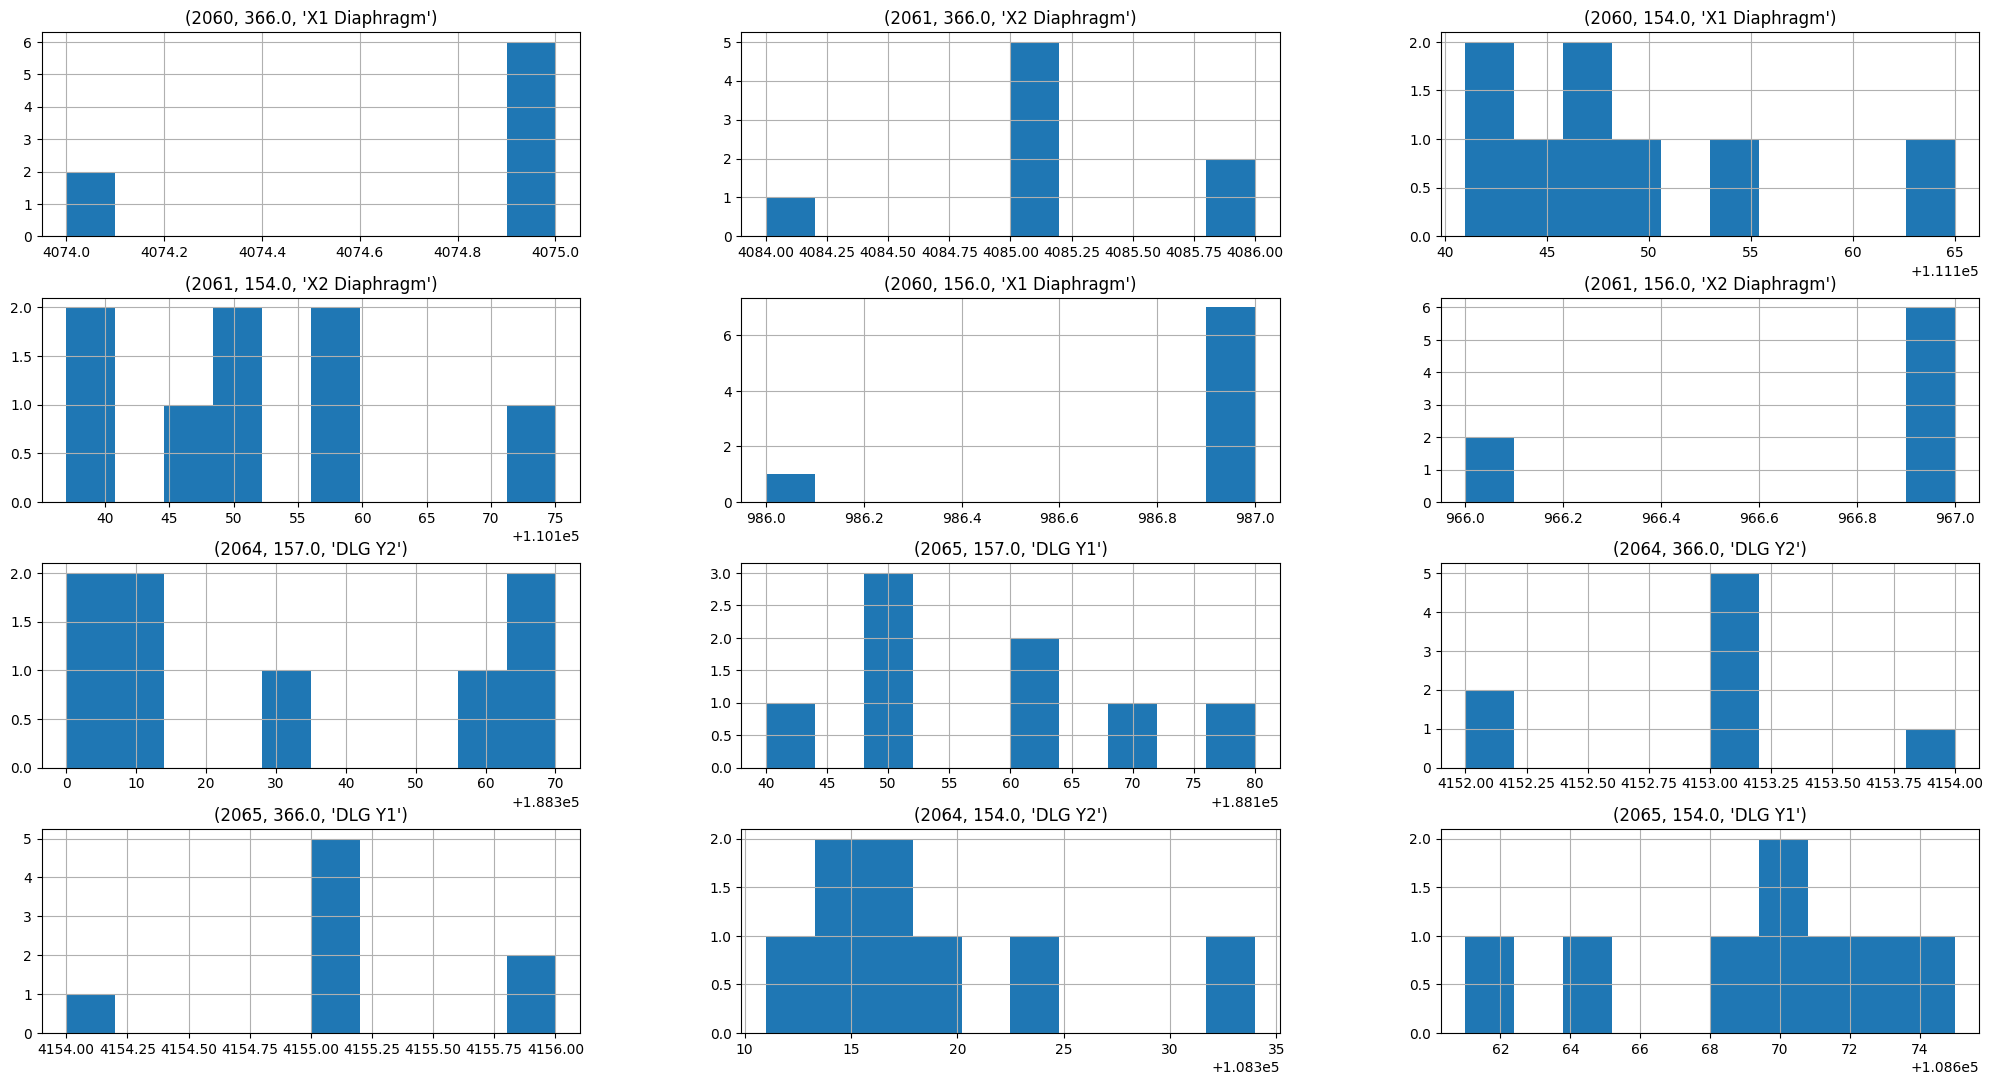

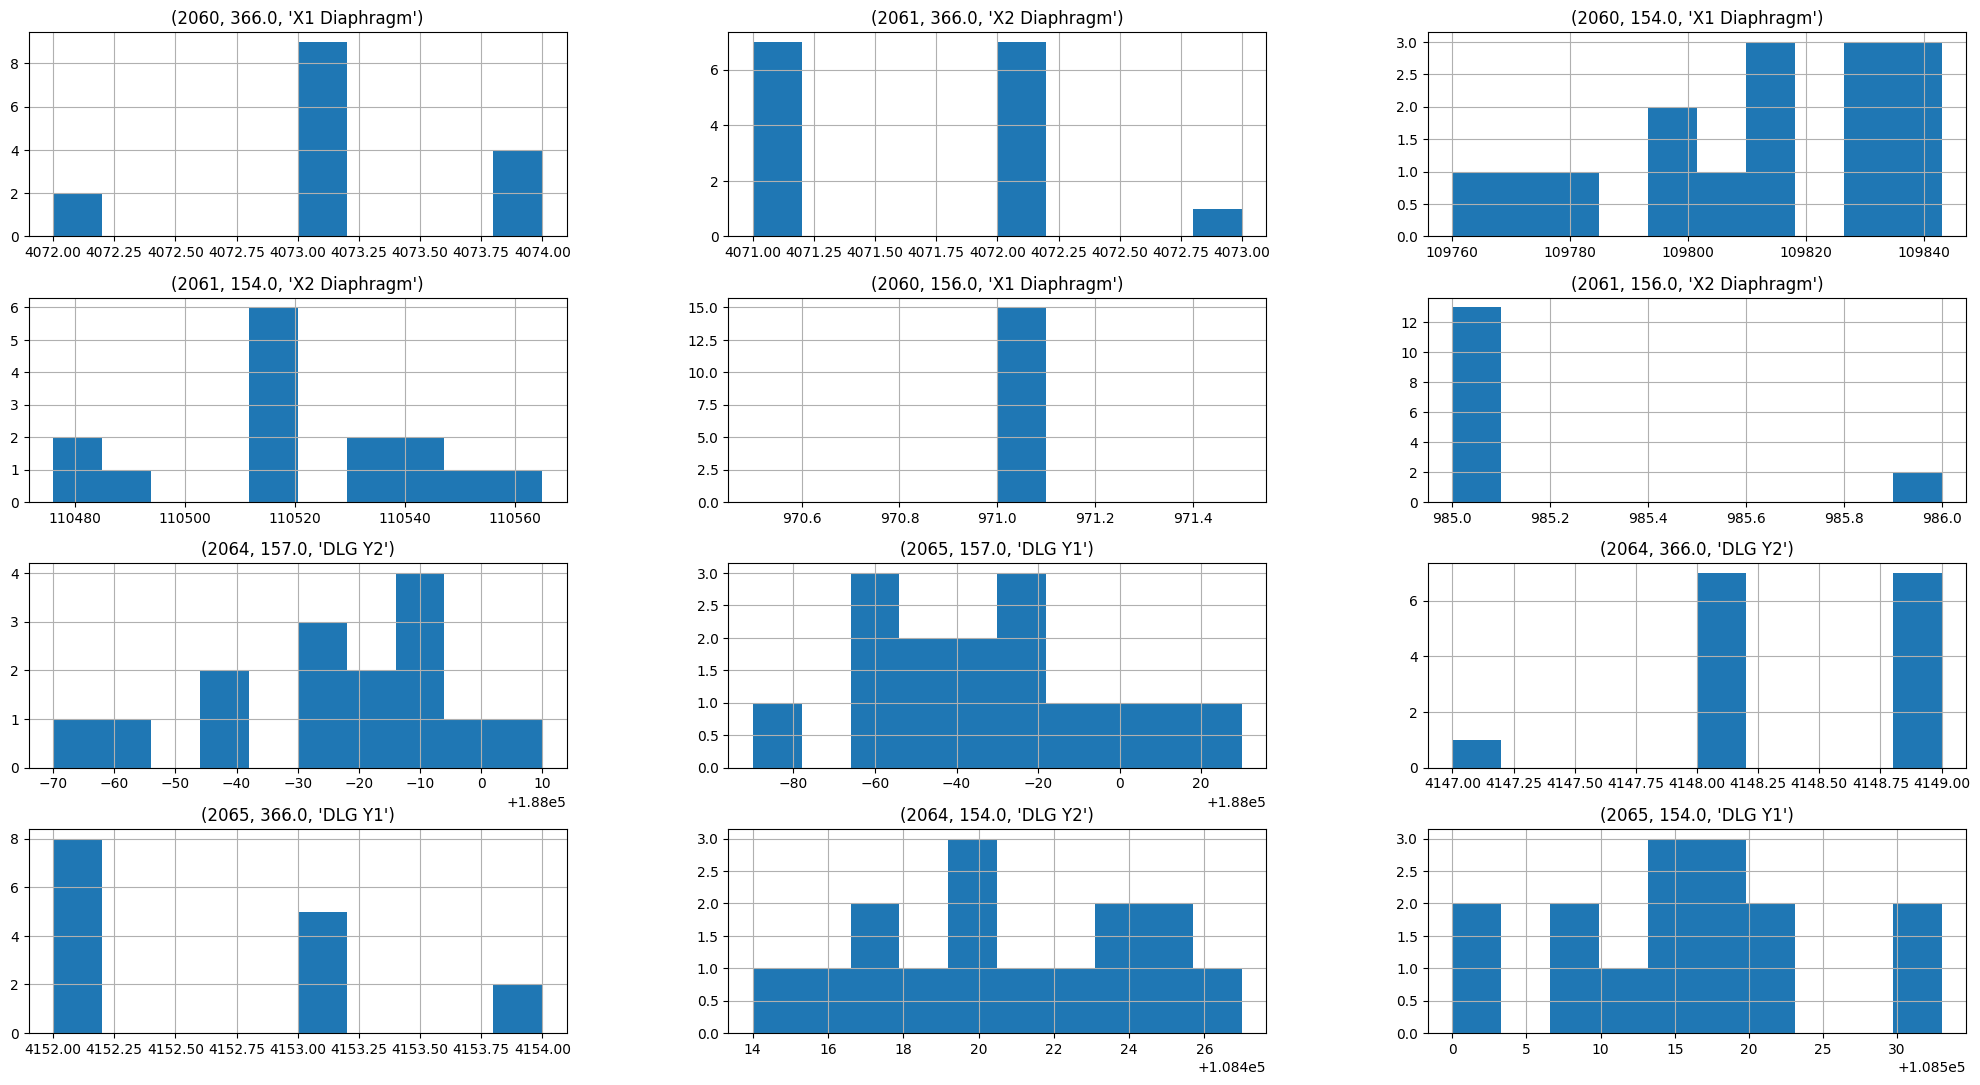

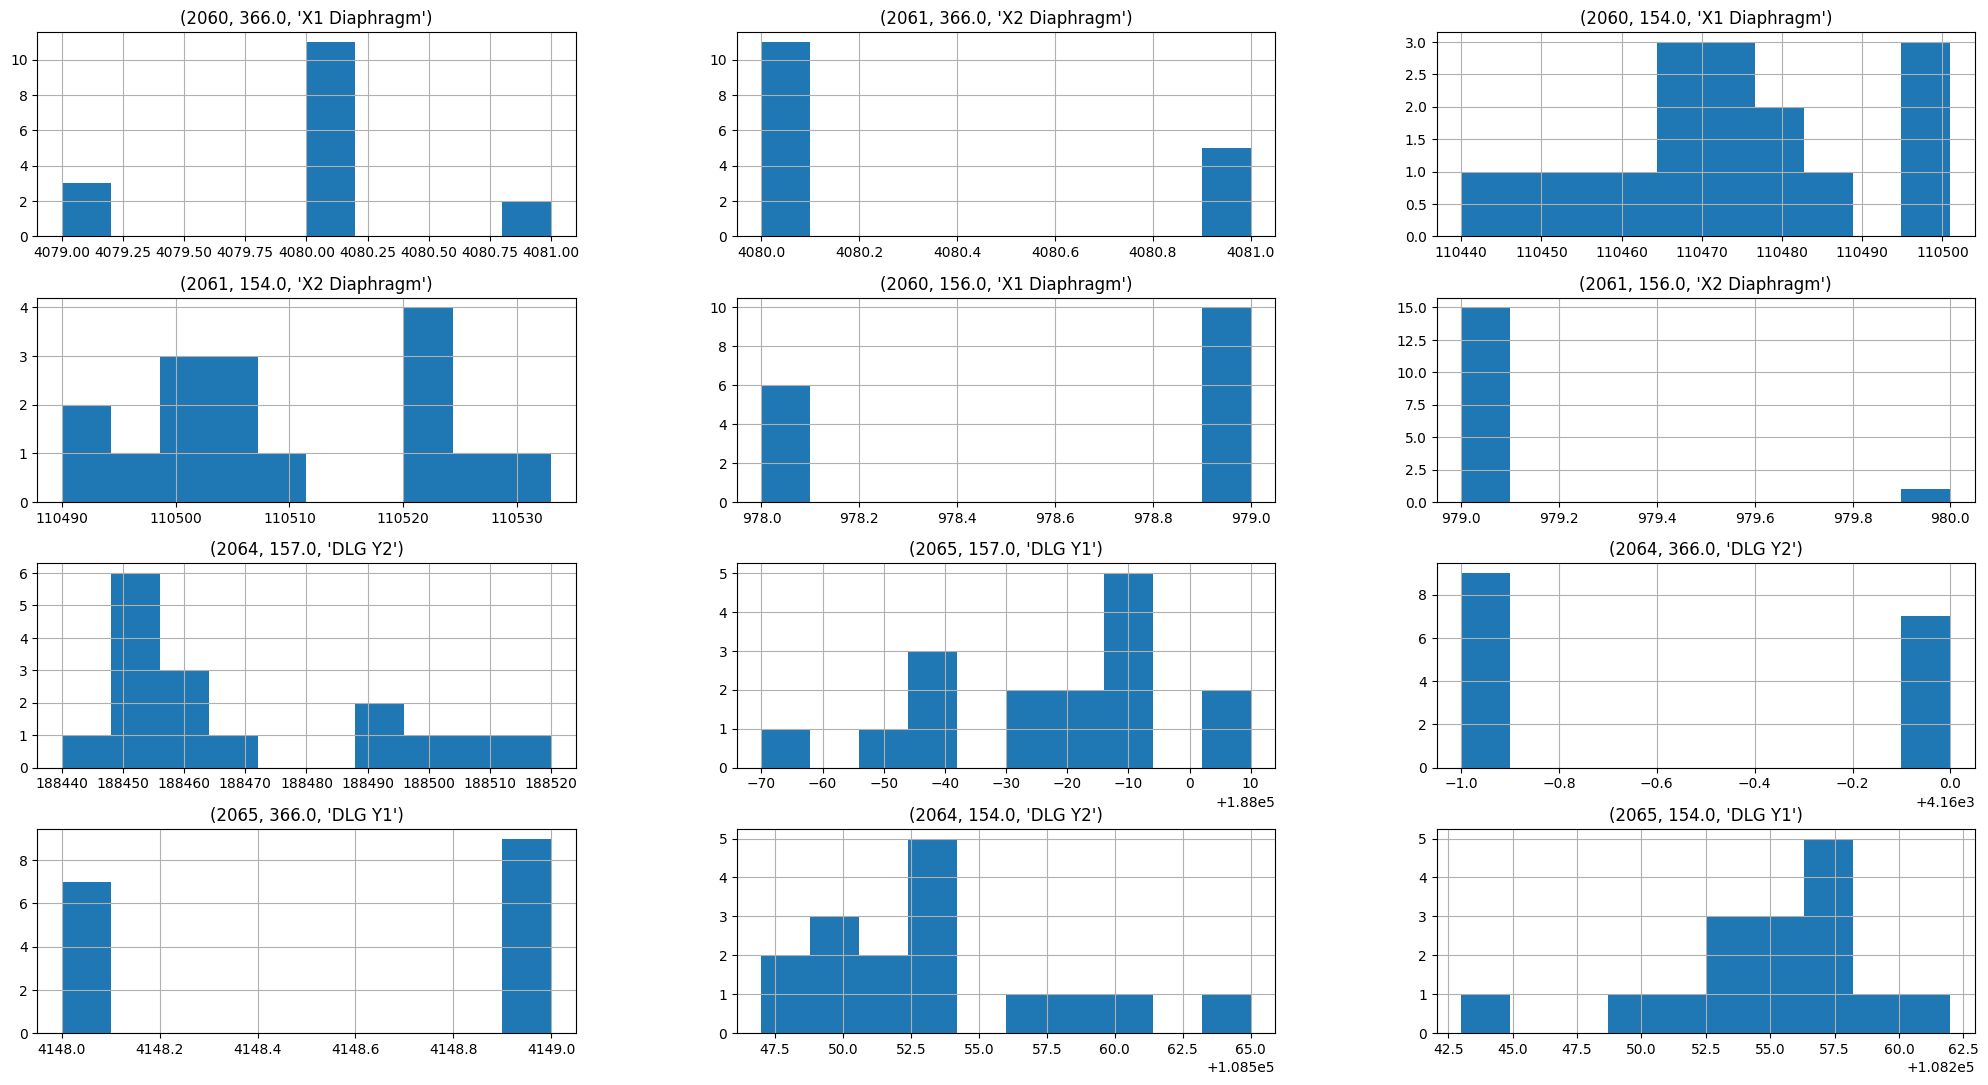

In [49]:
mlc_cal_data = merged_df[merged_df["file_name"] == "Mlc_Sensor_Gains"]
mlc_cal_data["Part&item"] = "I:"+ mlc_cal_data["item"].astype(str) + " P:"+ mlc_cal_data["part"].astype(str)

nop45 = mlc_cal_data[mlc_cal_data["part"] != 45]

for linac in list(set(nop45["linac"])):
    result = pd.DataFrame()

    linec_df = nop45[nop45["linac"] == linac]
    dates = list(set(linec_df["date"]))

    for item in range(len(dates)-1):
        old = linec_df[linec_df["date"] == dates[item]]
        new = linec_df[linec_df["date"] == dates[item+1]]

        diff = new["value"].values - old["value"].values
        temp = pd.DataFrame({
            "date": new["date"].tolist(),
            "difference": diff,
            "PI": new["Part&item"],
            "linac": new["linac"]
        })

        result = pd.concat([temp, result])
        

changed = result[result["difference"] != 0]

changes = changed["PI"].unique().tolist()


#only the changed combination of part and item
changes_df_sensor_gains = mlc_cal_data[mlc_cal_data["Part&item"].isin(changes)]

show = pd.DataFrame()


# for every linac the describe of the same data
for linac in list(set(changes_df_sensor_gains["linac"])):
    print(linac)
    pivoted_cal = changes_df_sensor_gains[changes_df_sensor_gains["linac"] == linac].pivot(index="date", columns=["item", "part", "category"], values="value")
    describing = pivoted_cal.describe()
    show = pd.concat([show, describing])
    pivoted_cal.hist(figsize=(25,13));

show.round(2)


In [50]:
for x in range(len(show.columns)):  
    p_I = show.columns[x][:2]


    fig = px.line(mlc_cal_data[mlc_cal_data["Part&item"] == f"I:{p_I[0]} P:{p_I[1]}"], x="date", y ="value", color="linac", hover_data=["Part&item", "category"],markers=True)
    fig.show()

## onderhouds overzicht
Eerste datum: 2023-09-13

alles er voor en met geen datum wordt verwijderd.


In [51]:

#loading and editingen df
issues = pd.read_csv("data/onderhoud_overzicht.csv")
issues = issues.drop(["Unnamed: 0", "Lev."], axis=1)
issues = issues[issues["Meldtijd"].isna() == False]

issues["Meldtijd"] = pd.to_datetime(issues["Meldtijd"], dayfirst=True, errors="coerce")

# all data from the beginning of the data
drempel_datum = pd.Timestamp("2023-09-13")
issues = issues[issues["Meldtijd"] > drempel_datum]



terms = ["XVI", "gantry", "mlc", "lea", "versneller", "mosaiq", "DLG", "tafel"]
pattern = "|".join([re.escape(term) for term in terms])

# search for terms to determine on what object the issue was
issues["object"] = issues["Storingsinfo"].str.findall(pattern, flags=re.IGNORECASE)
issues["object"] = issues["object"].apply(lambda x: x[0] if x else "")

# filter issues not related to the machine
issues = issues[issues["object"].isin([ "gantry", "mlc", "lea", "versneller", "DLG", "tafel"])]
# linac 5 has to less data
issues = issues[issues["Machine"] != "Linac5"]
issues


,Urgentie,Type,Machine,User,Storingsinfo,Status,Meldtijd,object
20,Acuut,versnellerkop,Linac3,bem,3x leafs vastgelopen do-27 en vr-28 feb,-,2025-02-27,lea
36,Acuut,NaN,Linac2,CLO,"Paar keer lost leafs reflector rate, mogelijk ...",-,2025-01-31,lea
46,NietAcuut,NaN,Linac4,WOD,Linac Automated Asu 1 tijdens draaien conebeam...,-,2024-12-16,gantry
66,Acuut,NaN,Linac1,WOD,(nog steeds) leaves missing. Als aan de stekke...,-,2024-11-22,lea
69,Acuut,NaN,Linac4,WOD,Ineens alle leaves kwijt tijdens klinisch gebr...,-,2024-11-14,lea
73,NietAcuut,NaN,Linac1,WOD,Volgens laboranten geeft de linac vaak leaves ...,-,2024-10-29,lea
84,Acuut,NaN,Linac4,NaN,leaf Y1-8 l kon niet bewegen bij gantry hoek v...,-,2024-10-07,lea
89,Acuut,NaN,Linac2,erik,Kijken of de gantry wat zwaarder loopt dan nor...,-,2024-10-01,gantry
90,Acuut,NaN,Linac3,erik,leaves fan Y1 graag vervangen loopt traag/vast,-,2024-10-01,lea
95,NietAcuut,NaN,Linac1,glv,Melding van Bram: wanneer tafelbediening A kan...,12-09: niet te reproduceren door BEM en WOD. P...,2024-09-11,tafel


## correlatie

In [ ]:
merged_df

,linac,date,file_name,item,part,value,category,Part&item
0,2638,2025-05-21,Be5515,1195,0.0,0,2RI high power look-up table,I:1195 P:0.0
1,2638,2025-05-21,Be5515,1195,1.0,0,2RI high power look-up table,I:1195 P:1.0
2,2638,2025-05-21,Be5515,1195,2.0,0,2RI high power look-up table,I:1195 P:2.0
3,2638,2025-05-21,Be5515,1195,3.0,0,2RI high power look-up table,I:1195 P:3.0
4,2638,2025-05-21,Be5515,1195,4.0,0,2RI high power look-up table,I:1195 P:4.0
...,...,...,...,...,...,...,...,...
364186,2983,2023-08-16,Be5216,161,186.0,0,Magnetron tuner control item,I:161 P:186.0
364187,2983,2023-08-16,Be5216,161,189.0,0,Magnetron tuner control item,I:161 P:189.0
364188,2983,2023-08-16,Be5216,161,190.0,0,Magnetron tuner control item,I:161 P:190.0
364189,2983,2023-08-16,Be5216,161,193.0,0,Magnetron tuner control item,I:161 P:193.0


In [ ]:
merged_df["Part&item"] = "I:"+ merged_df["item"].astype(str) + " P:"+ merged_df["part"].astype(str)

nop45 = merged_df[merged_df["part"] != 45]
result = pd.DataFrame()

for linac in list(set(nop45["linac"])):
    for filename in list(set(nop45["file_name"])):
        linec_df = nop45[nop45["linac"] == linac]
        linec_df = linec_df[linec_df["file_name"] == filename]
        dates = list(set(linec_df["date"]))

        for item in range(len(dates)-1):
            old = linec_df[linec_df["date"] == dates[item]]
            new = linec_df[linec_df["date"] == dates[item+1]]

            diff = new["value"].values - old["value"].values
            temp = pd.DataFrame({
                "date": new["date"].tolist(),
                "difference": diff,
                "PI": new["Part&item"],
                "linac": new["linac"]
            })

            result = pd.concat([temp, result])
        

changed = result[result["difference"] != 0]

changes = changed["PI"].unique().tolist()


#only the changed combination of part and item
changes_df_total = merged_df[merged_df["Part&item"].isin(changes)]

changes_df_total

Empty DataFrame
Columns: []
Index: []


KeyError: 'difference'

In [ ]:


pivoted = []
for linac in list(changes_df["linac"].unique()):
    pivoted.append(changes_df[changes_df["linac"] == linac].pivot(index=["date", "linac"], columns=["item", "part", "category"], values="value").reset_index())

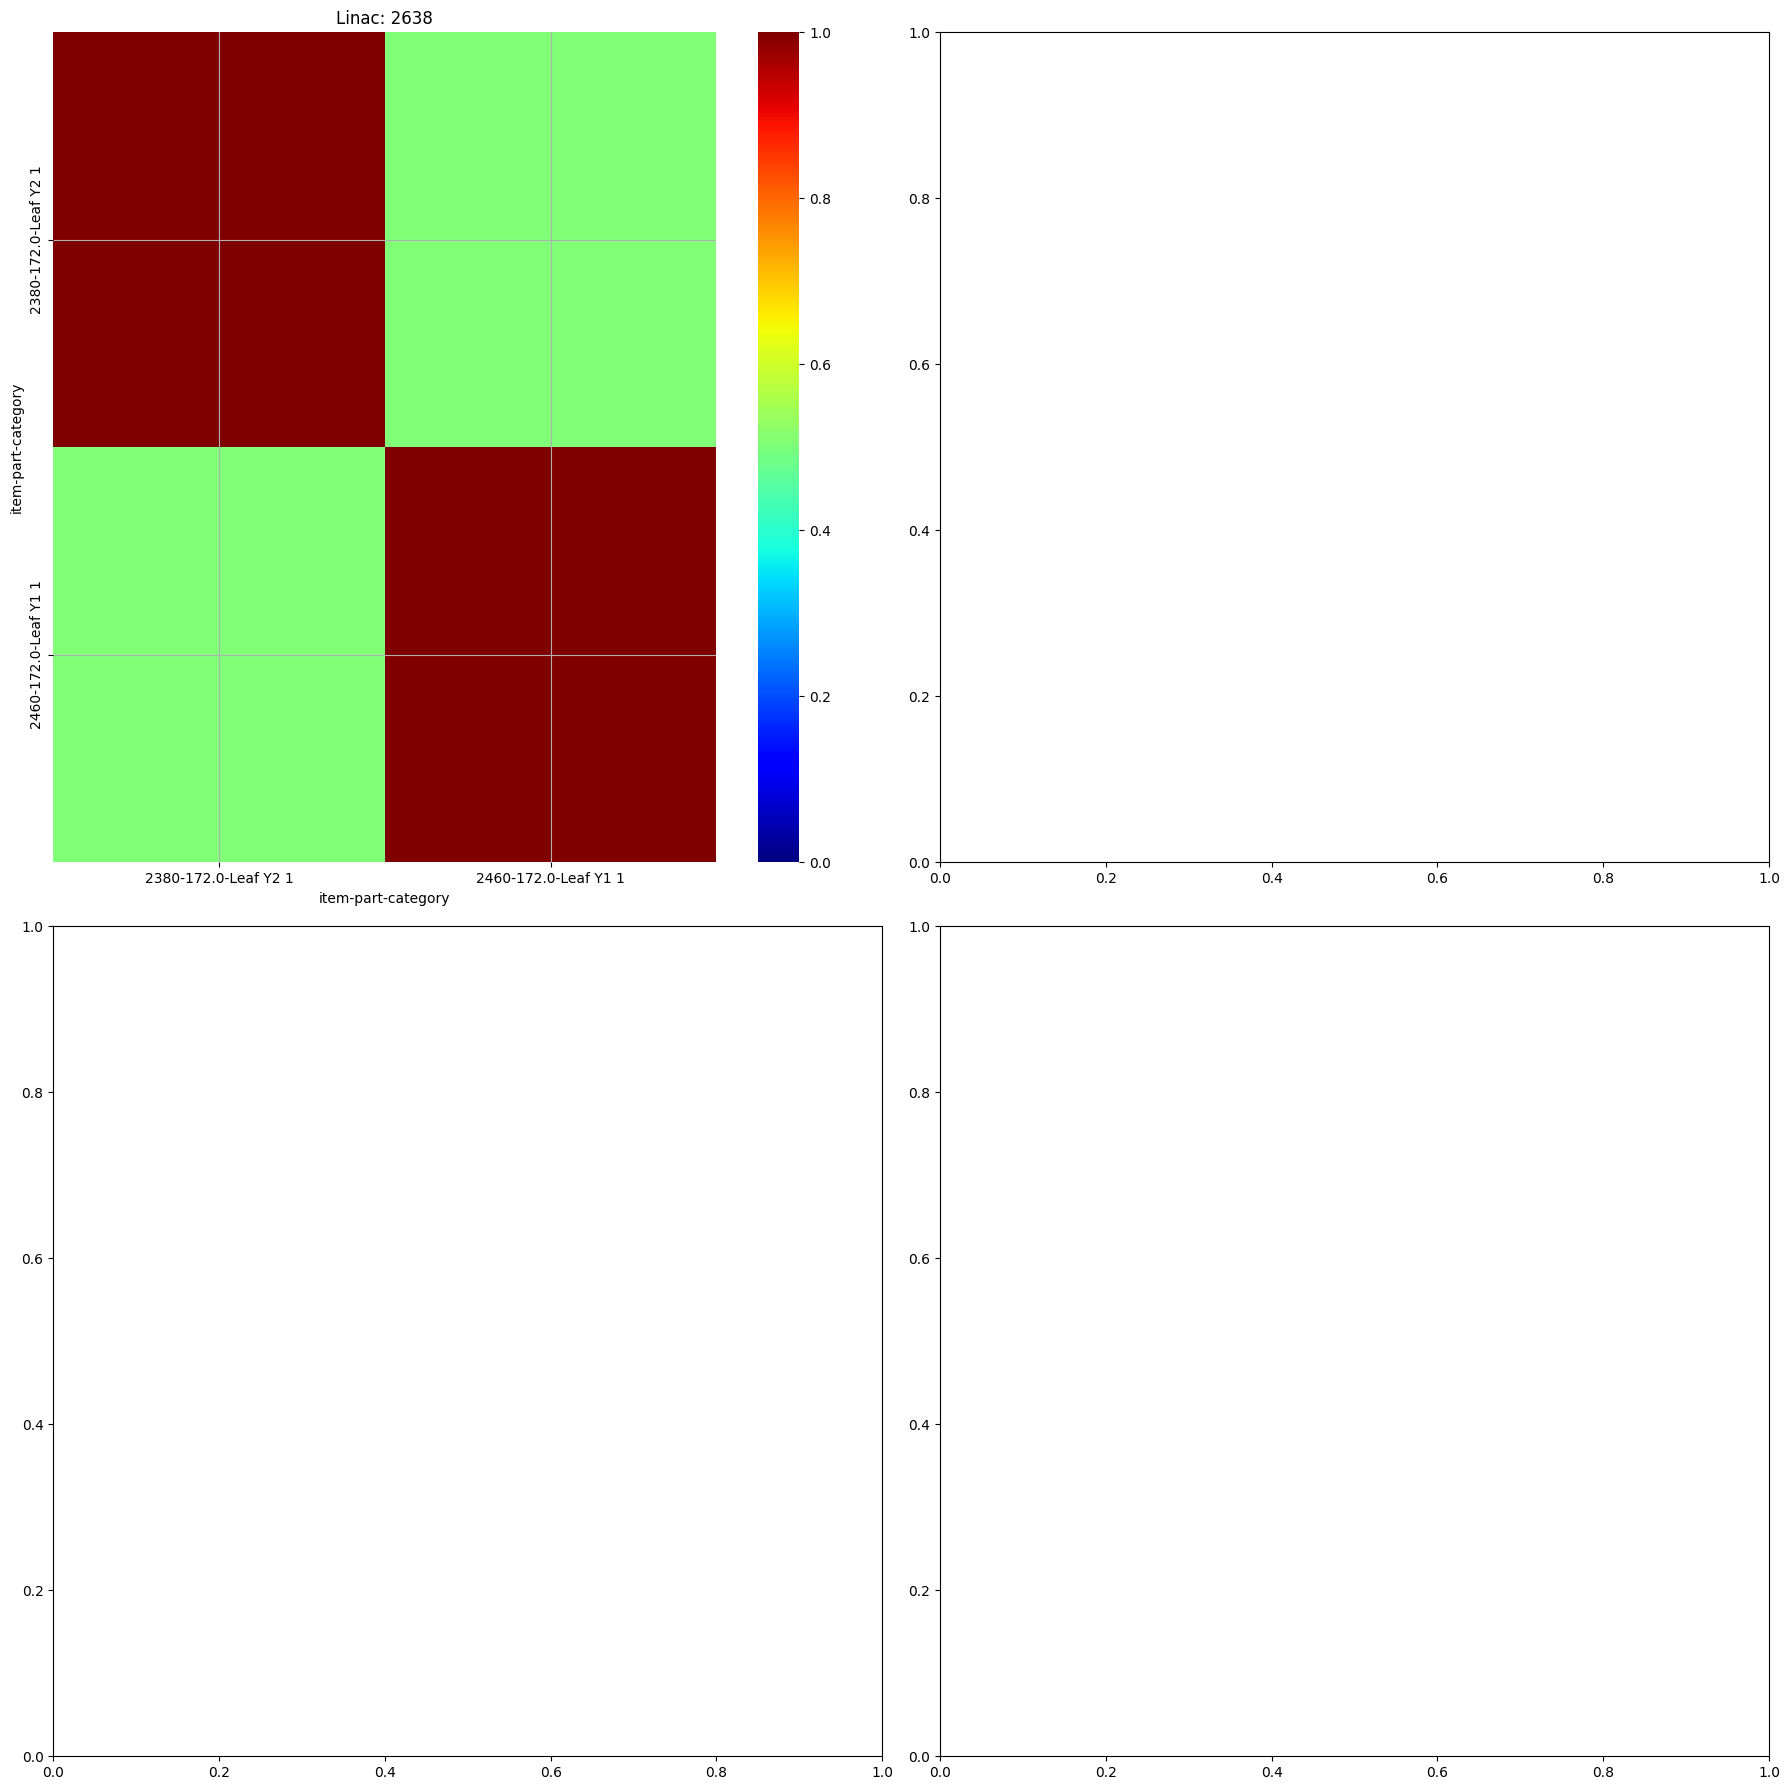

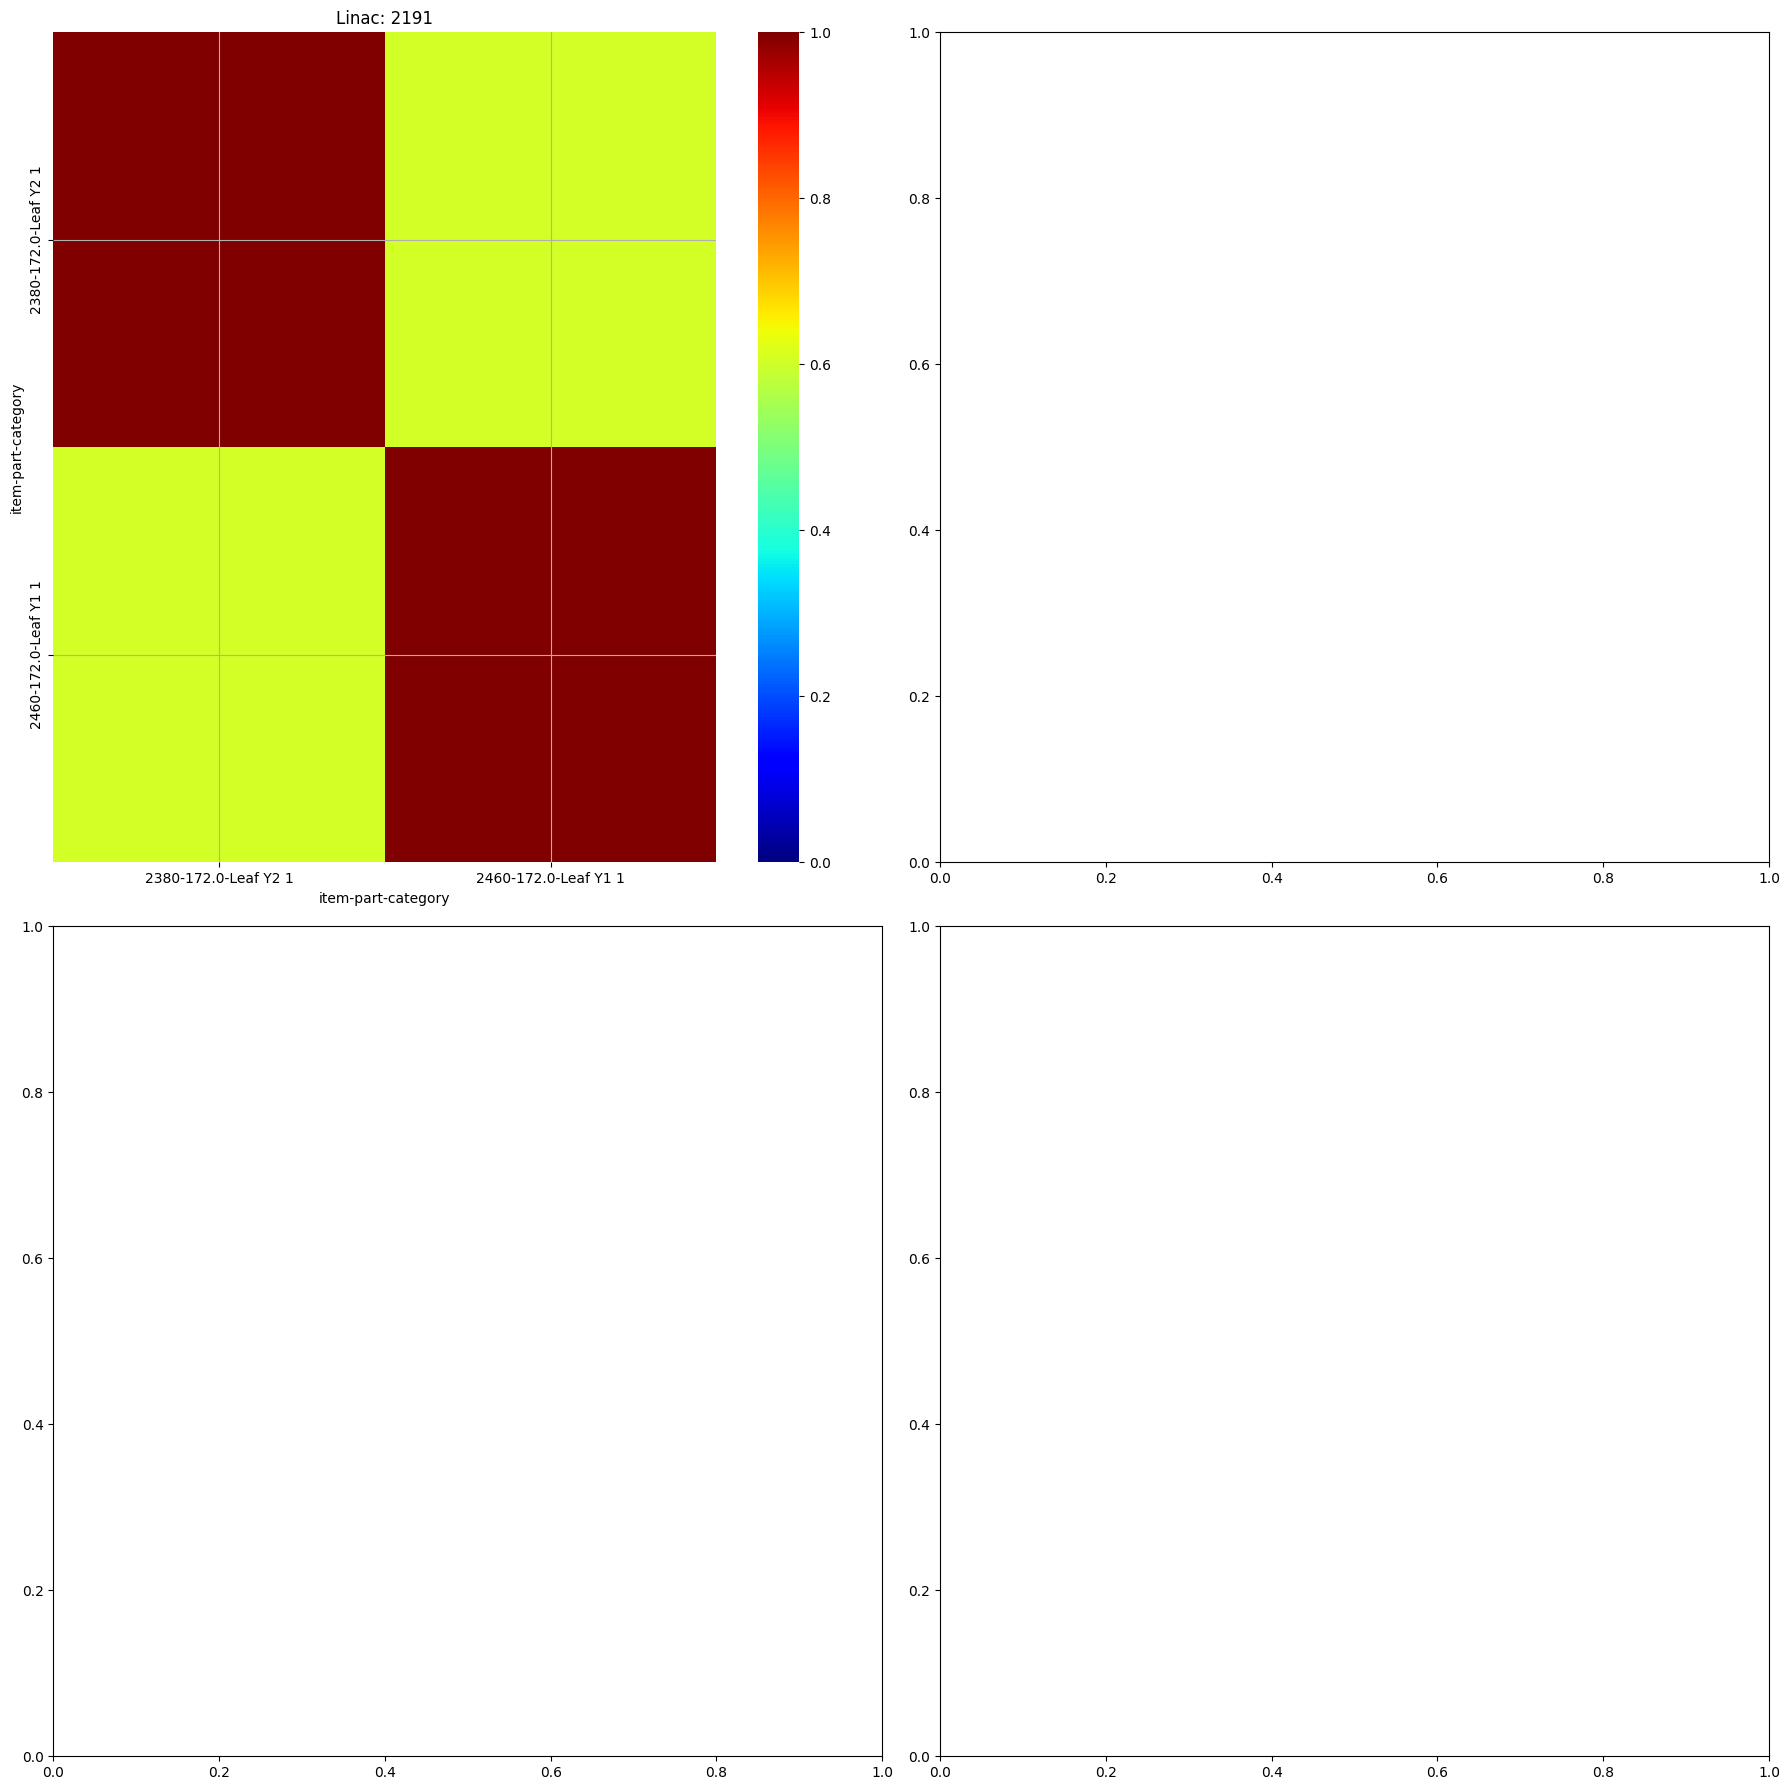

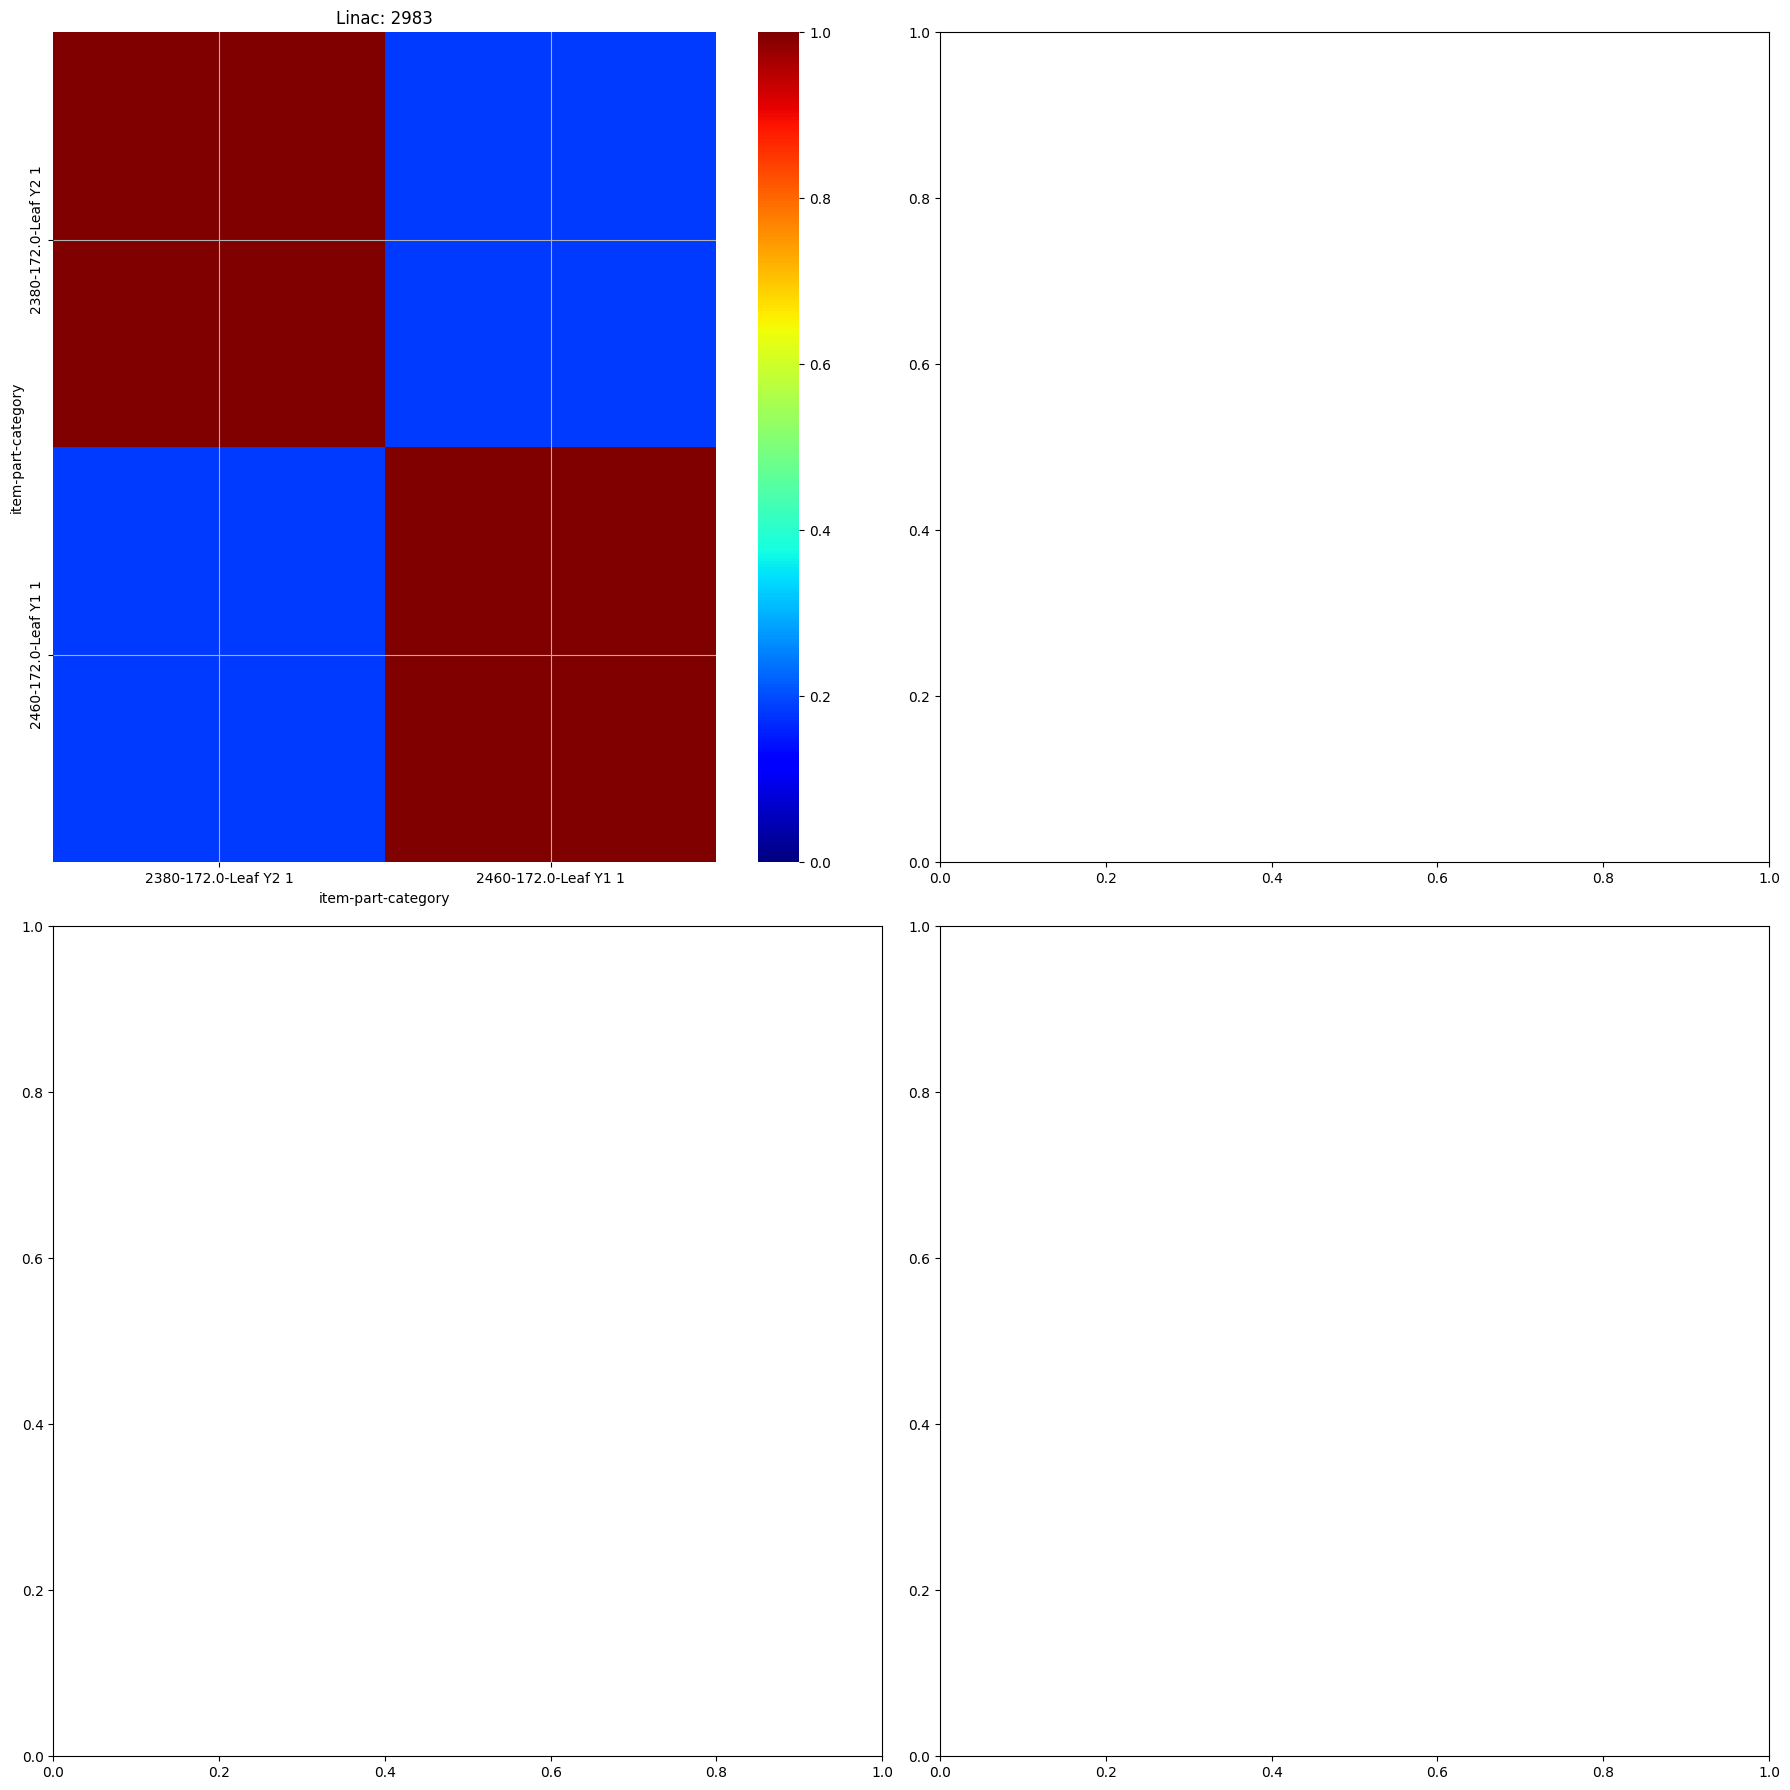

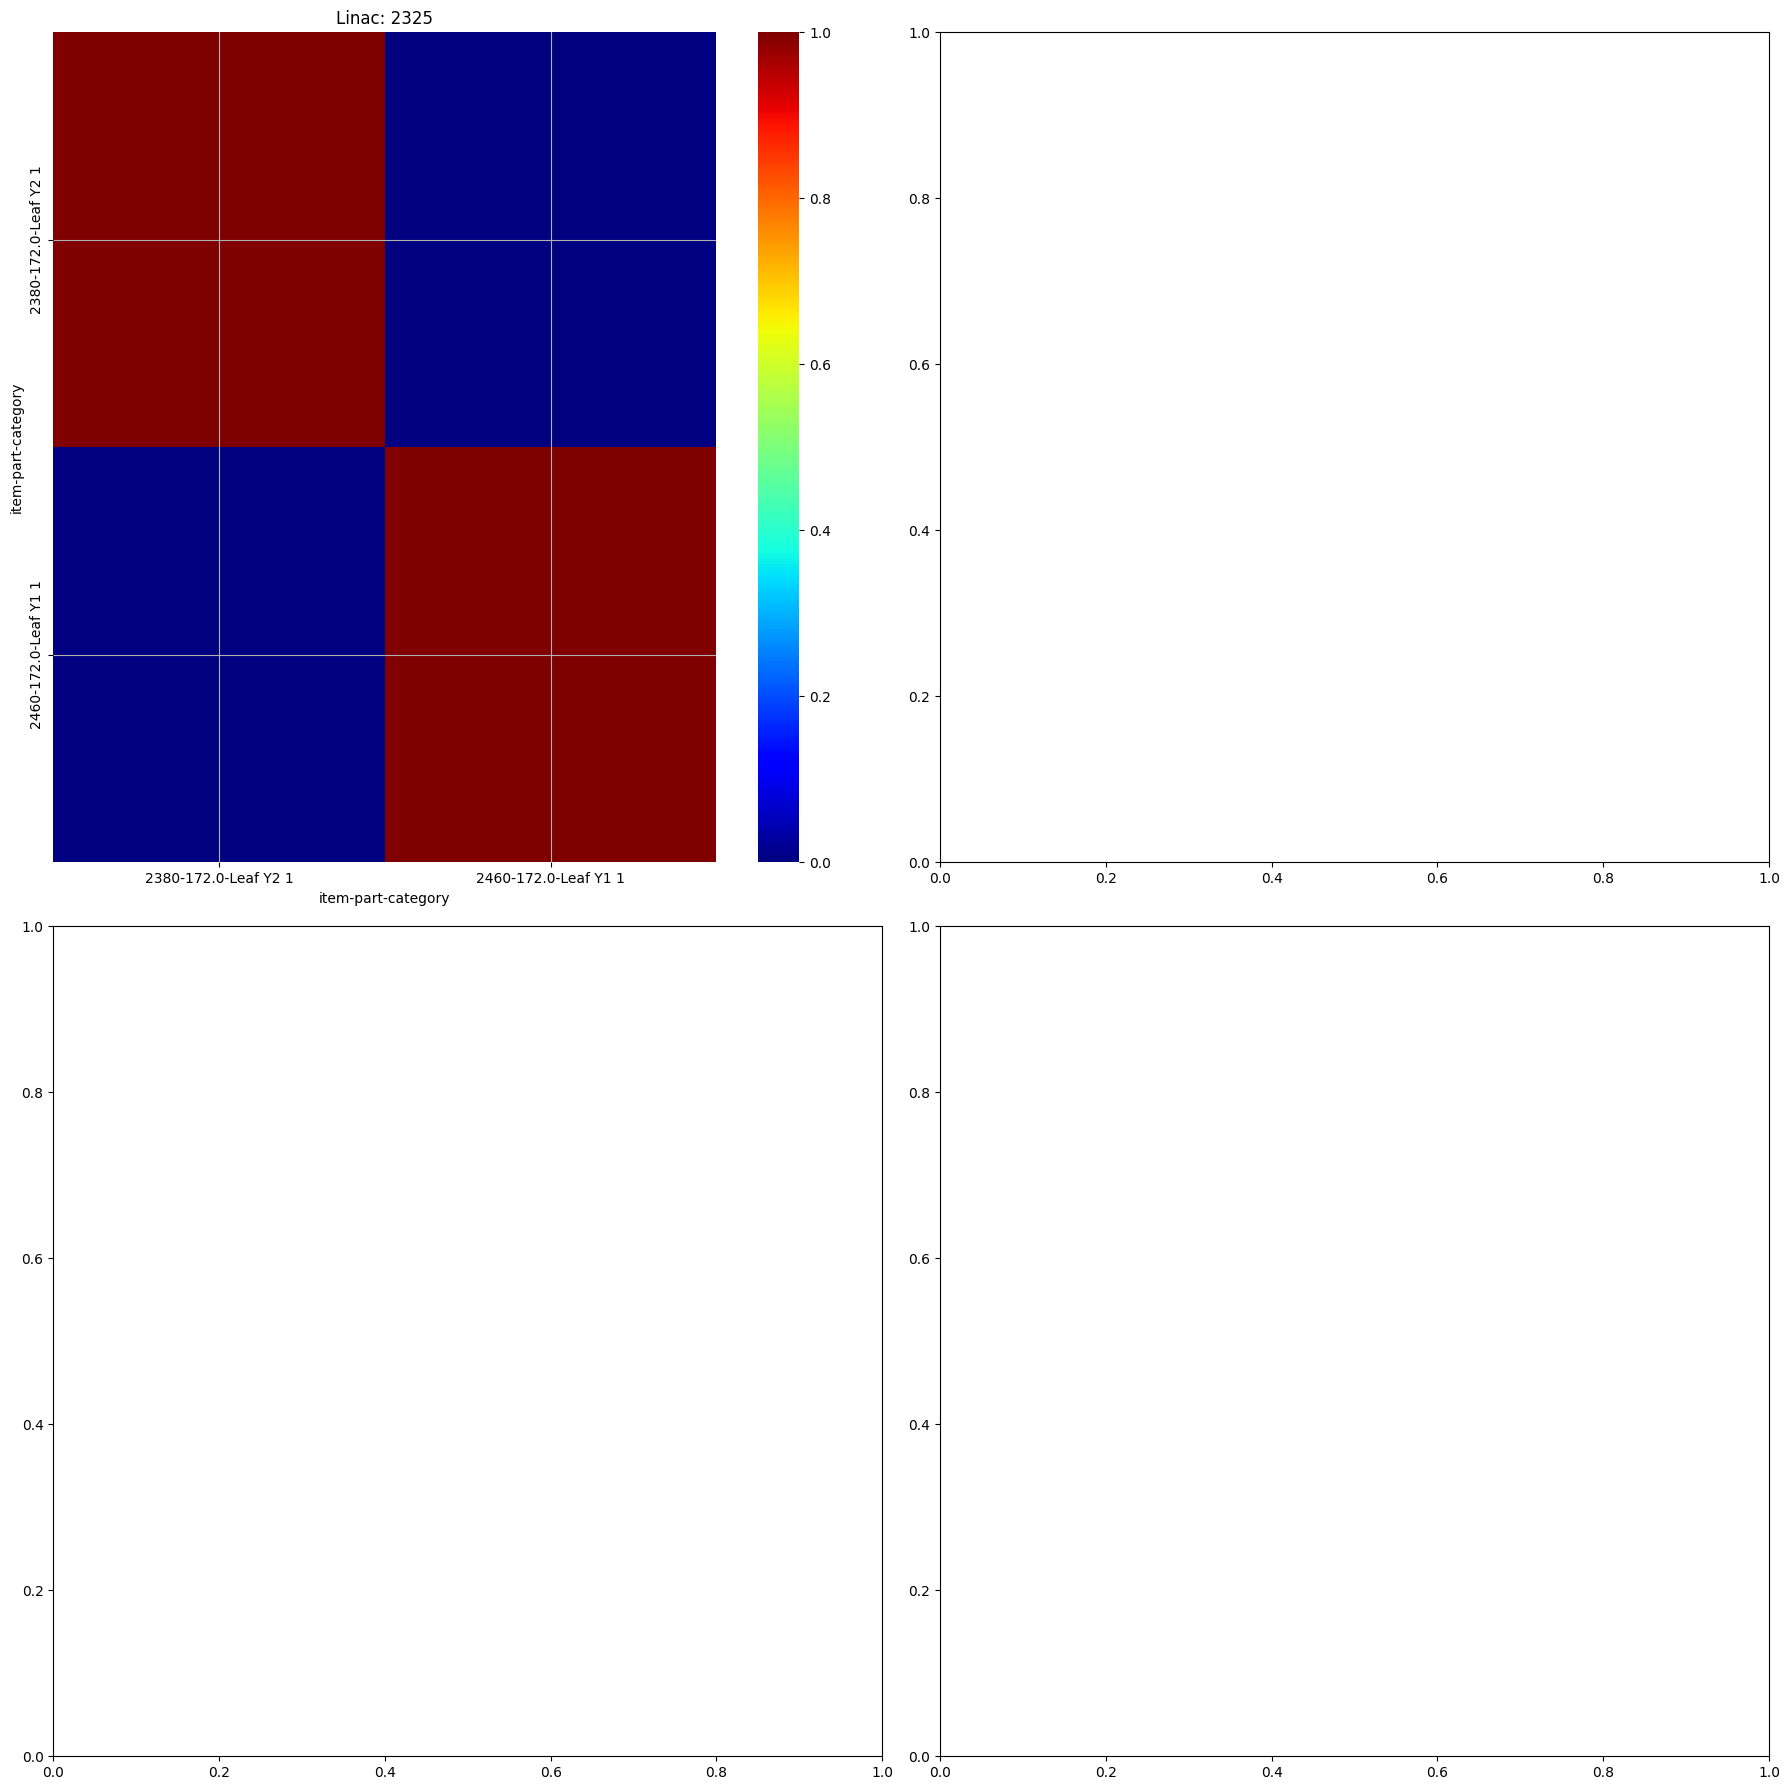

In [ ]:
for pivoted_df in pivoted:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 18))
    linacs = list(set(pivoted_df["linac"]))

    for num in range(len(linacs)):
        row, col = divmod(num, 2)
        corr = pivoted_df[pivoted_df["linac"] == linacs[num]].set_index(["date", "linac"]).corr()
        sns.heatmap(corr, cmap="jet", vmin=0.0, vmax=1.0, ax=axes[row, col], )
        axes[row, col].set_title(f"Linac: {linacs[num]}")
        axes[row, col].grid(True)

    plt.tight_layout()
    plt.show()

